In [1]:
# ---------------------------------------------------------------------------------------------
# MODULES
# ---------------------------------------------------------------------------------------------
import os
import seaborn as sns
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dcopy
from pandas.api.types import CategoricalDtype
from matplotlib.lines import Line2D
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [2]:
# ---------------------------------------------------------------------------------------------
# SPECIFY TIER AND CORRESPONDING PATHS
# ---------------------------------------------------------------------------------------------
Tier = 'Hortense'

if Tier == 'Hortense':
    path_ref = '/dodrio/scratch/projects/2022_200/project_output/rsda/vsc33651/PEATBURN/Tropical/Reference'
    path_out = '/dodrio/scratch/projects/2022_200/project_output/rsda/vsc33651/PEATBURN/Tropical/output/CDF_matched'
    path_fires = '/dodrio/scratch/projects/2022_200/project_output/rsda/vsc33651/PEATBURN/Tropical/Fire_data'
    path_figs = '/dodrio/scratch/projects/2022_200/project_output/rsda/vsc33651/PEATBURN/Tropical/output/Figures'
    path_peatlands = '/dodrio/scratch/projects/2022_200/project_output/rsda/vsc33651/PEATBURN/Tropical/PEATCLSM'
    path_PEATMAP = '/dodrio/scratch/projects/2022_200/project_output/rsda/vsc33651/PEATBURN/Tropical/PEATMAP' \
                   '/Miettinen2016-PeatLCC900715'

elif Tier == 'Genius':
    path_ref = '/staging/leuven/stg_00024/OUTPUT/jonasm/PEATBURN/Tropical/Reference'
    path_out = '/staging/leuven/stg_00024/OUTPUT/jonasm/PEATBURN/Tropical/output/CDF_matched'
    path_fires = '/staging/leuven/stg_00024/OUTPUT/jonasm/PEATBURN/Tropical/Fire_data'
    path_figs = '/staging/leuven/stg_00024/OUTPUT/jonasm/PEATBURN/Tropical/output/Figures'
    path_peatlands = '/staging/leuven/stg_00024/OUTPUT/jonasm/PEATBURN/Tropical/PEATCLSM'
    path_PEATMAP = '/staging/leuven/stg_00024/OUTPUT/jonasm/PEATBURN/Tropical/PEATMAP' \
                   '/Miettinen2016-PeatLCC900715'

else:
    print('Error: Tier can only be Hortense or Genius.')

peatland_types = ['TN', 'TD']
CDF_types = ['pixel']

In [3]:
# ---------------------------------------------------------------------------------------------
# LOAD FWI DATASETS
# ---------------------------------------------------------------------------------------------
## Natural
# Reference:
ds_ref_nat = Dataset(os.path.join(path_ref, 'FWI_masked_Nat.nc'), 'r')
FWI_M2_nat = ds_ref_nat['MERRA2_FWI'][0:6209, :, :].data
DC_M2_nat = ds_ref_nat['MERRA2_DC'][0:6209, :, :].data
DMC_M2_nat = ds_ref_nat['MERRA2_DMC'][0:6209, :, :].data
FFMC_M2_nat = ds_ref_nat['MERRA2_FFMC'][0:6209, :, :].data

# EXP3b:
ds_EXP3b_nat = Dataset(os.path.join(path_out, 'FWI_zbar_FFMC_TN_pixel.nc'), 'r')
FWI_EXP3b_nat = ds_EXP3b_nat['MERRA2_FWI'][0:6209, :, :].data

ds_zbar_nat = Dataset(os.path.join(path_peatlands, 'PEATCLSM_TN_masked_Nat_20022018.nc'), 'r')
zbar_nat = ds_zbar_nat['zbar'][0:6209, :, :].data

ds_EXP4_nat = Dataset(os.path.join(path_out, 'FWI_zbar_FWI_TN_pixel.nc'), 'r')
FWI_EXP4_nat = ds_EXP4_nat['zbar'][0:6209, :, :].data

## Drained
# Reference:
ds_ref_dra = Dataset(os.path.join(path_ref, 'FWI_masked_Dra.nc'), 'r')
FWI_M2_dra = ds_ref_dra['MERRA2_FWI'][0:6209, :, :].data
DC_M2_dra = ds_ref_dra['MERRA2_DC'][0:6209, :, :].data
DMC_M2_dra = ds_ref_dra['MERRA2_DMC'][0:6209, :, :].data
FFMC_M2_dra = ds_ref_dra['MERRA2_FFMC'][0:6209, :, :].data

# EXP3b:
ds_EXP3b_dra = Dataset(os.path.join(path_out, 'FWI_zbar_FFMC_TD_pixel.nc'), 'r')
FWI_EXP3b_dra = ds_EXP3b_dra['MERRA2_FWI'][0:6209, :, :].data

ds_zbar_dra = Dataset(os.path.join(path_peatlands, 'PEATCLSM_TD_masked_Dra_20022018.nc'), 'r')
zbar_dra = ds_zbar_dra['zbar'][0:6209, :, :].data

ds_EXP4_dra = Dataset(os.path.join(path_out, 'FWI_zbar_FWI_TD_pixel.nc'), 'r')
FWI_EXP4_dra = ds_EXP4_nat['zbar'][0:6209, :, :].data


In [4]:
times = pd.date_range('2002-01-01', '2018-12-31', freq='D')

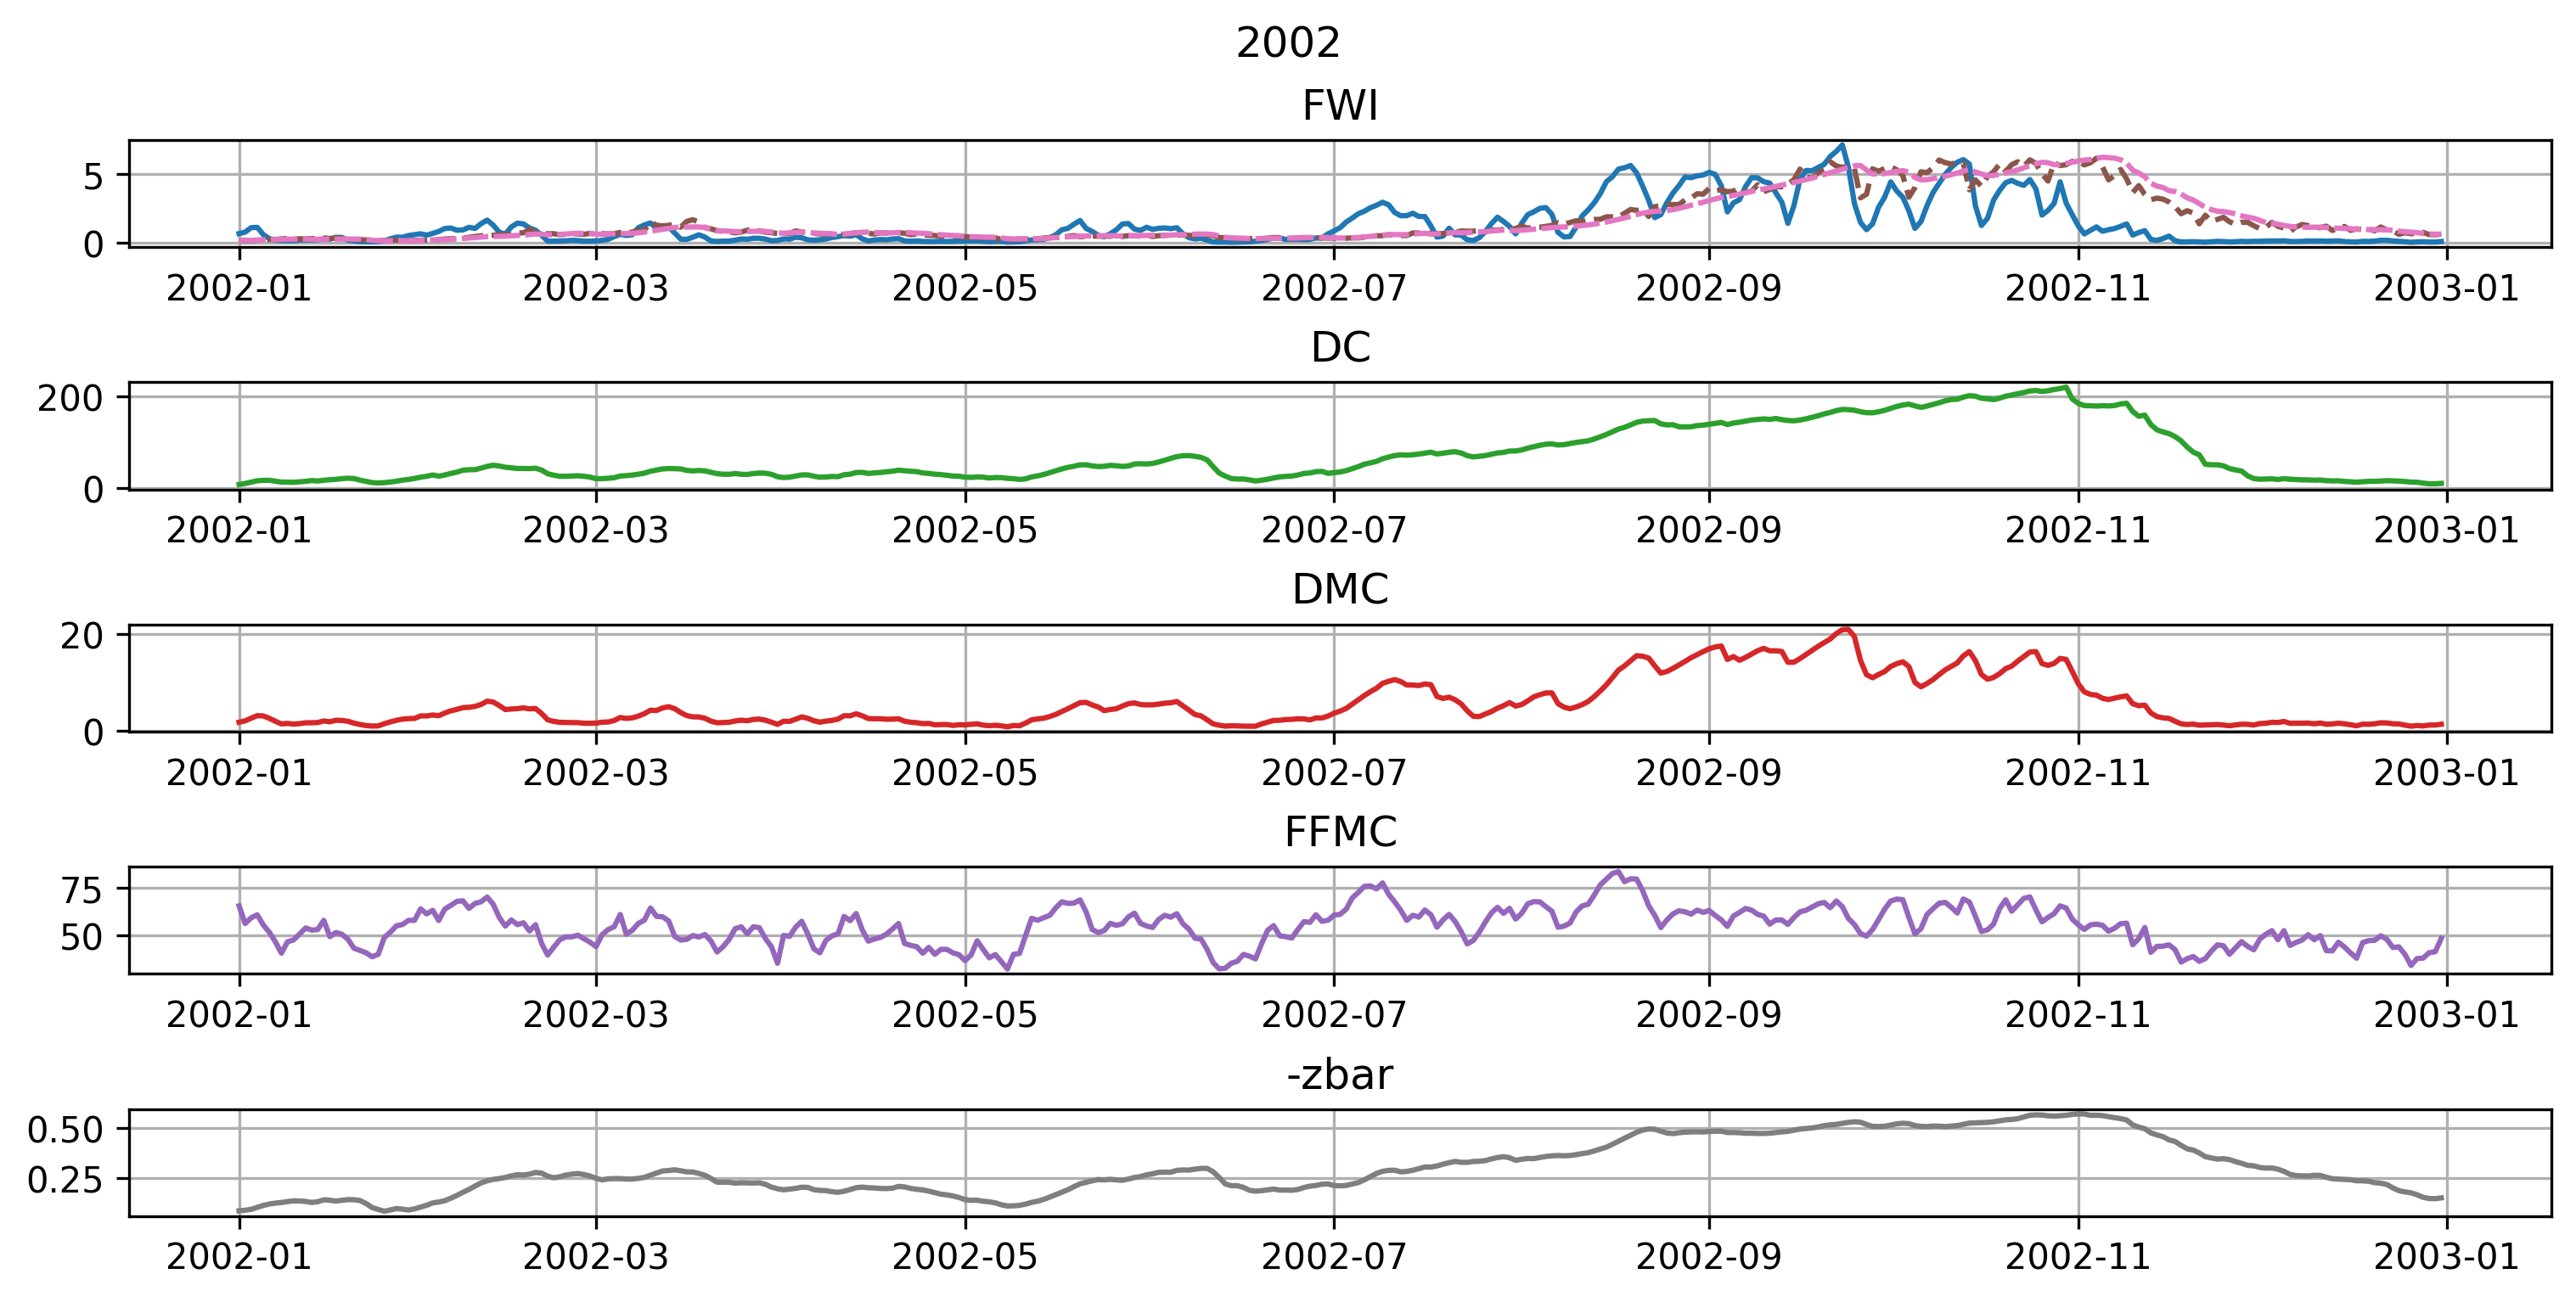

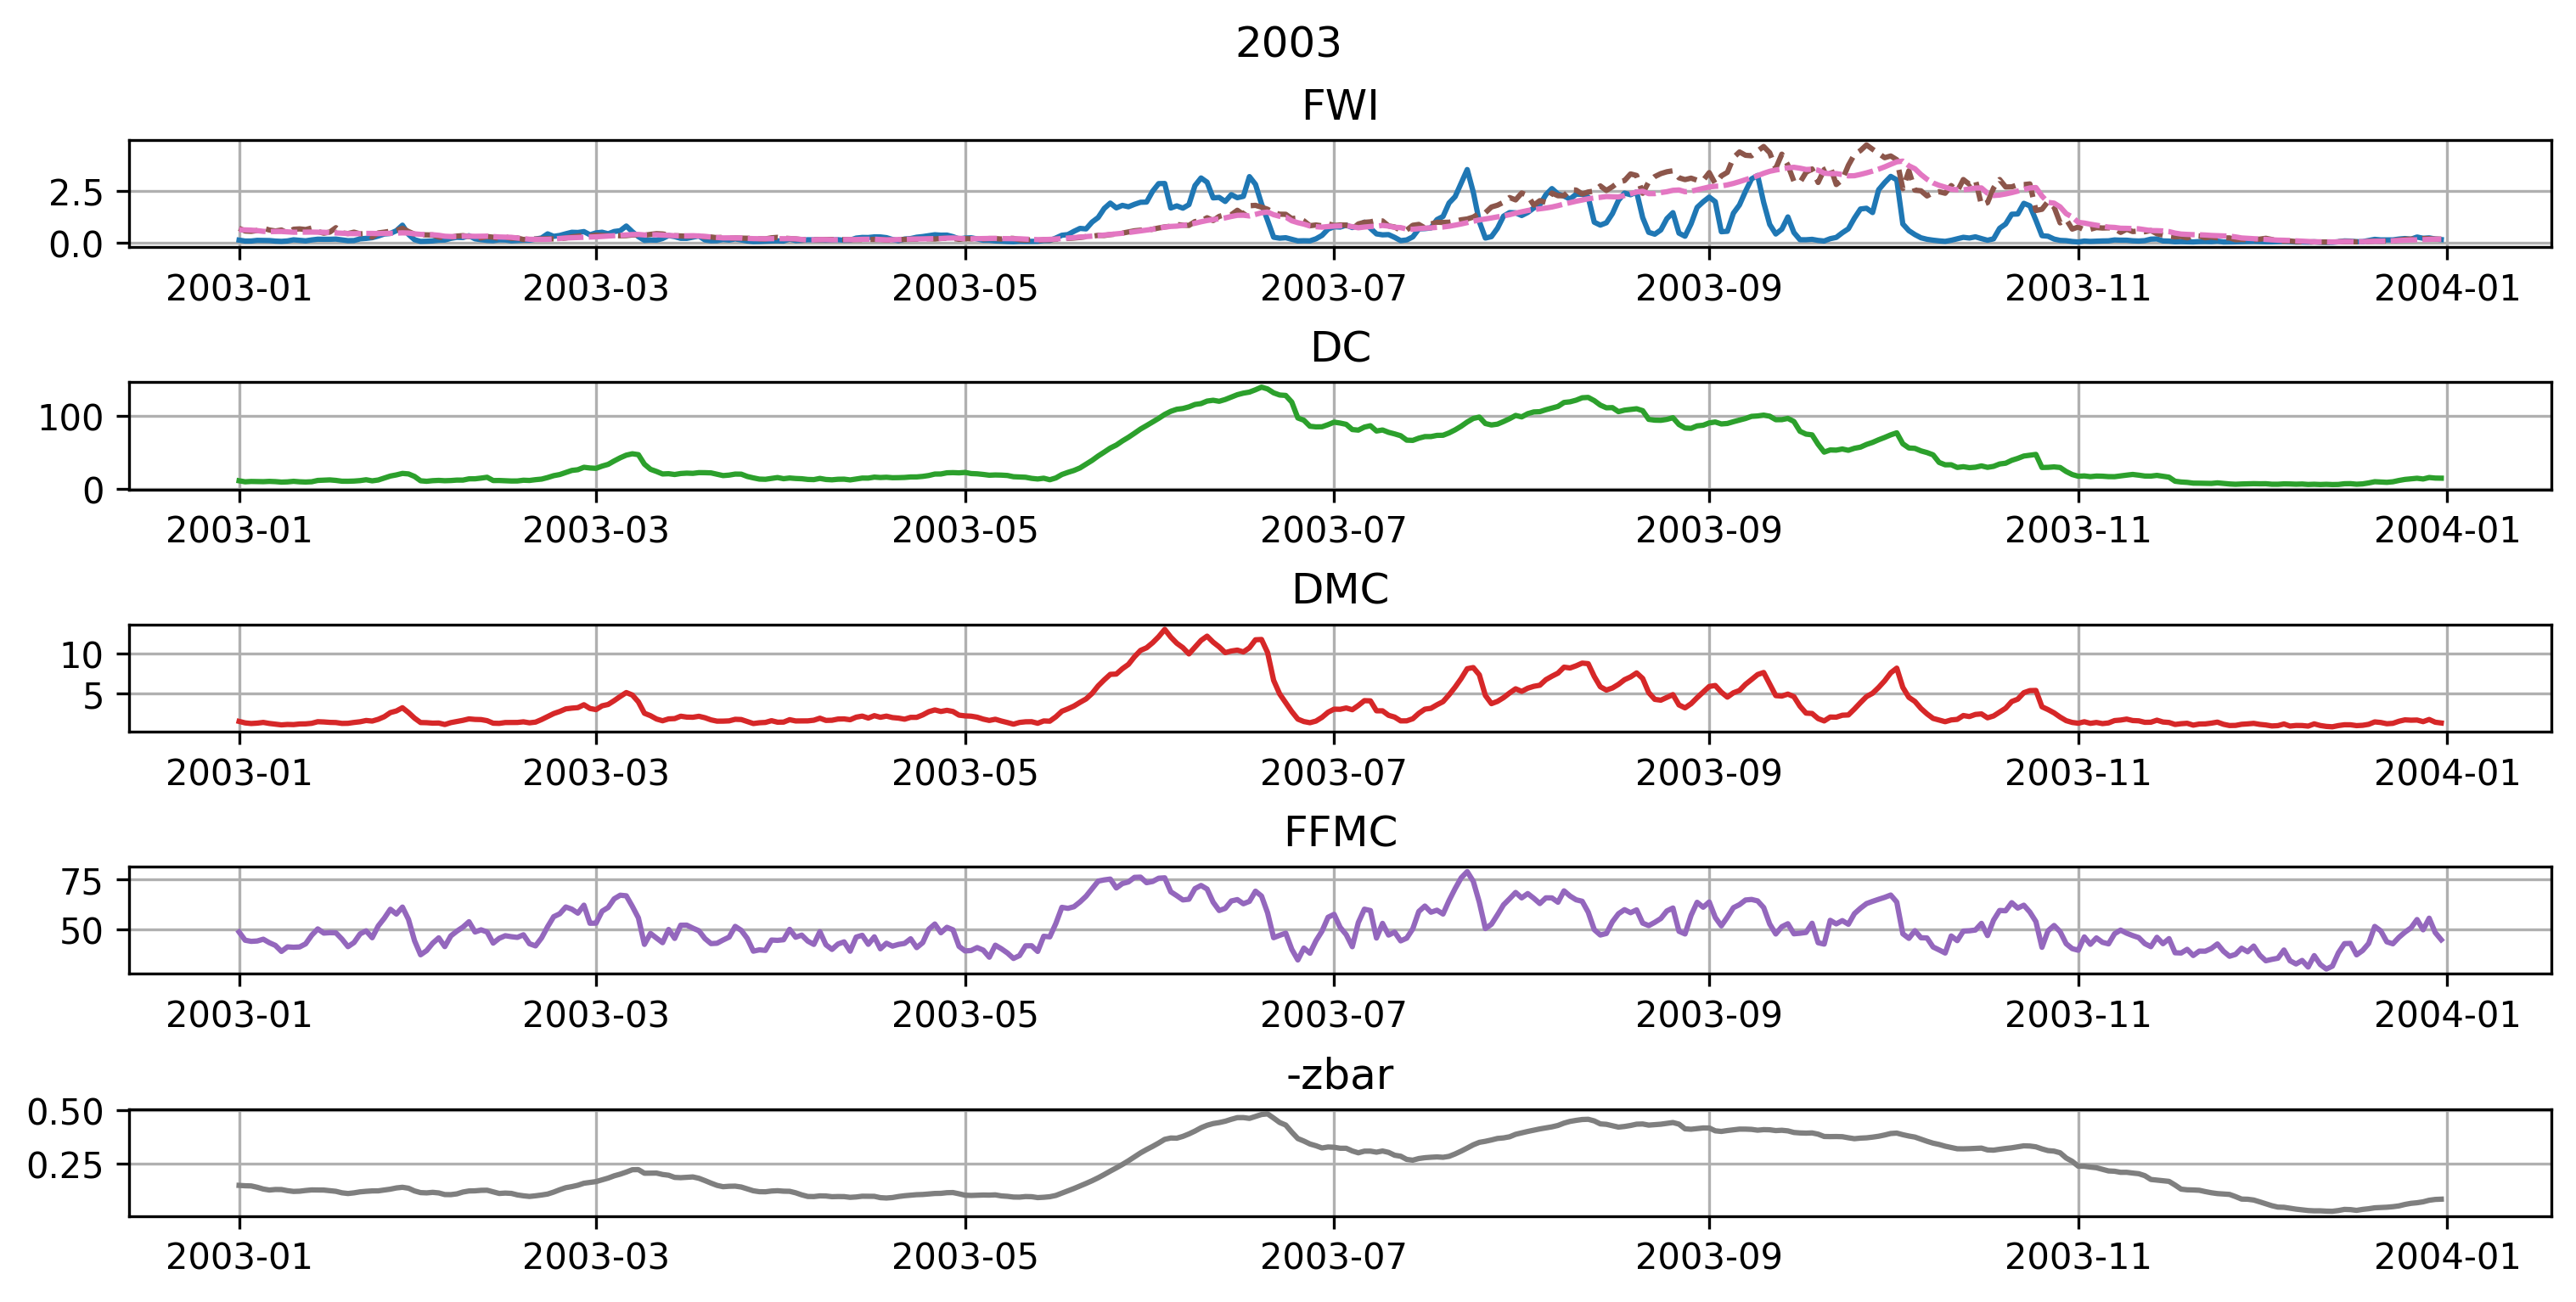

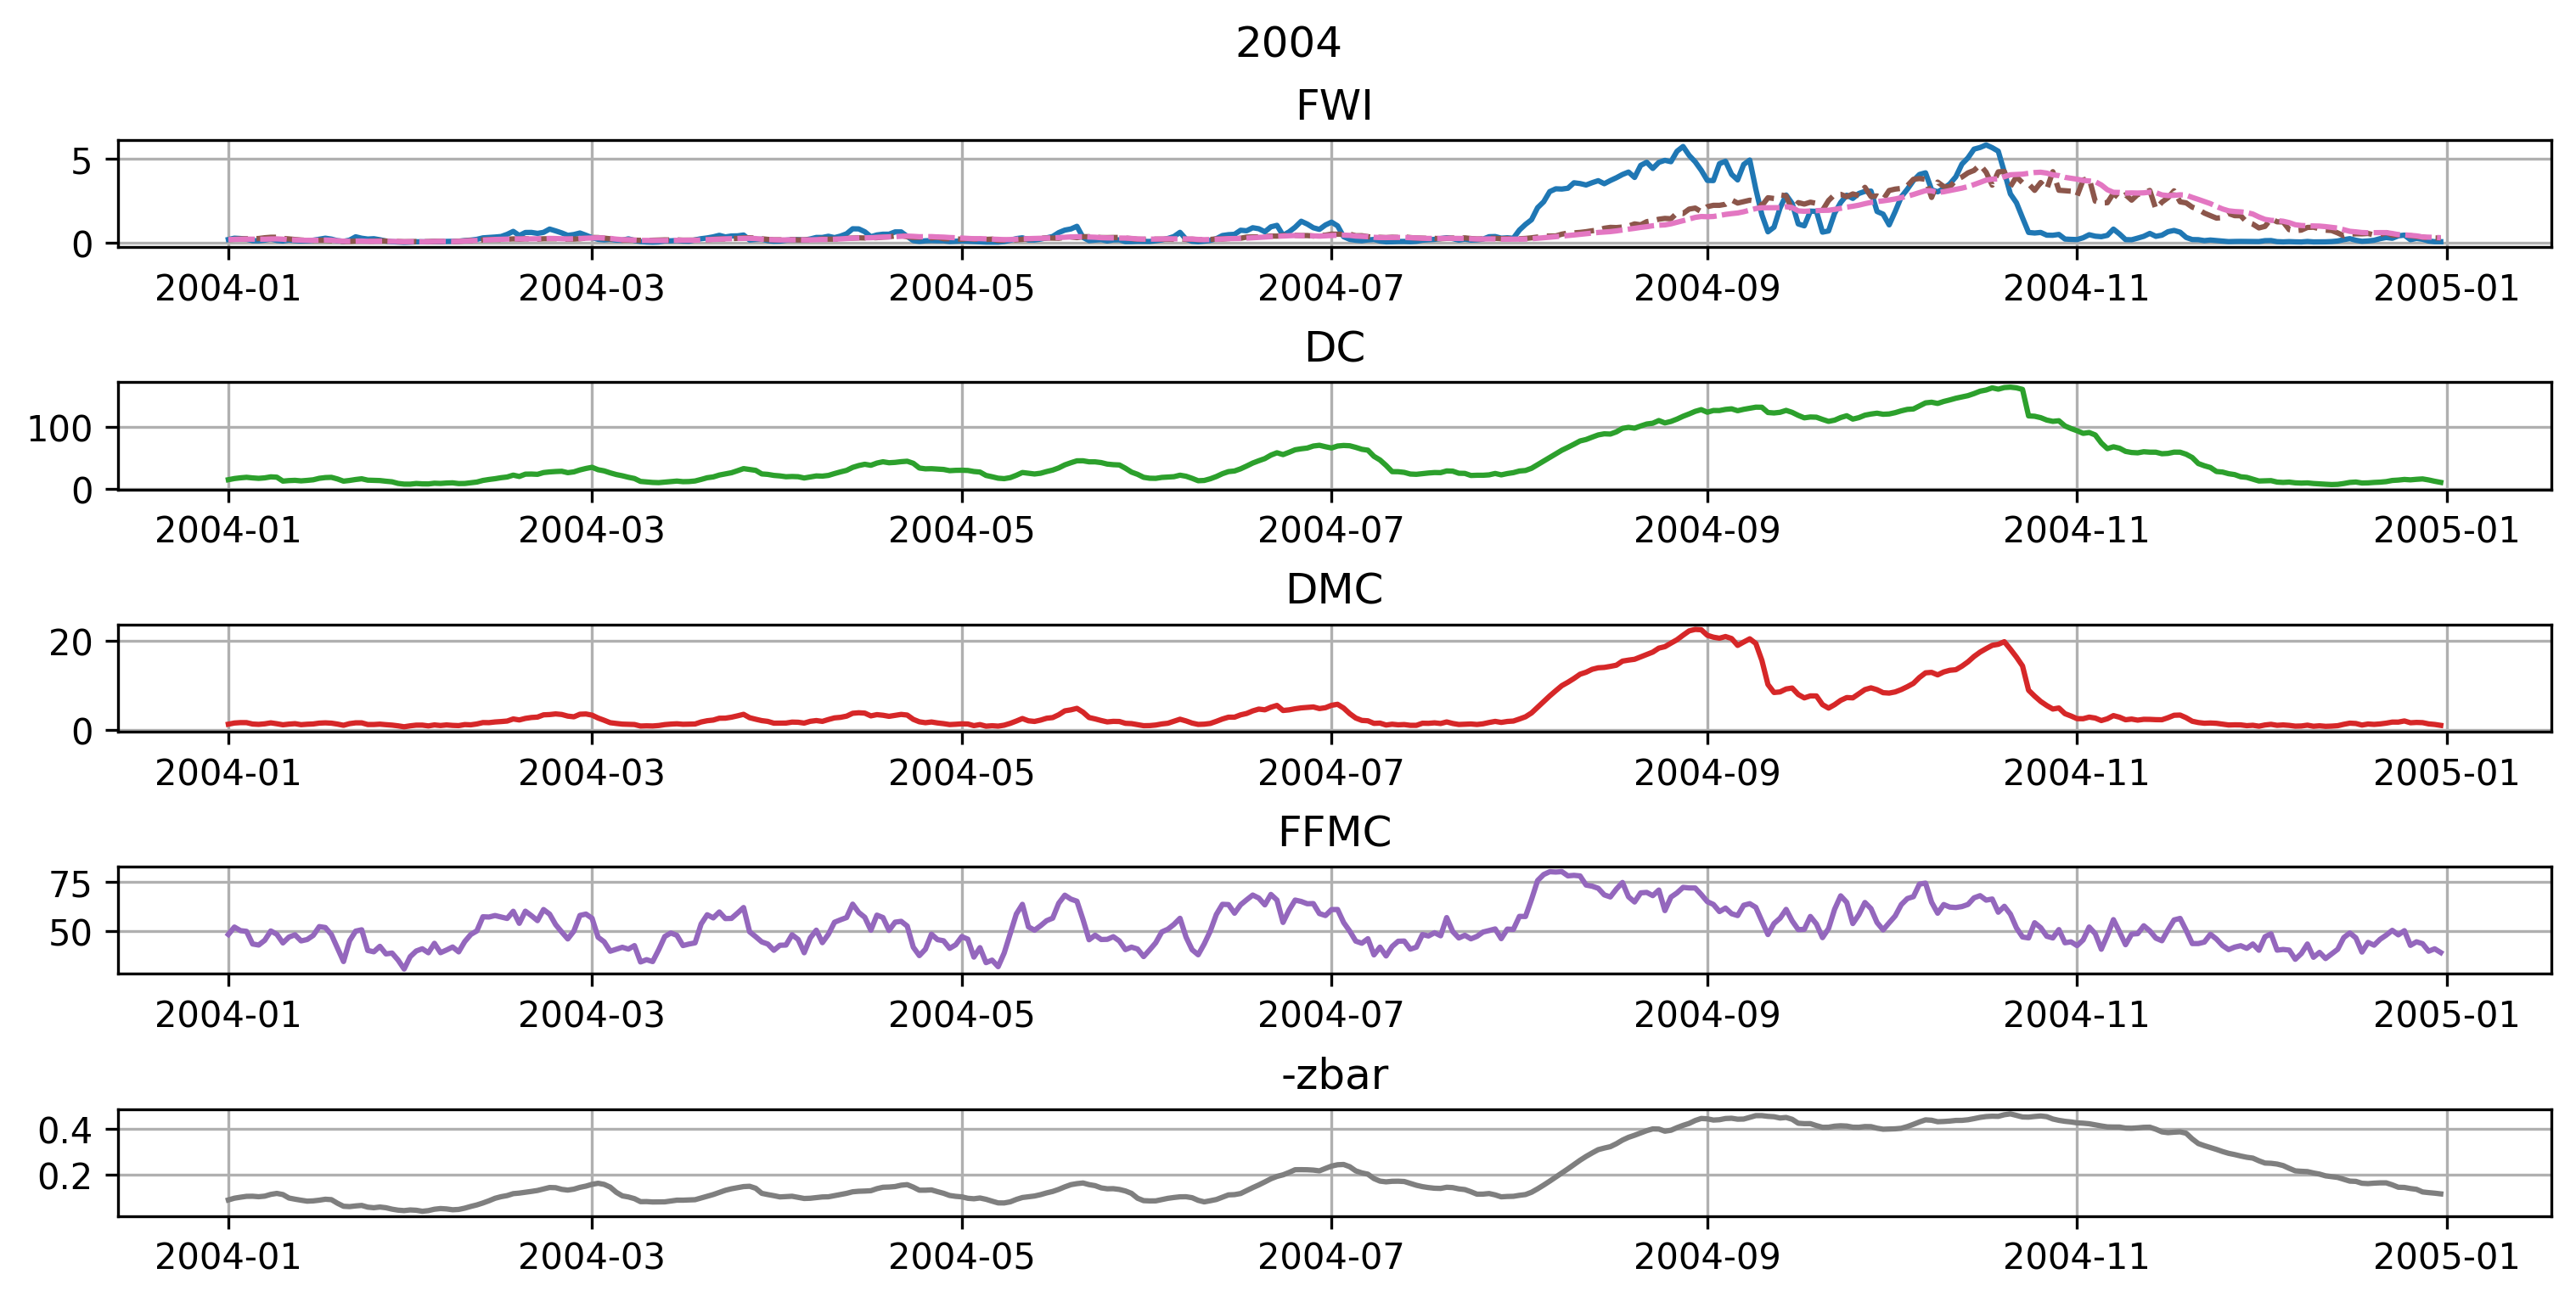

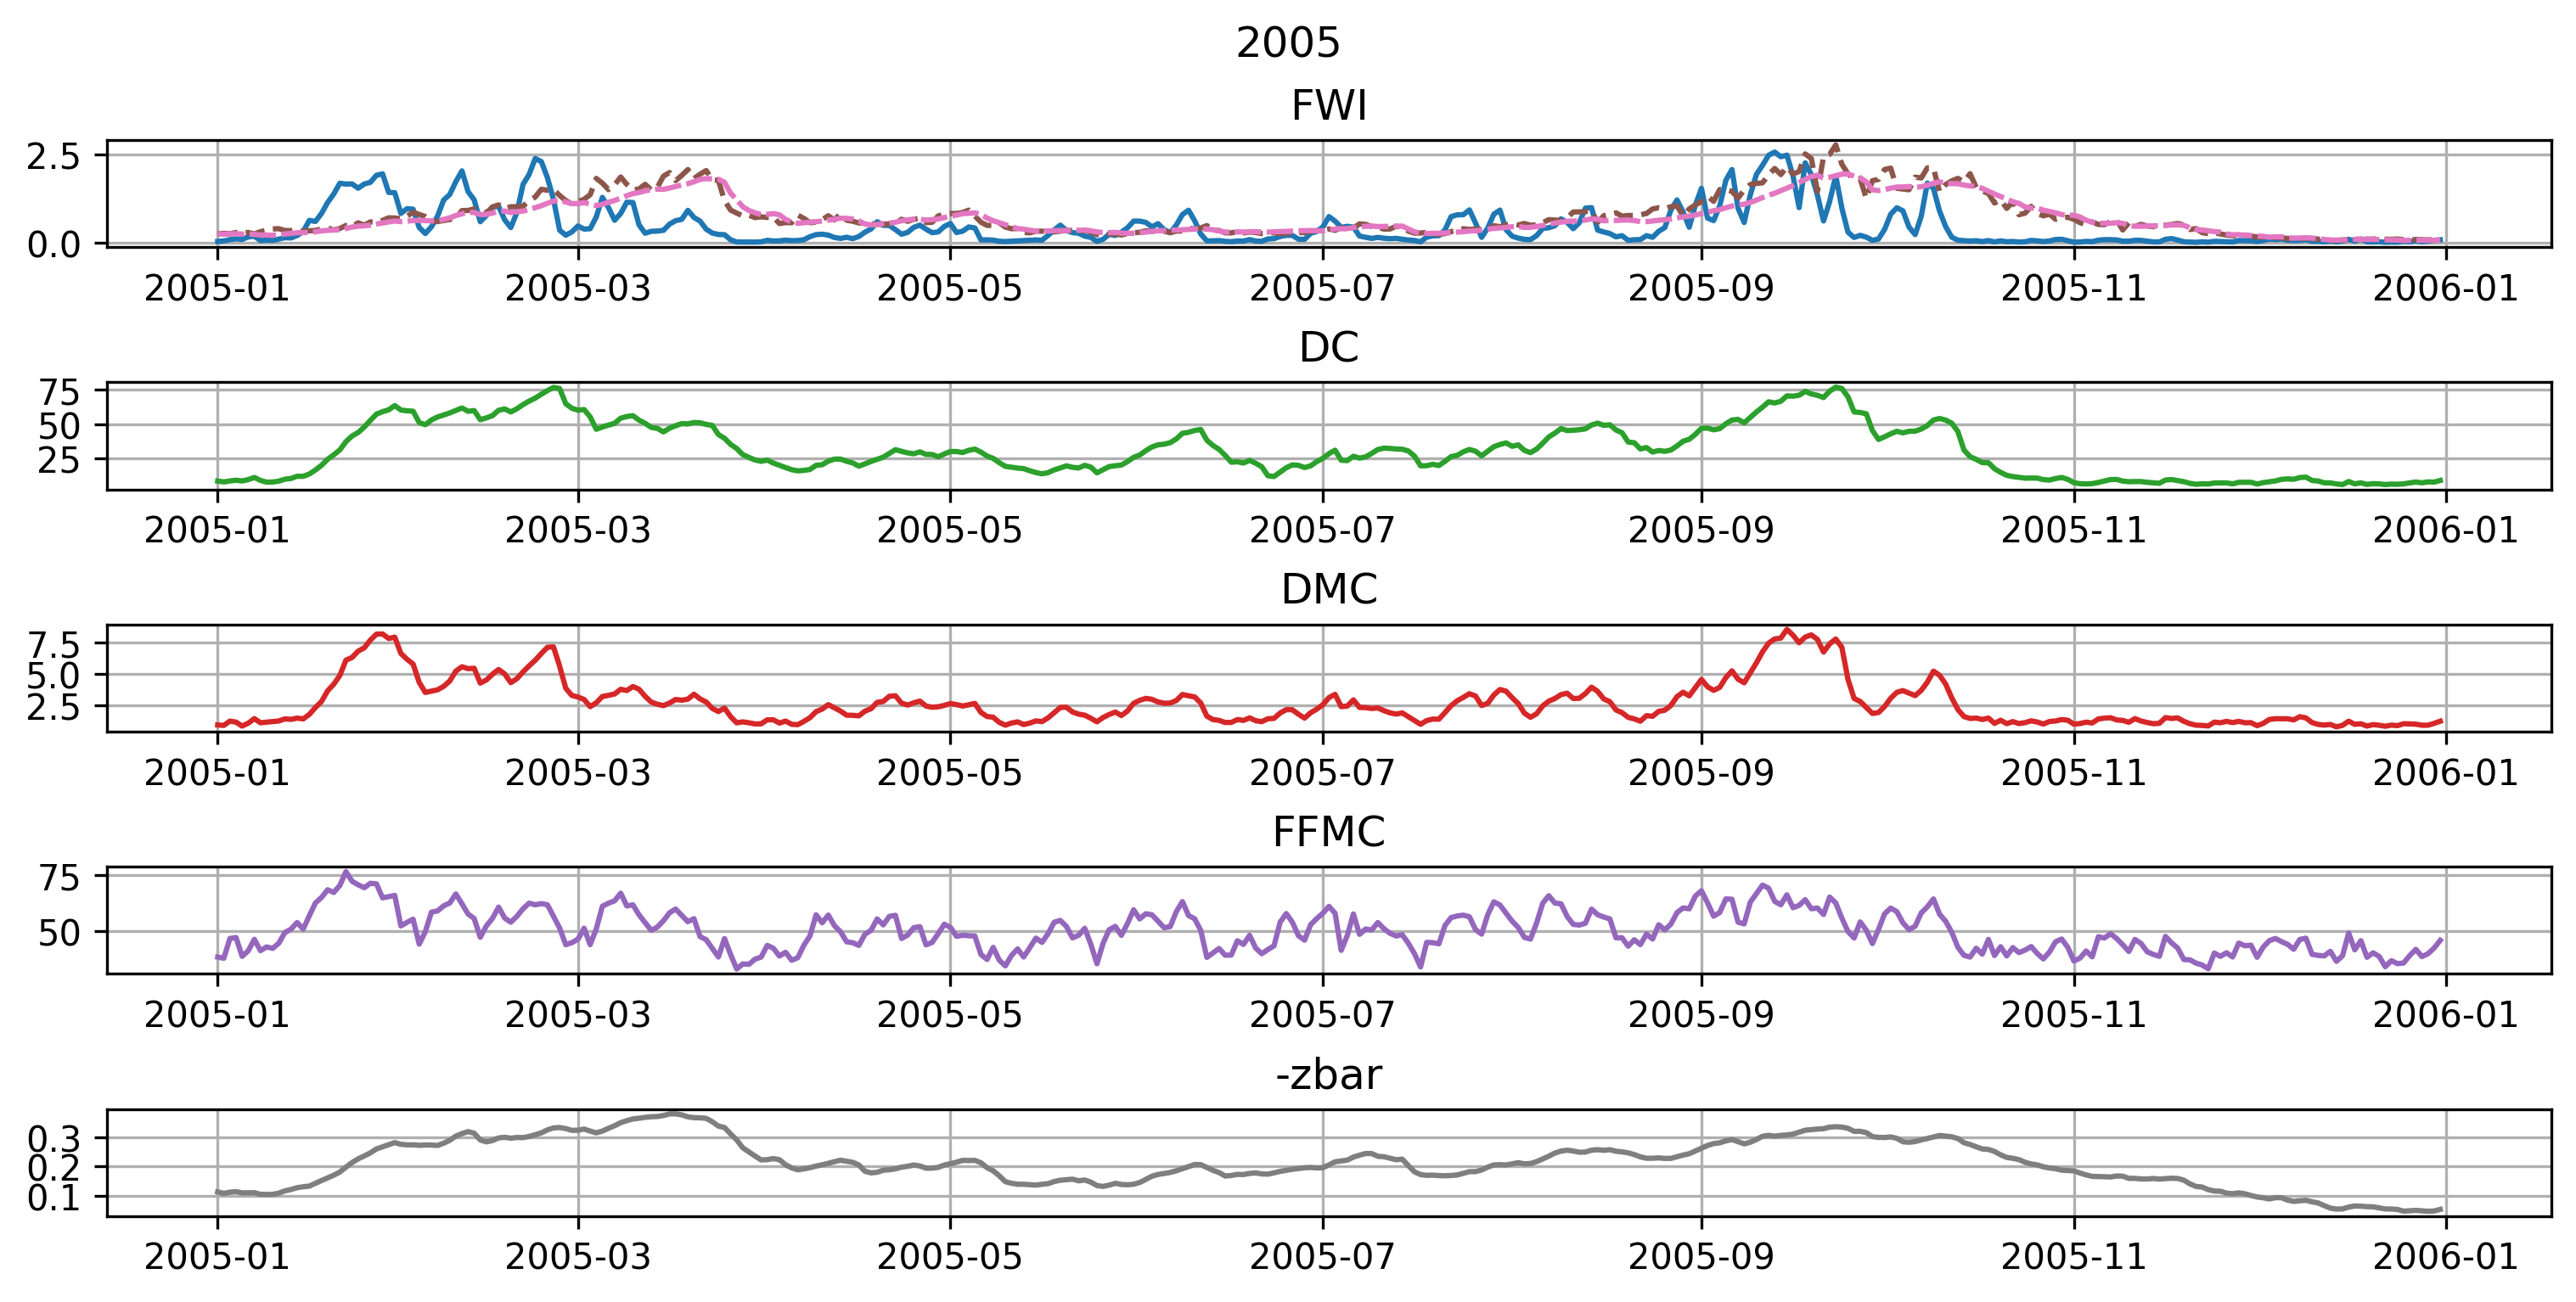

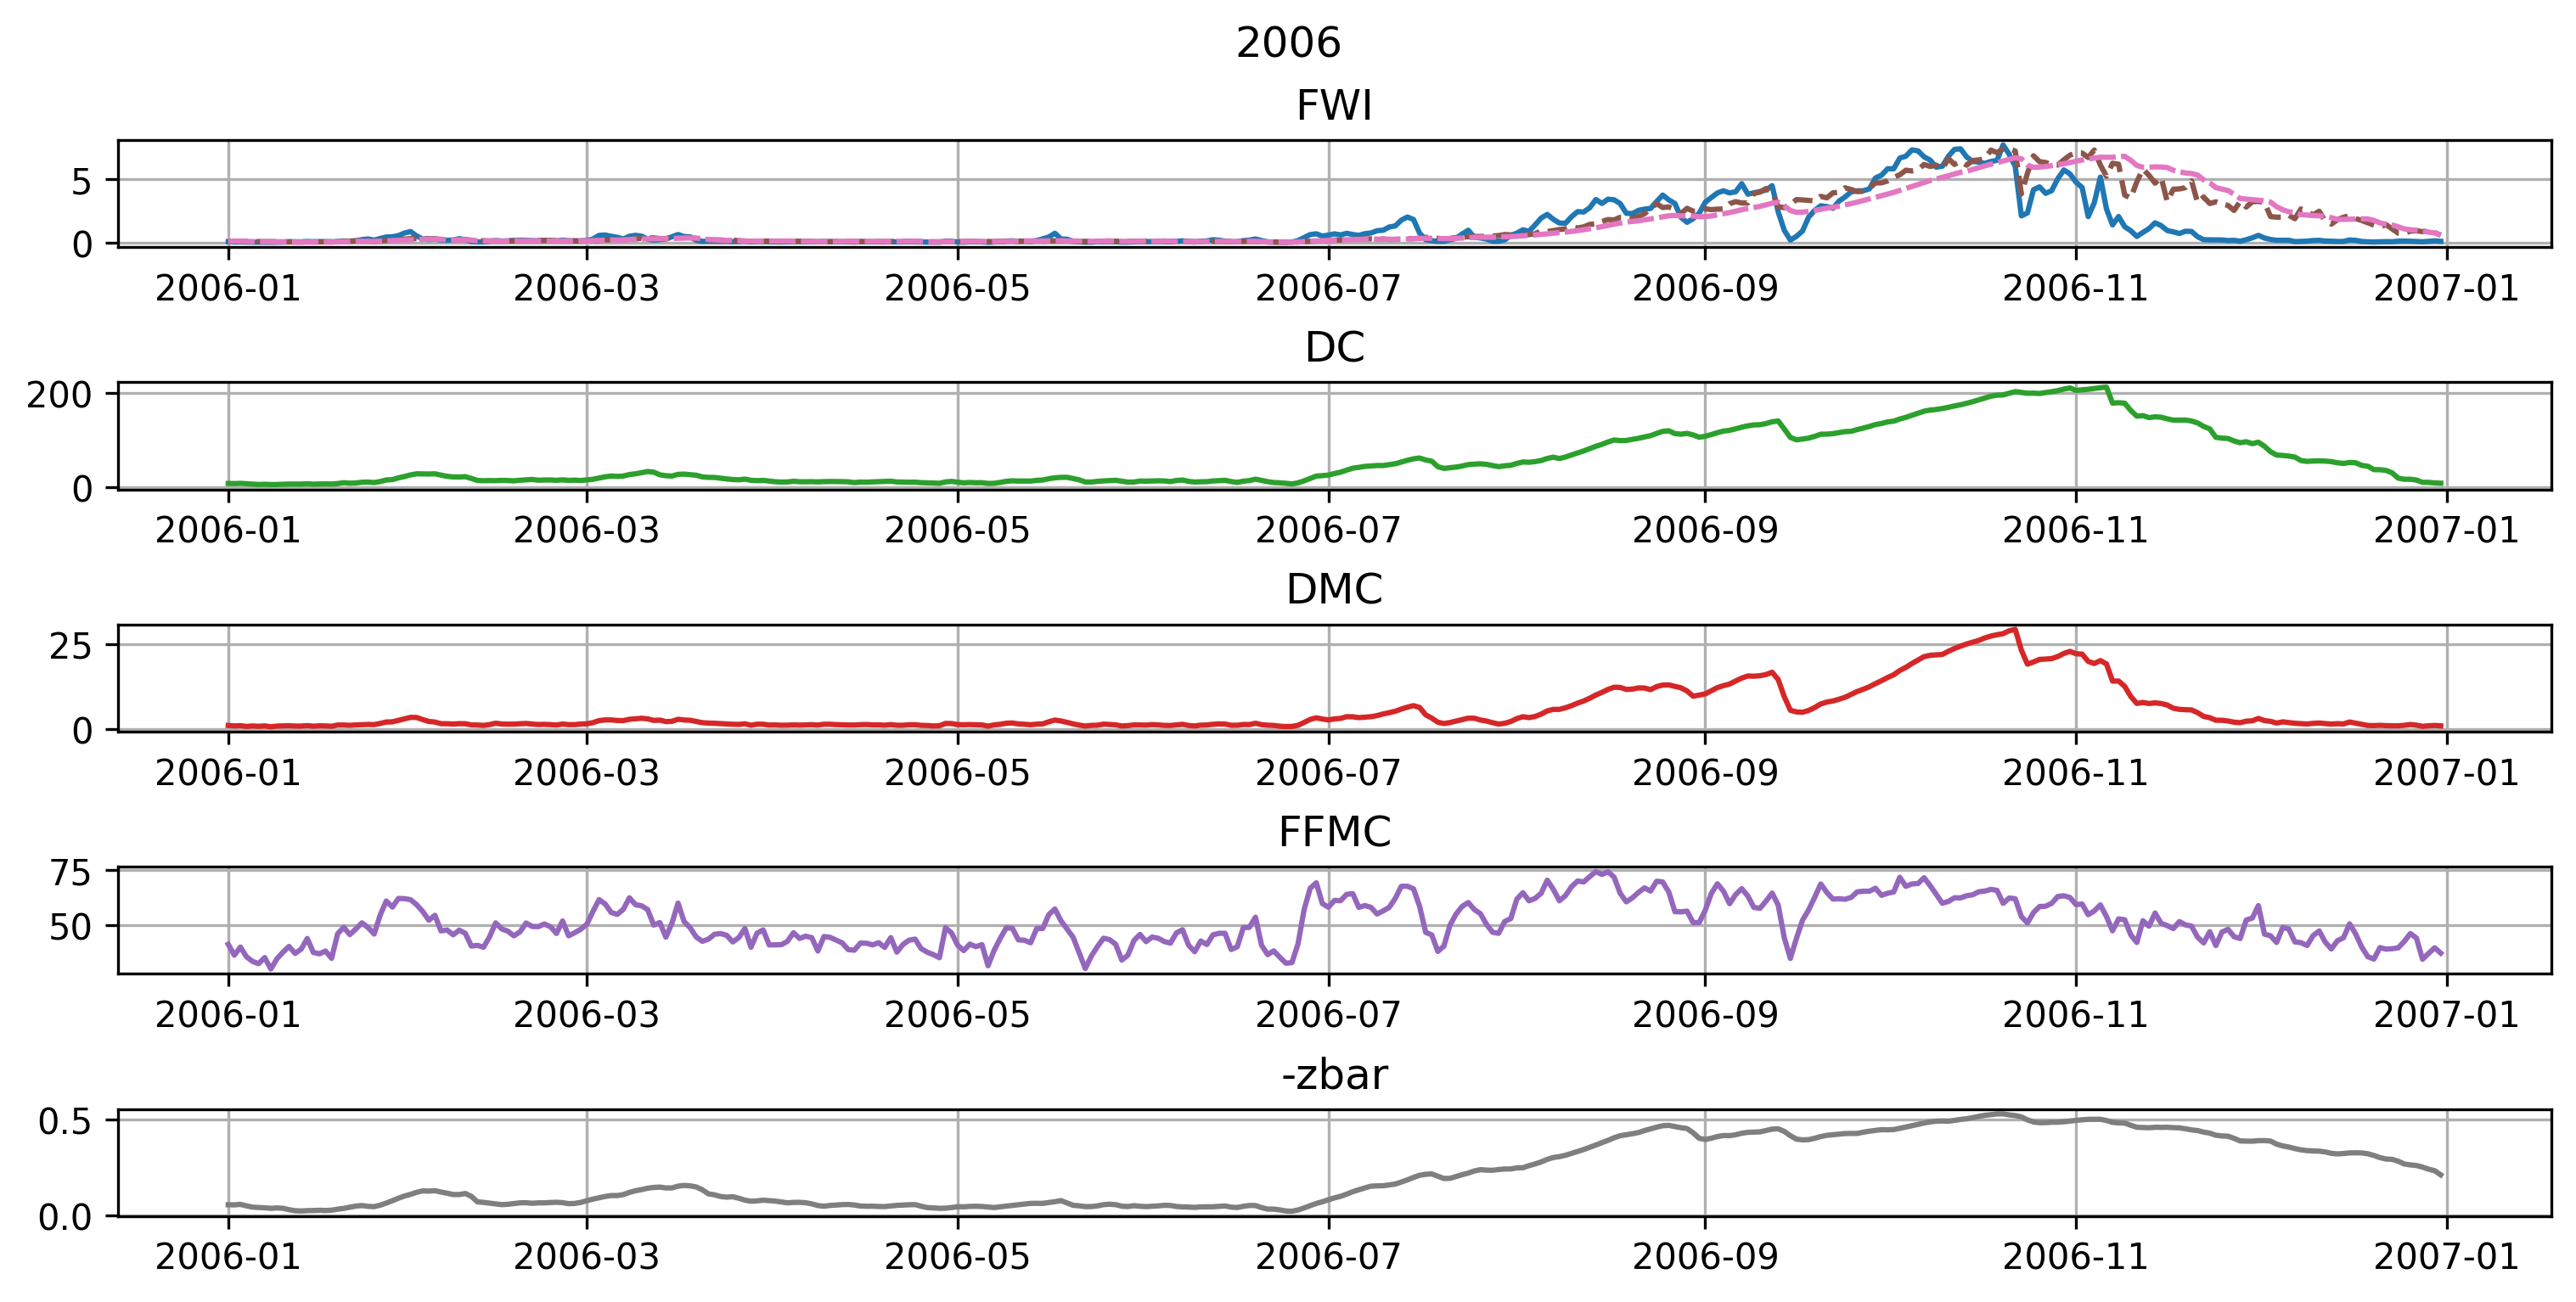

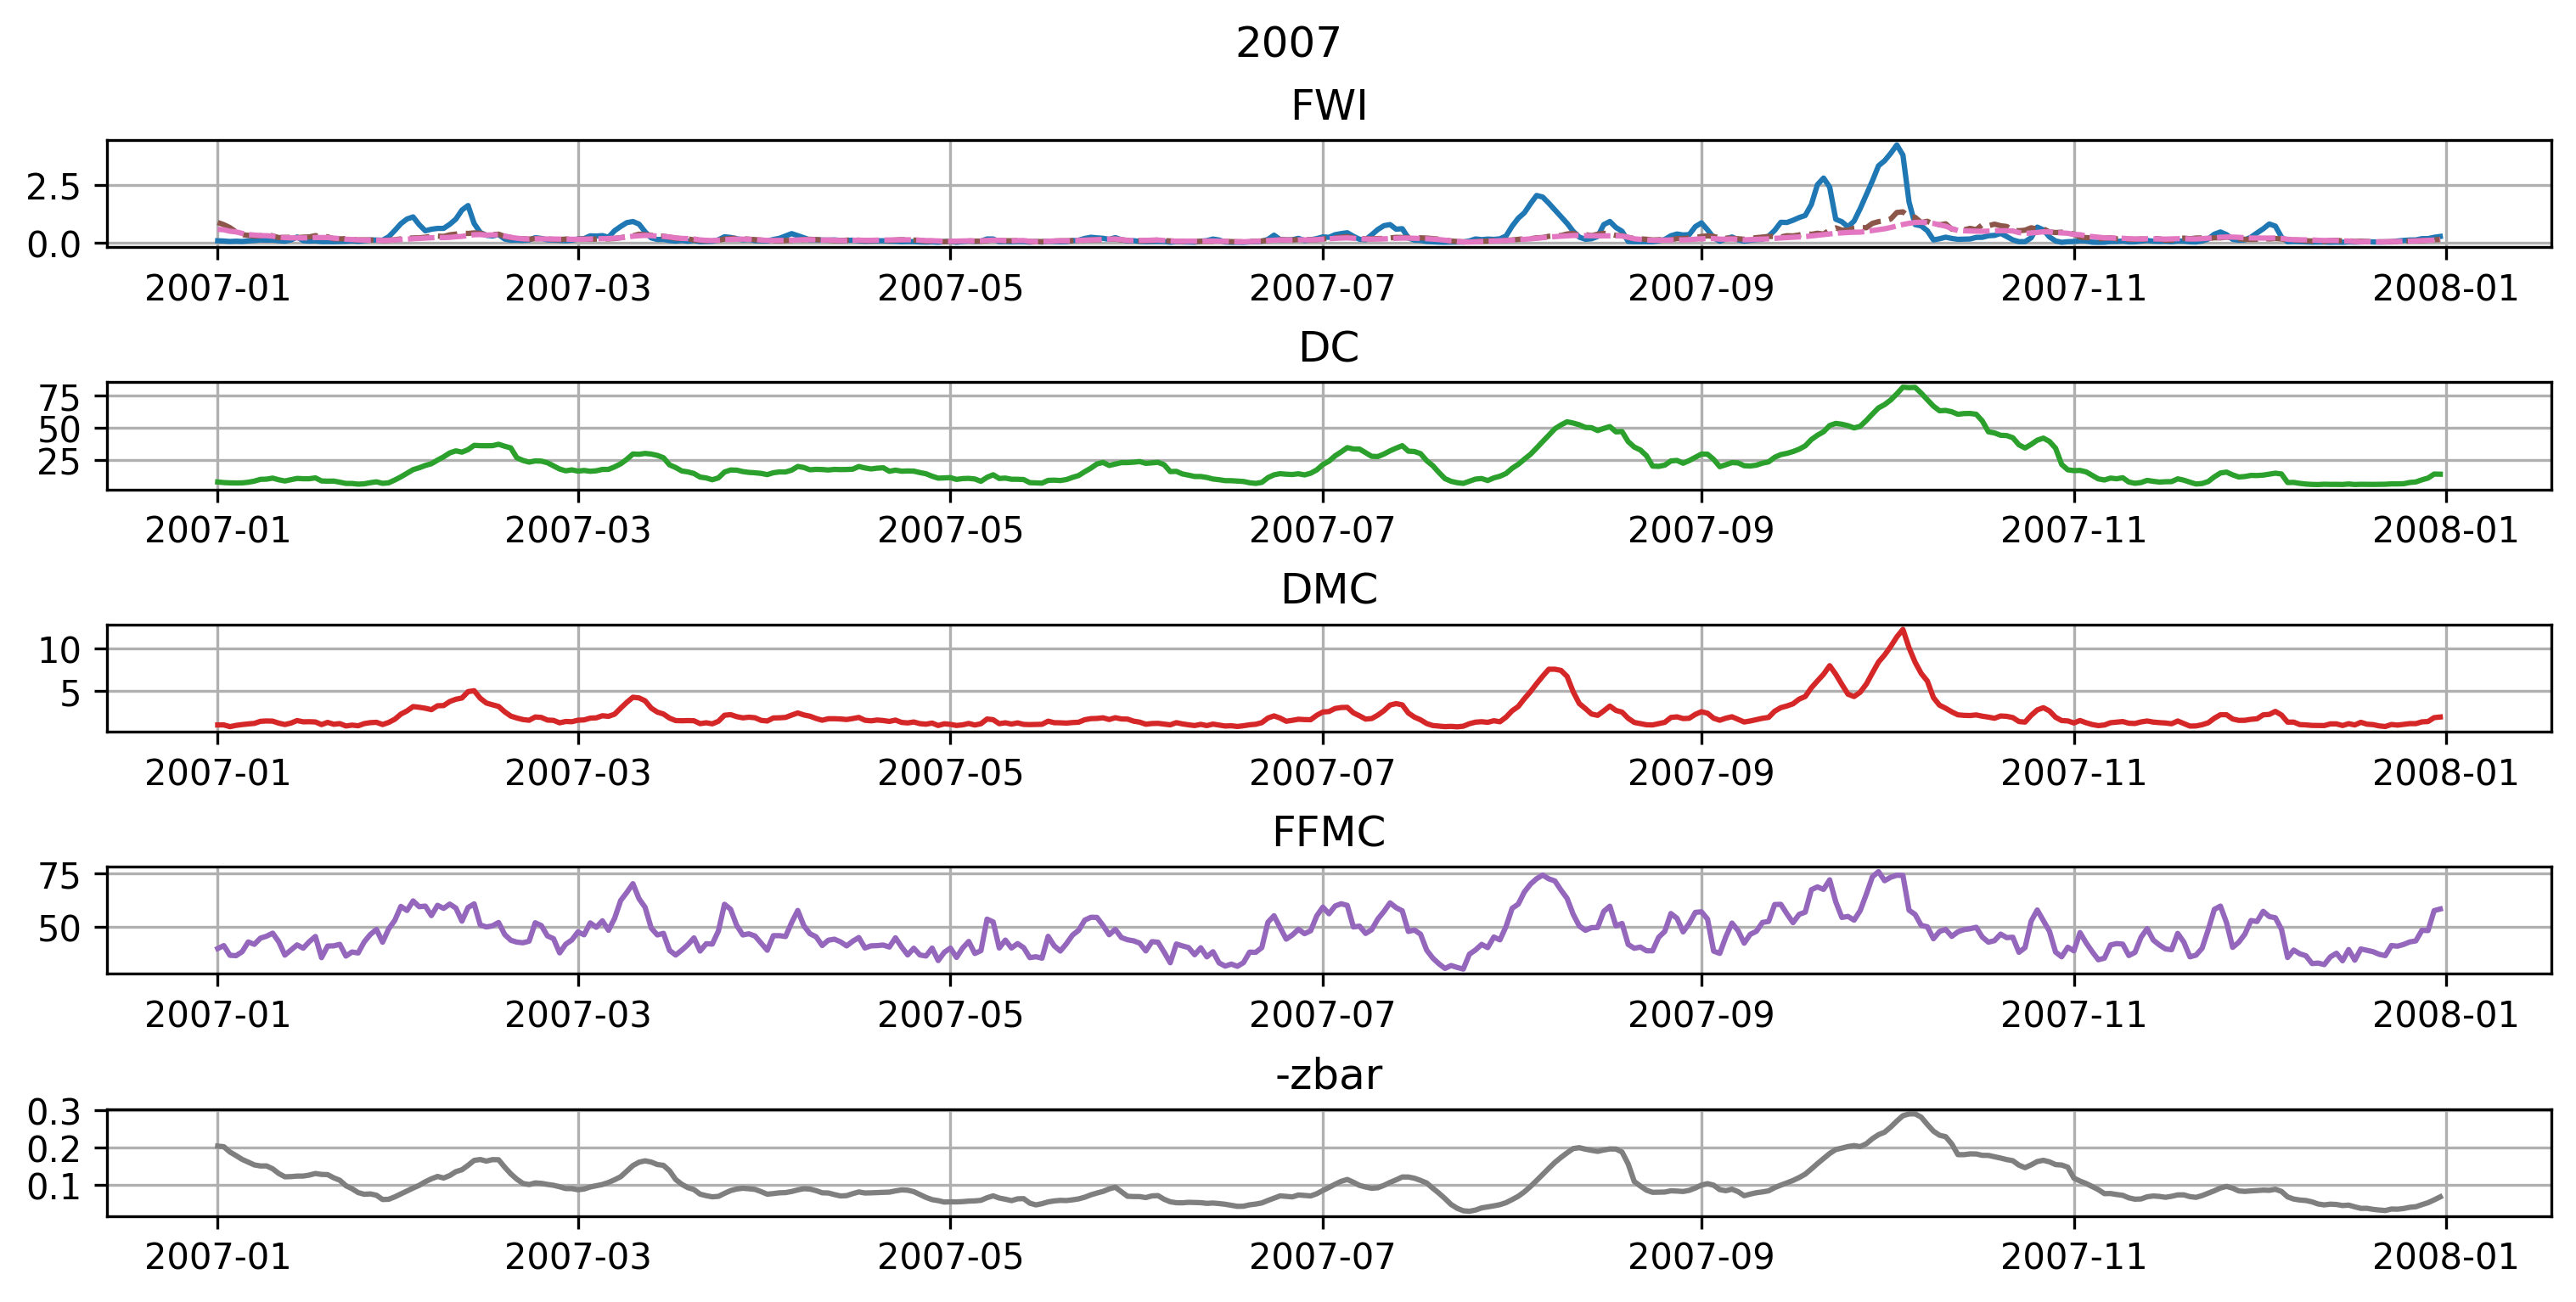

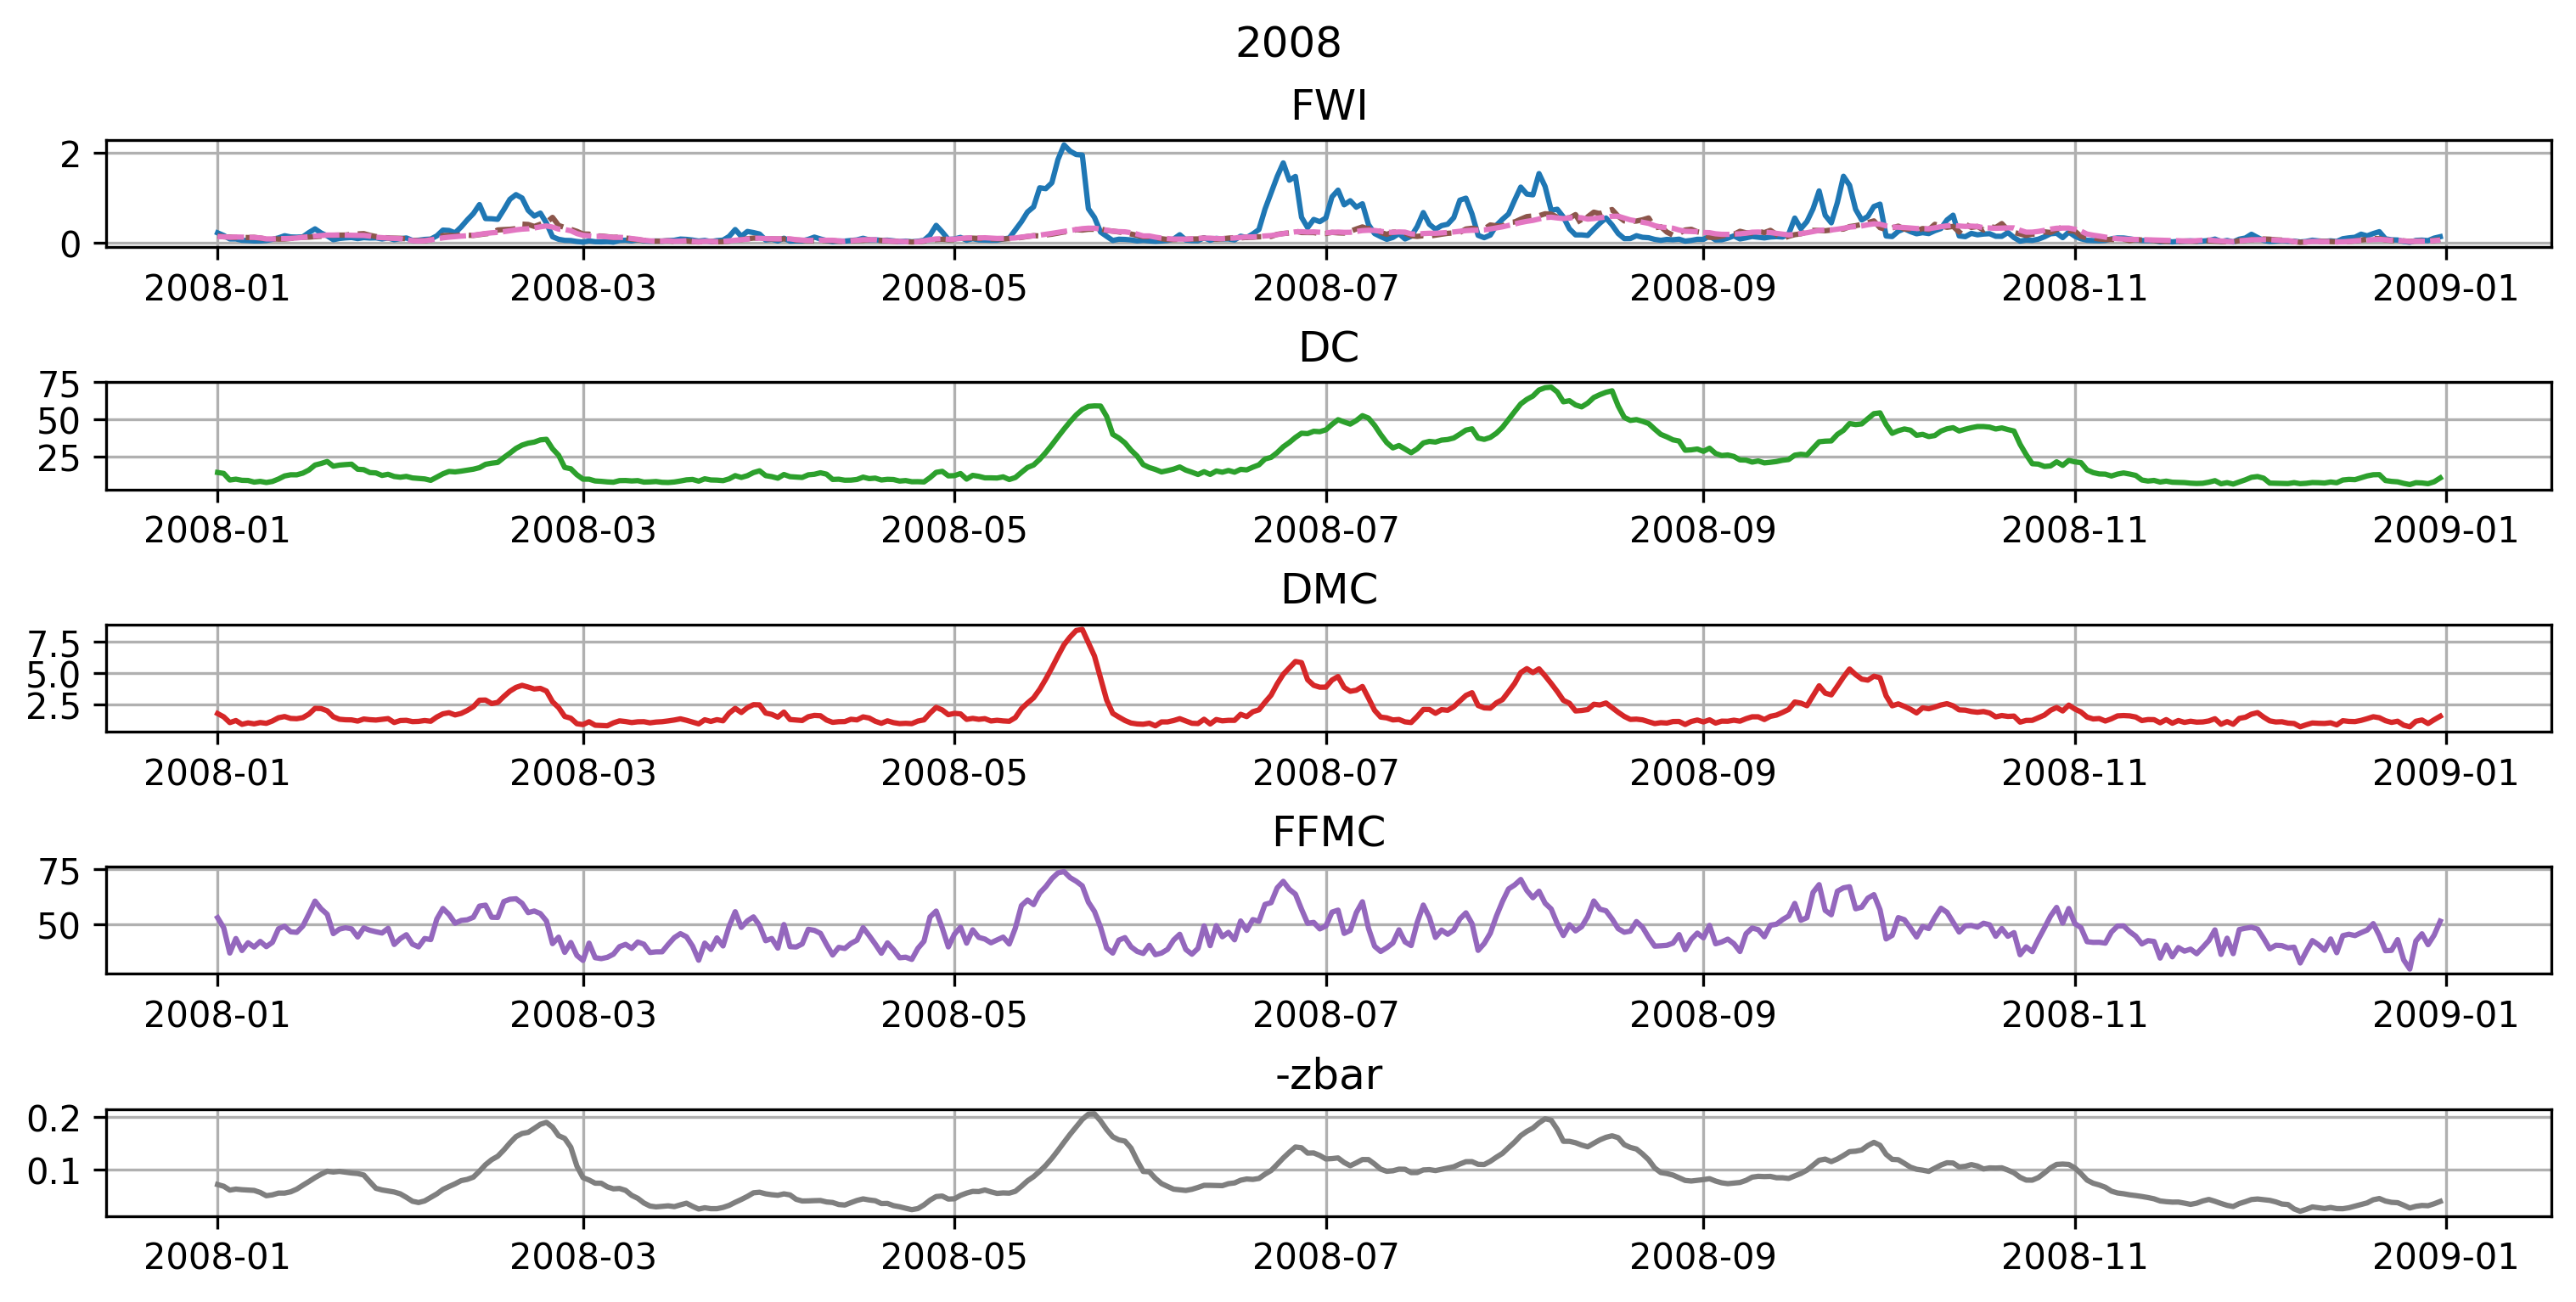

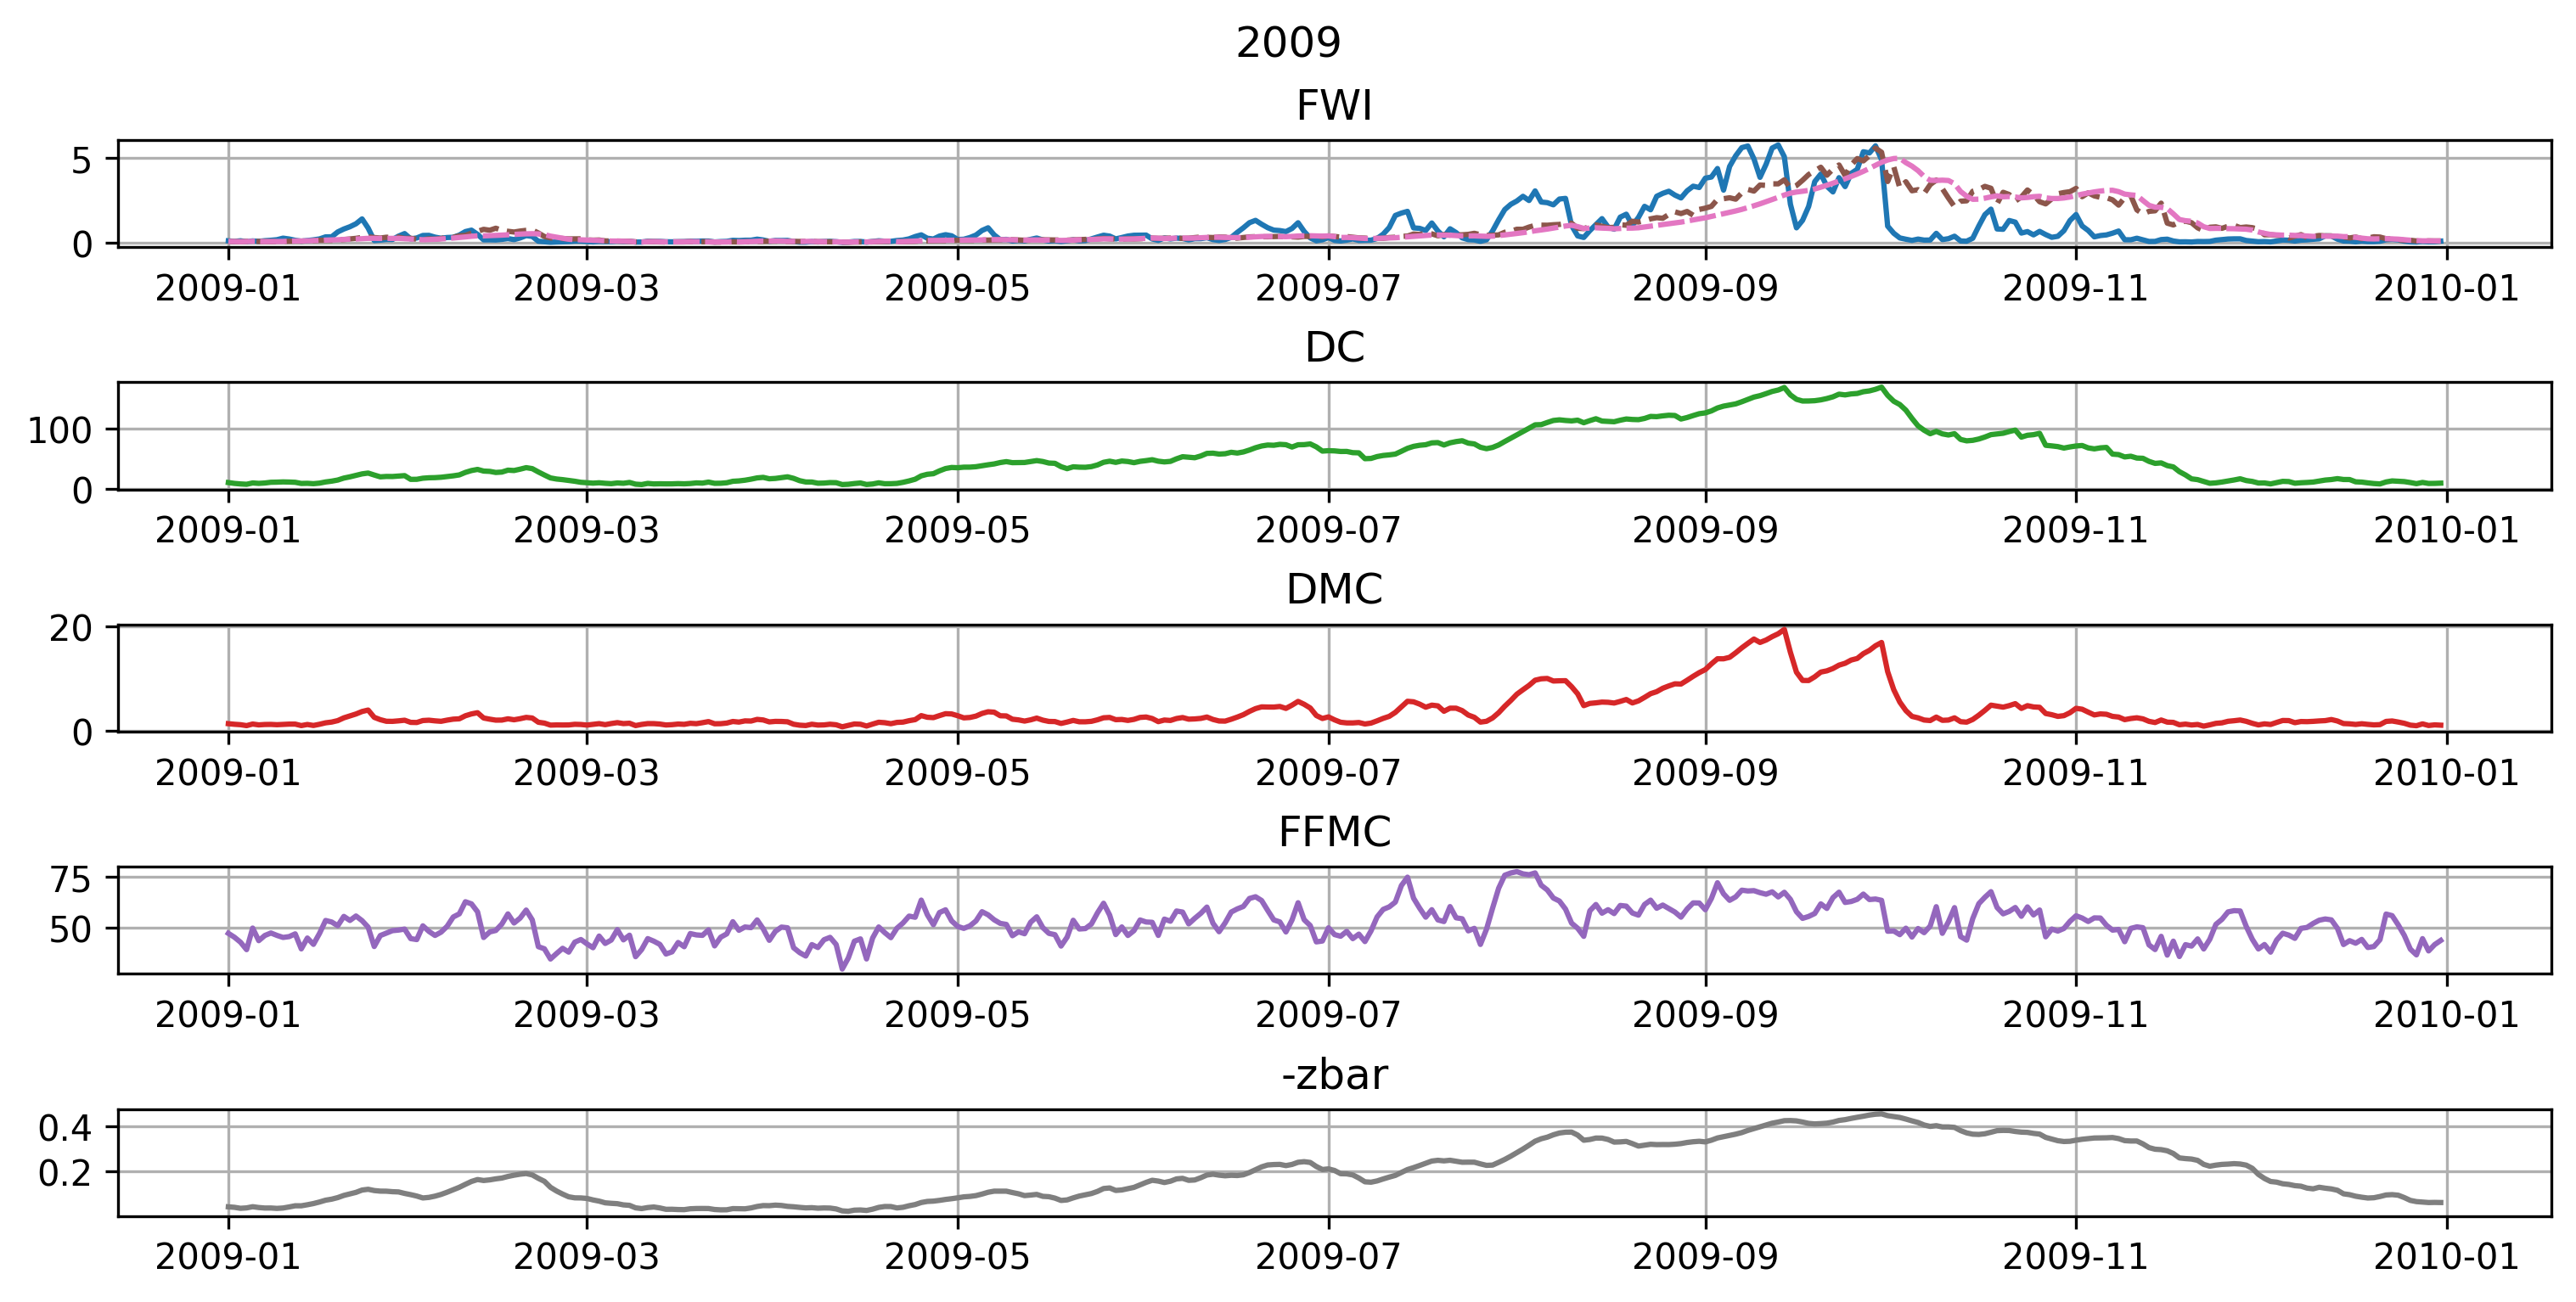

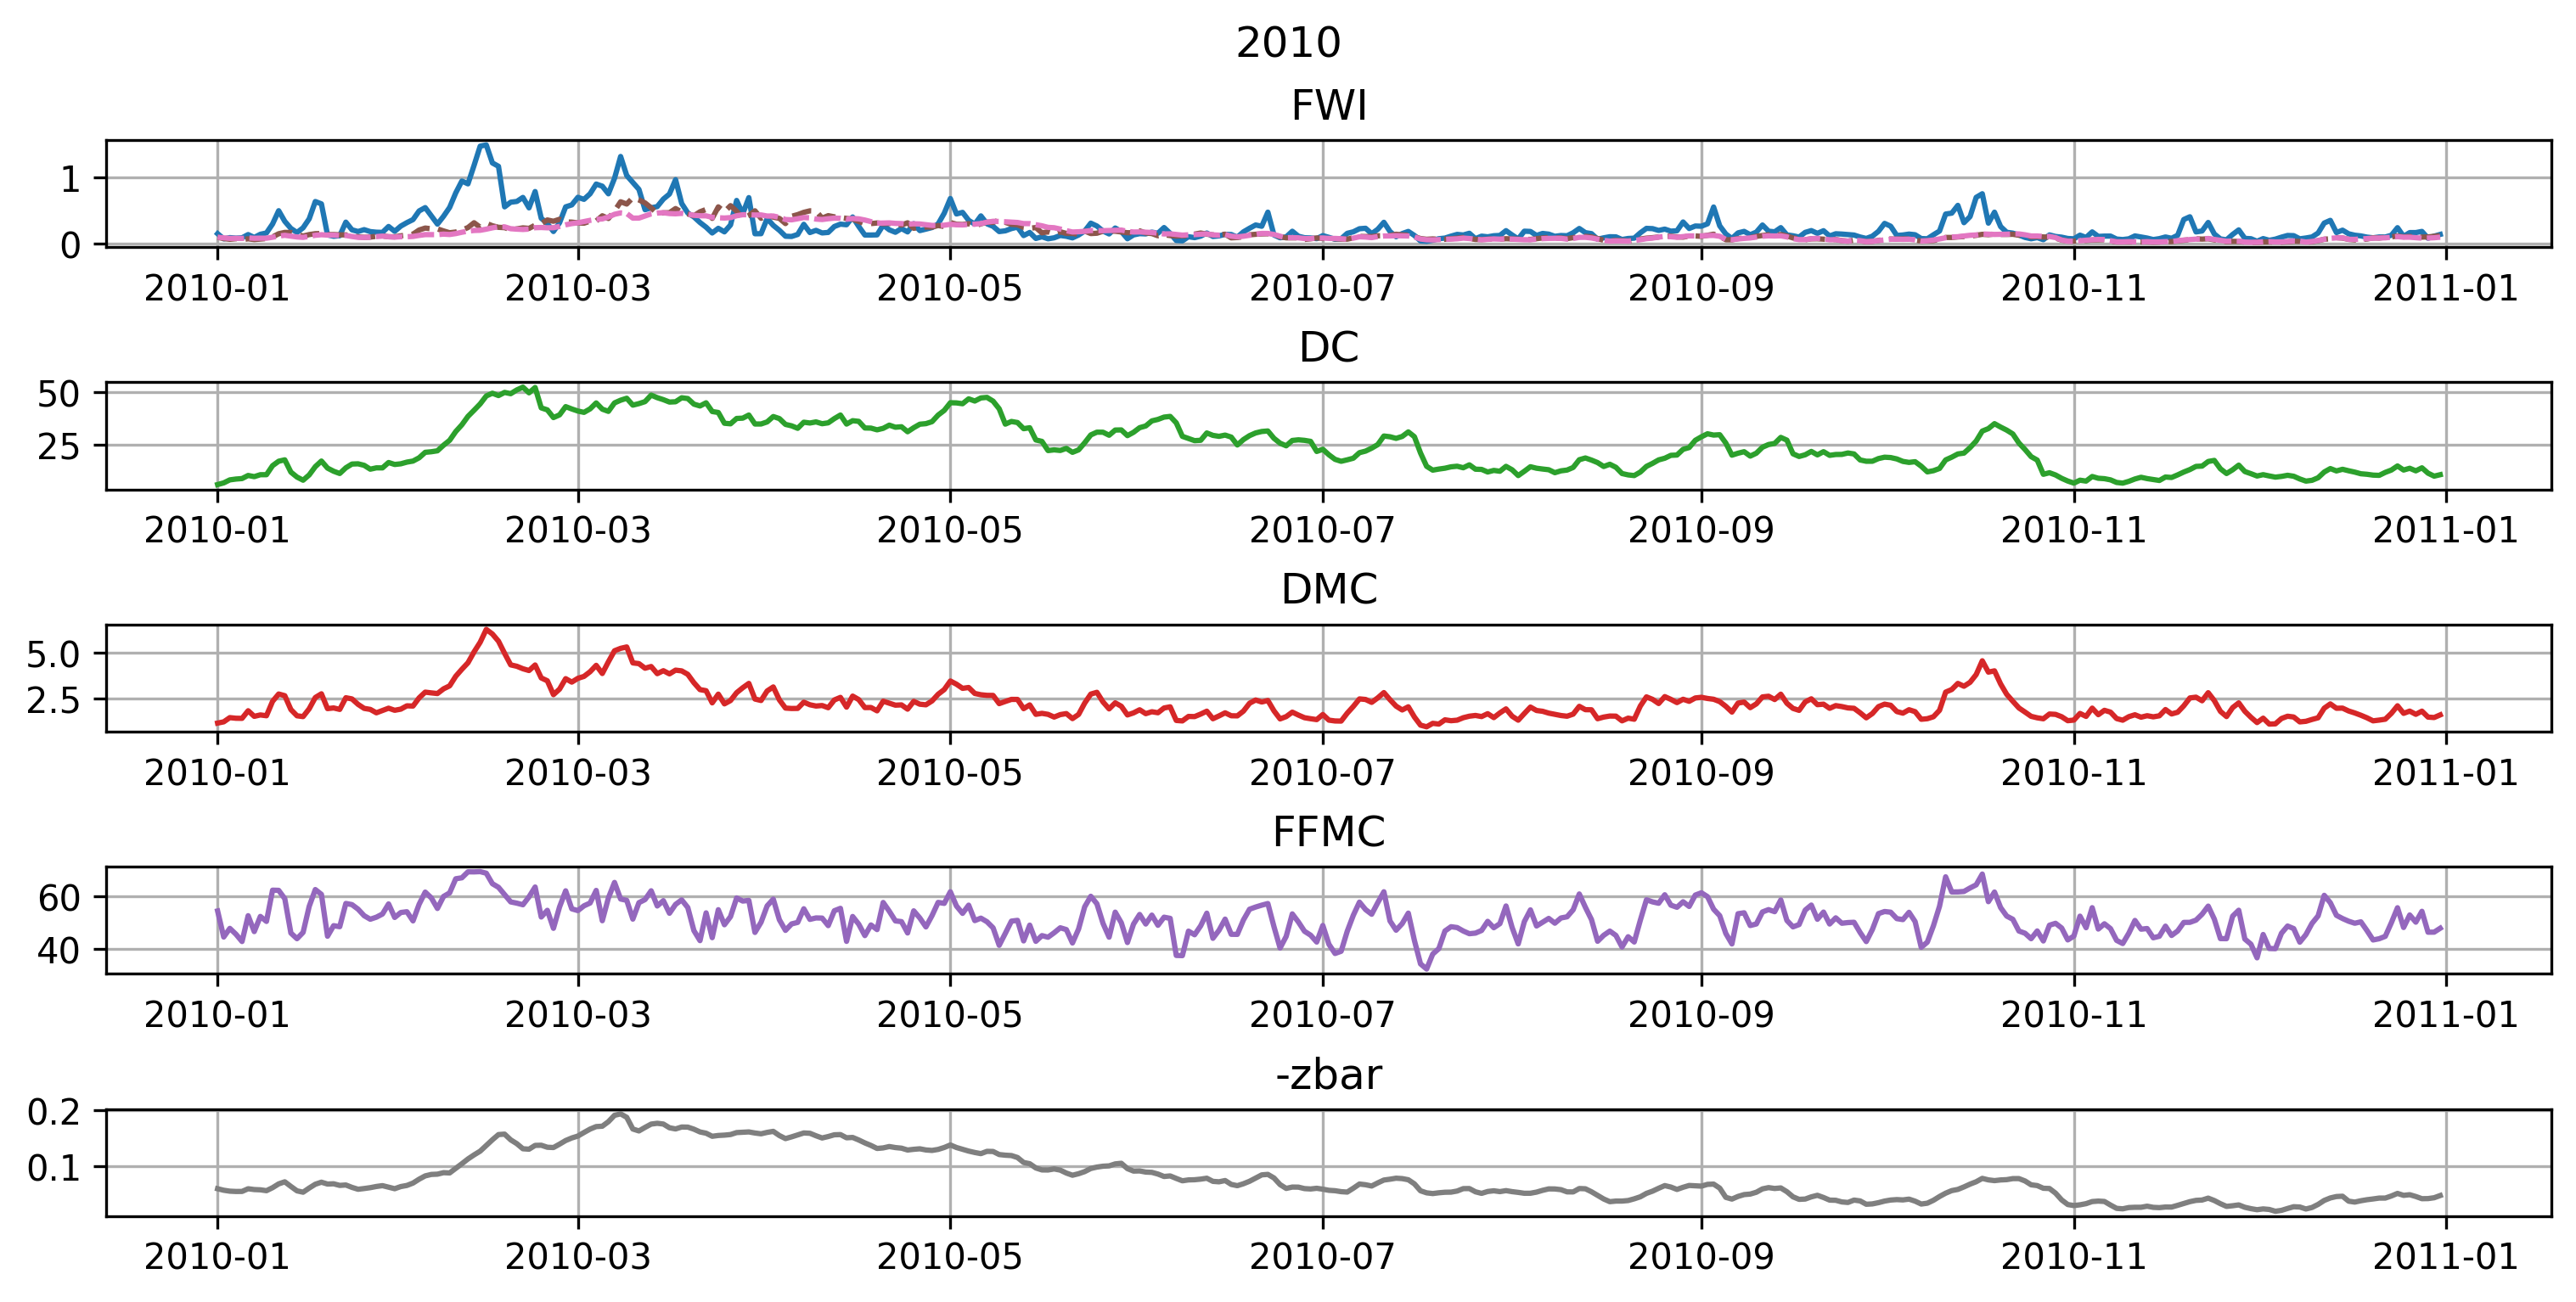

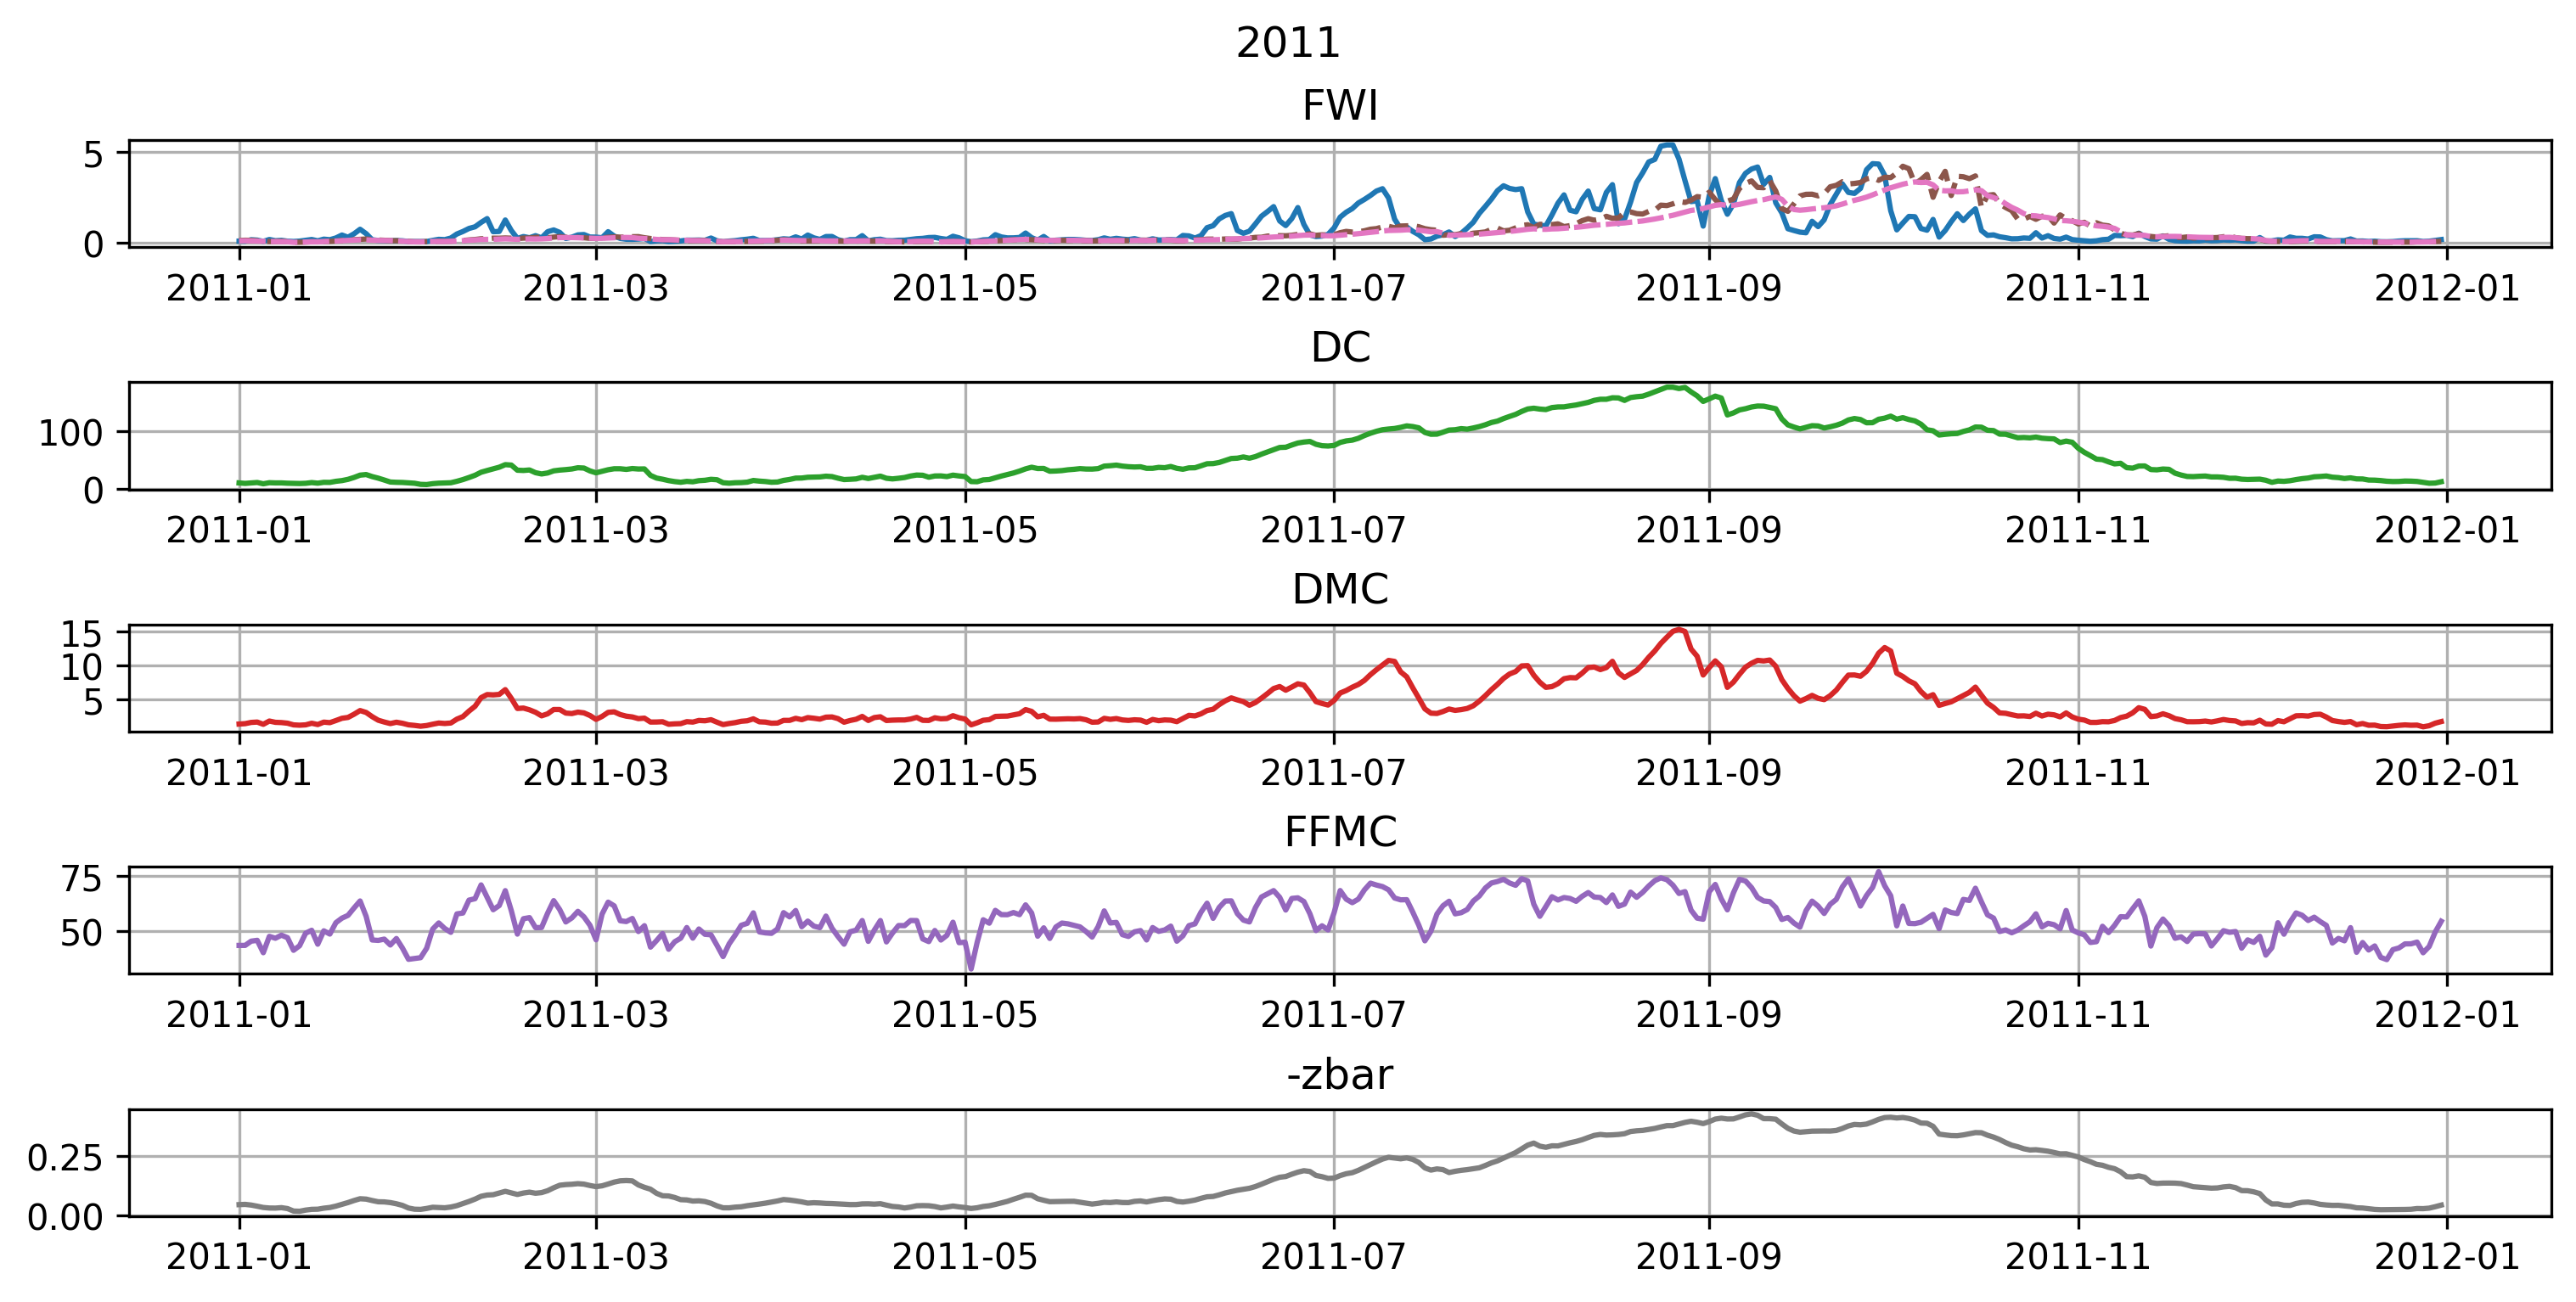

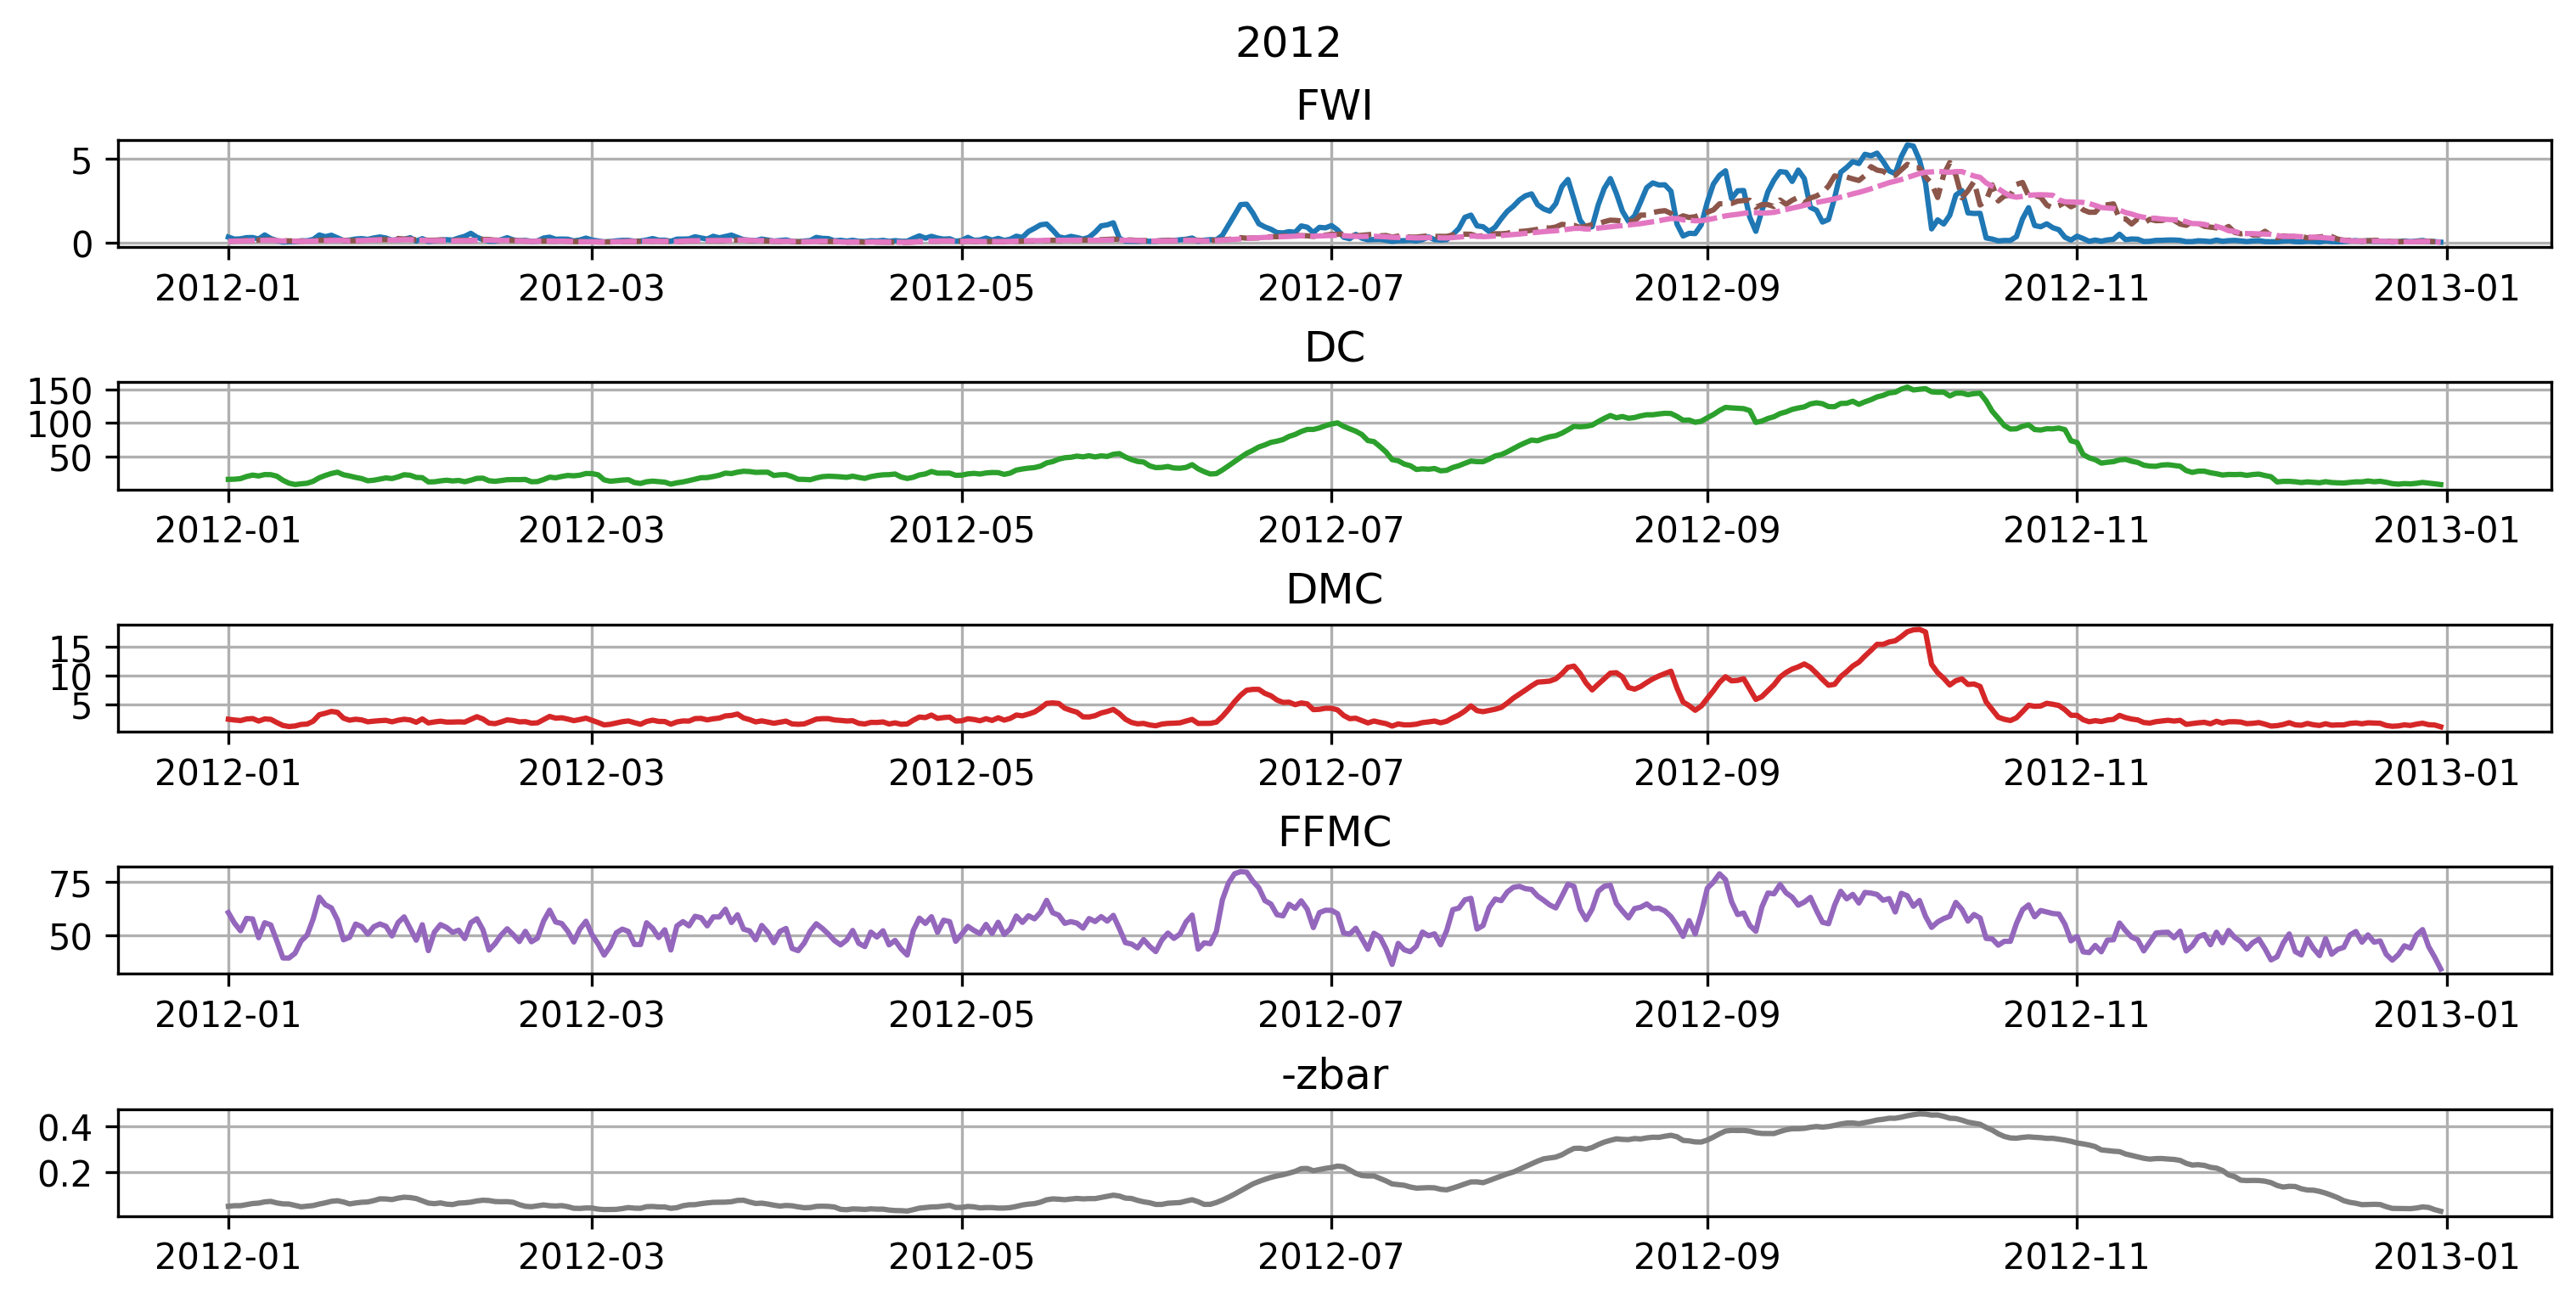

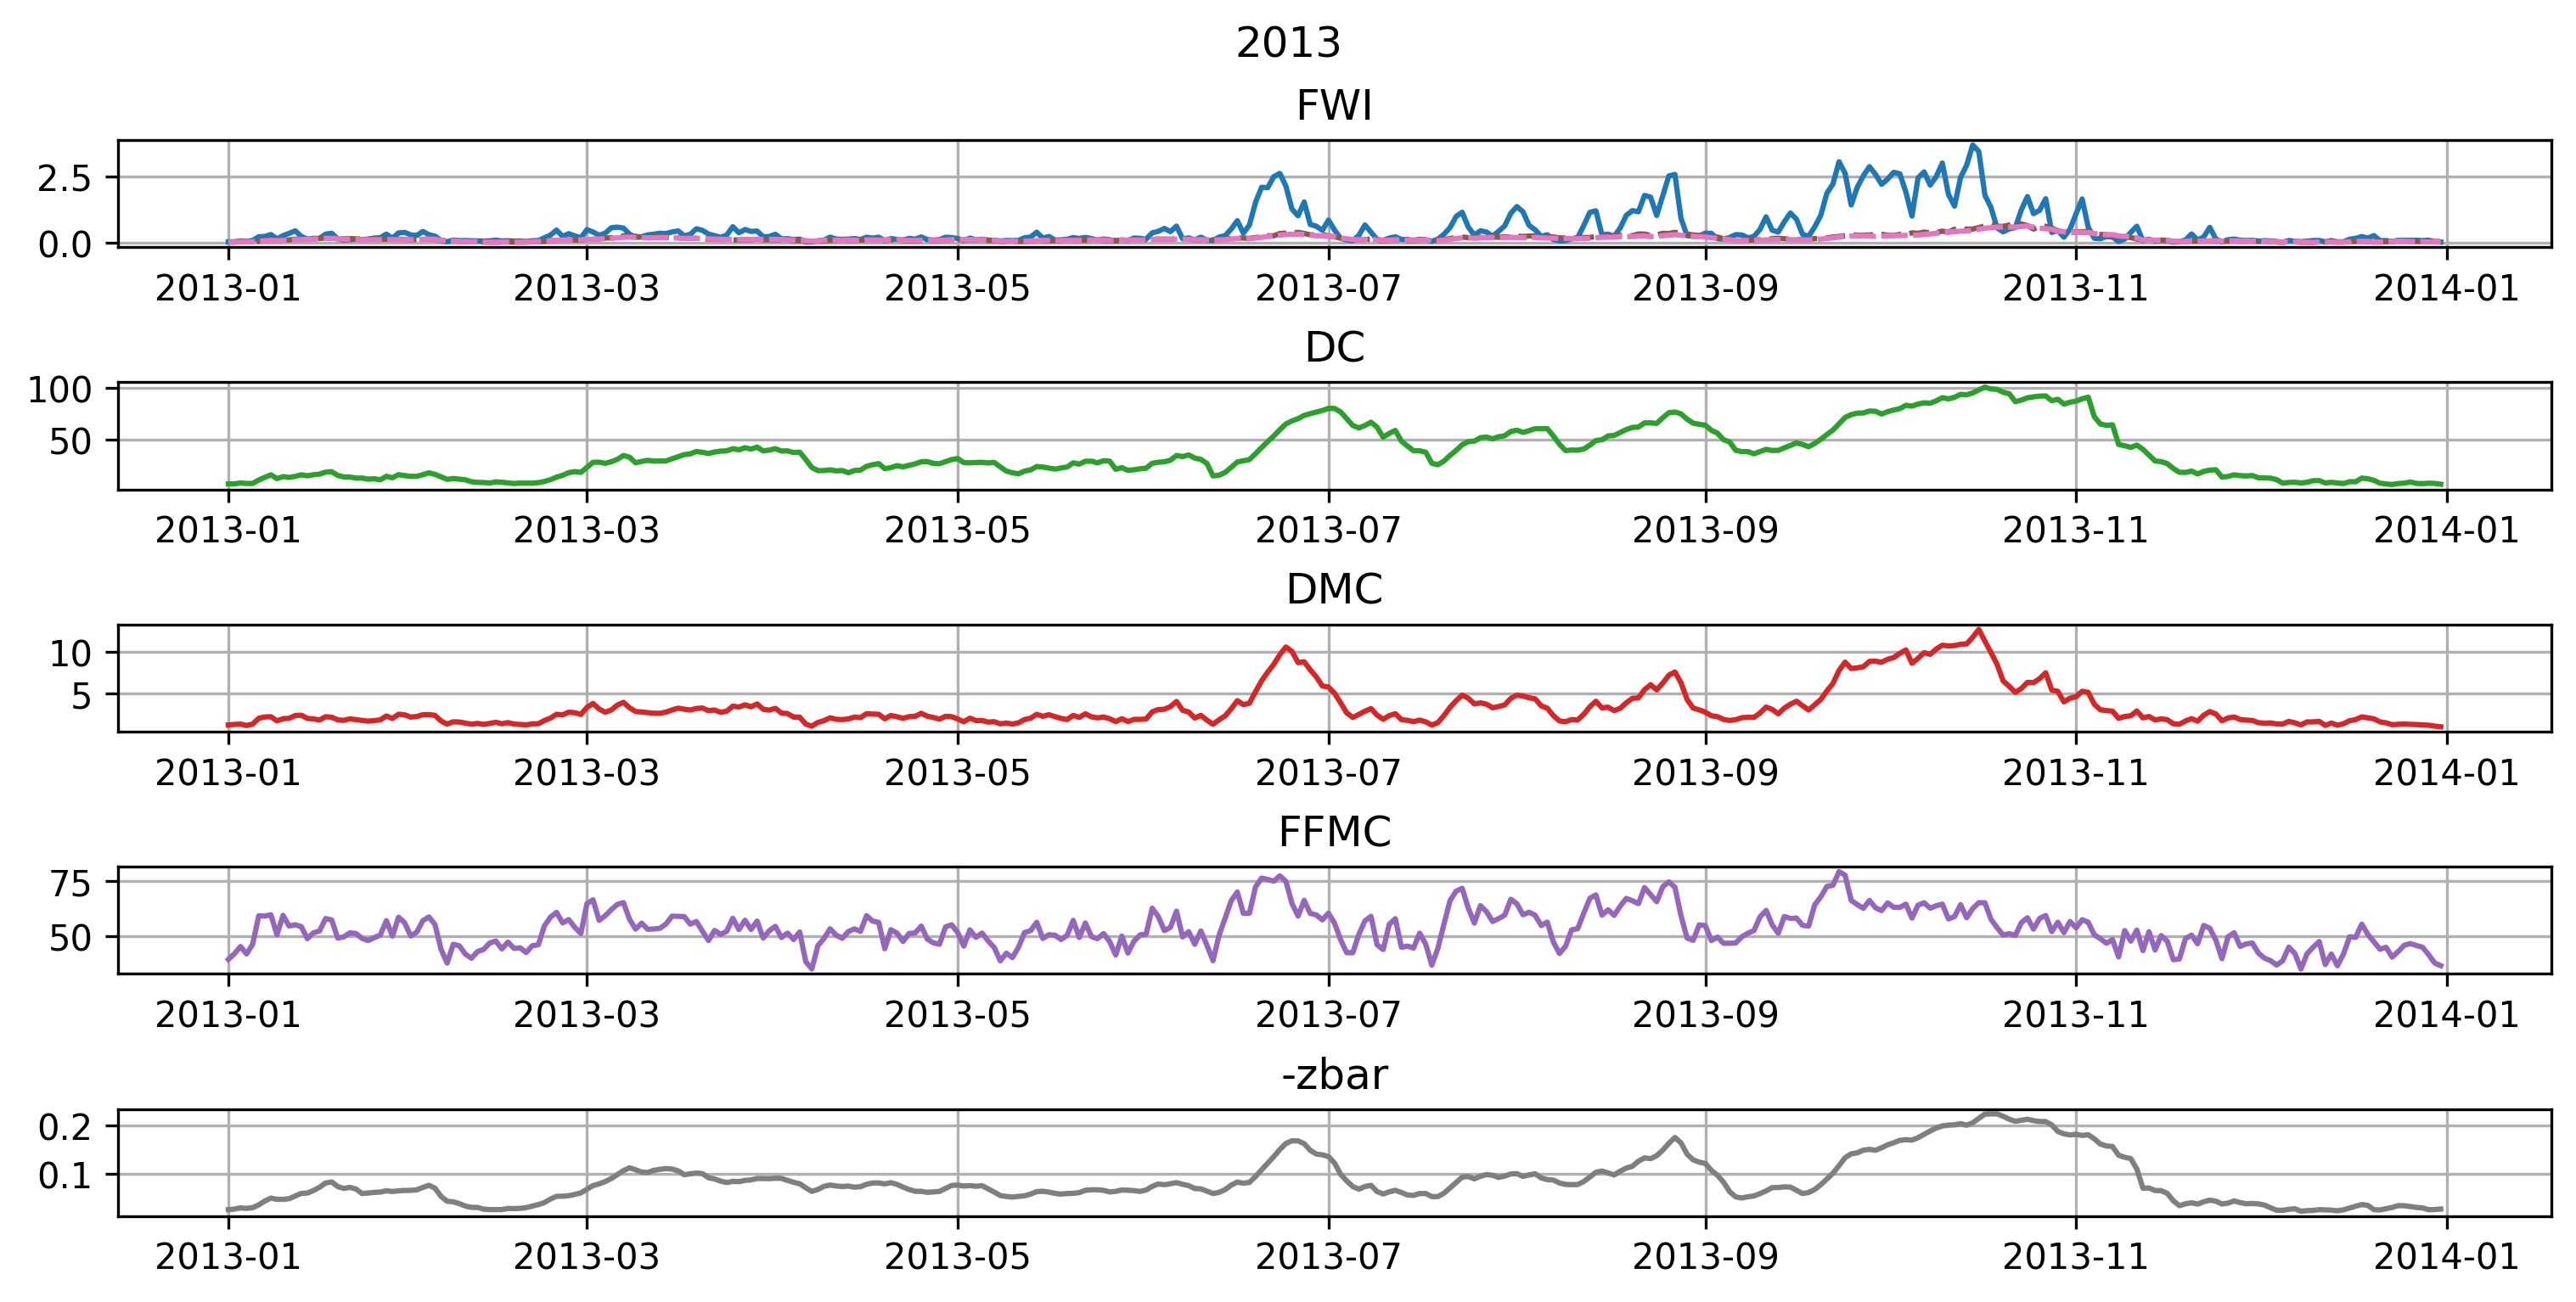

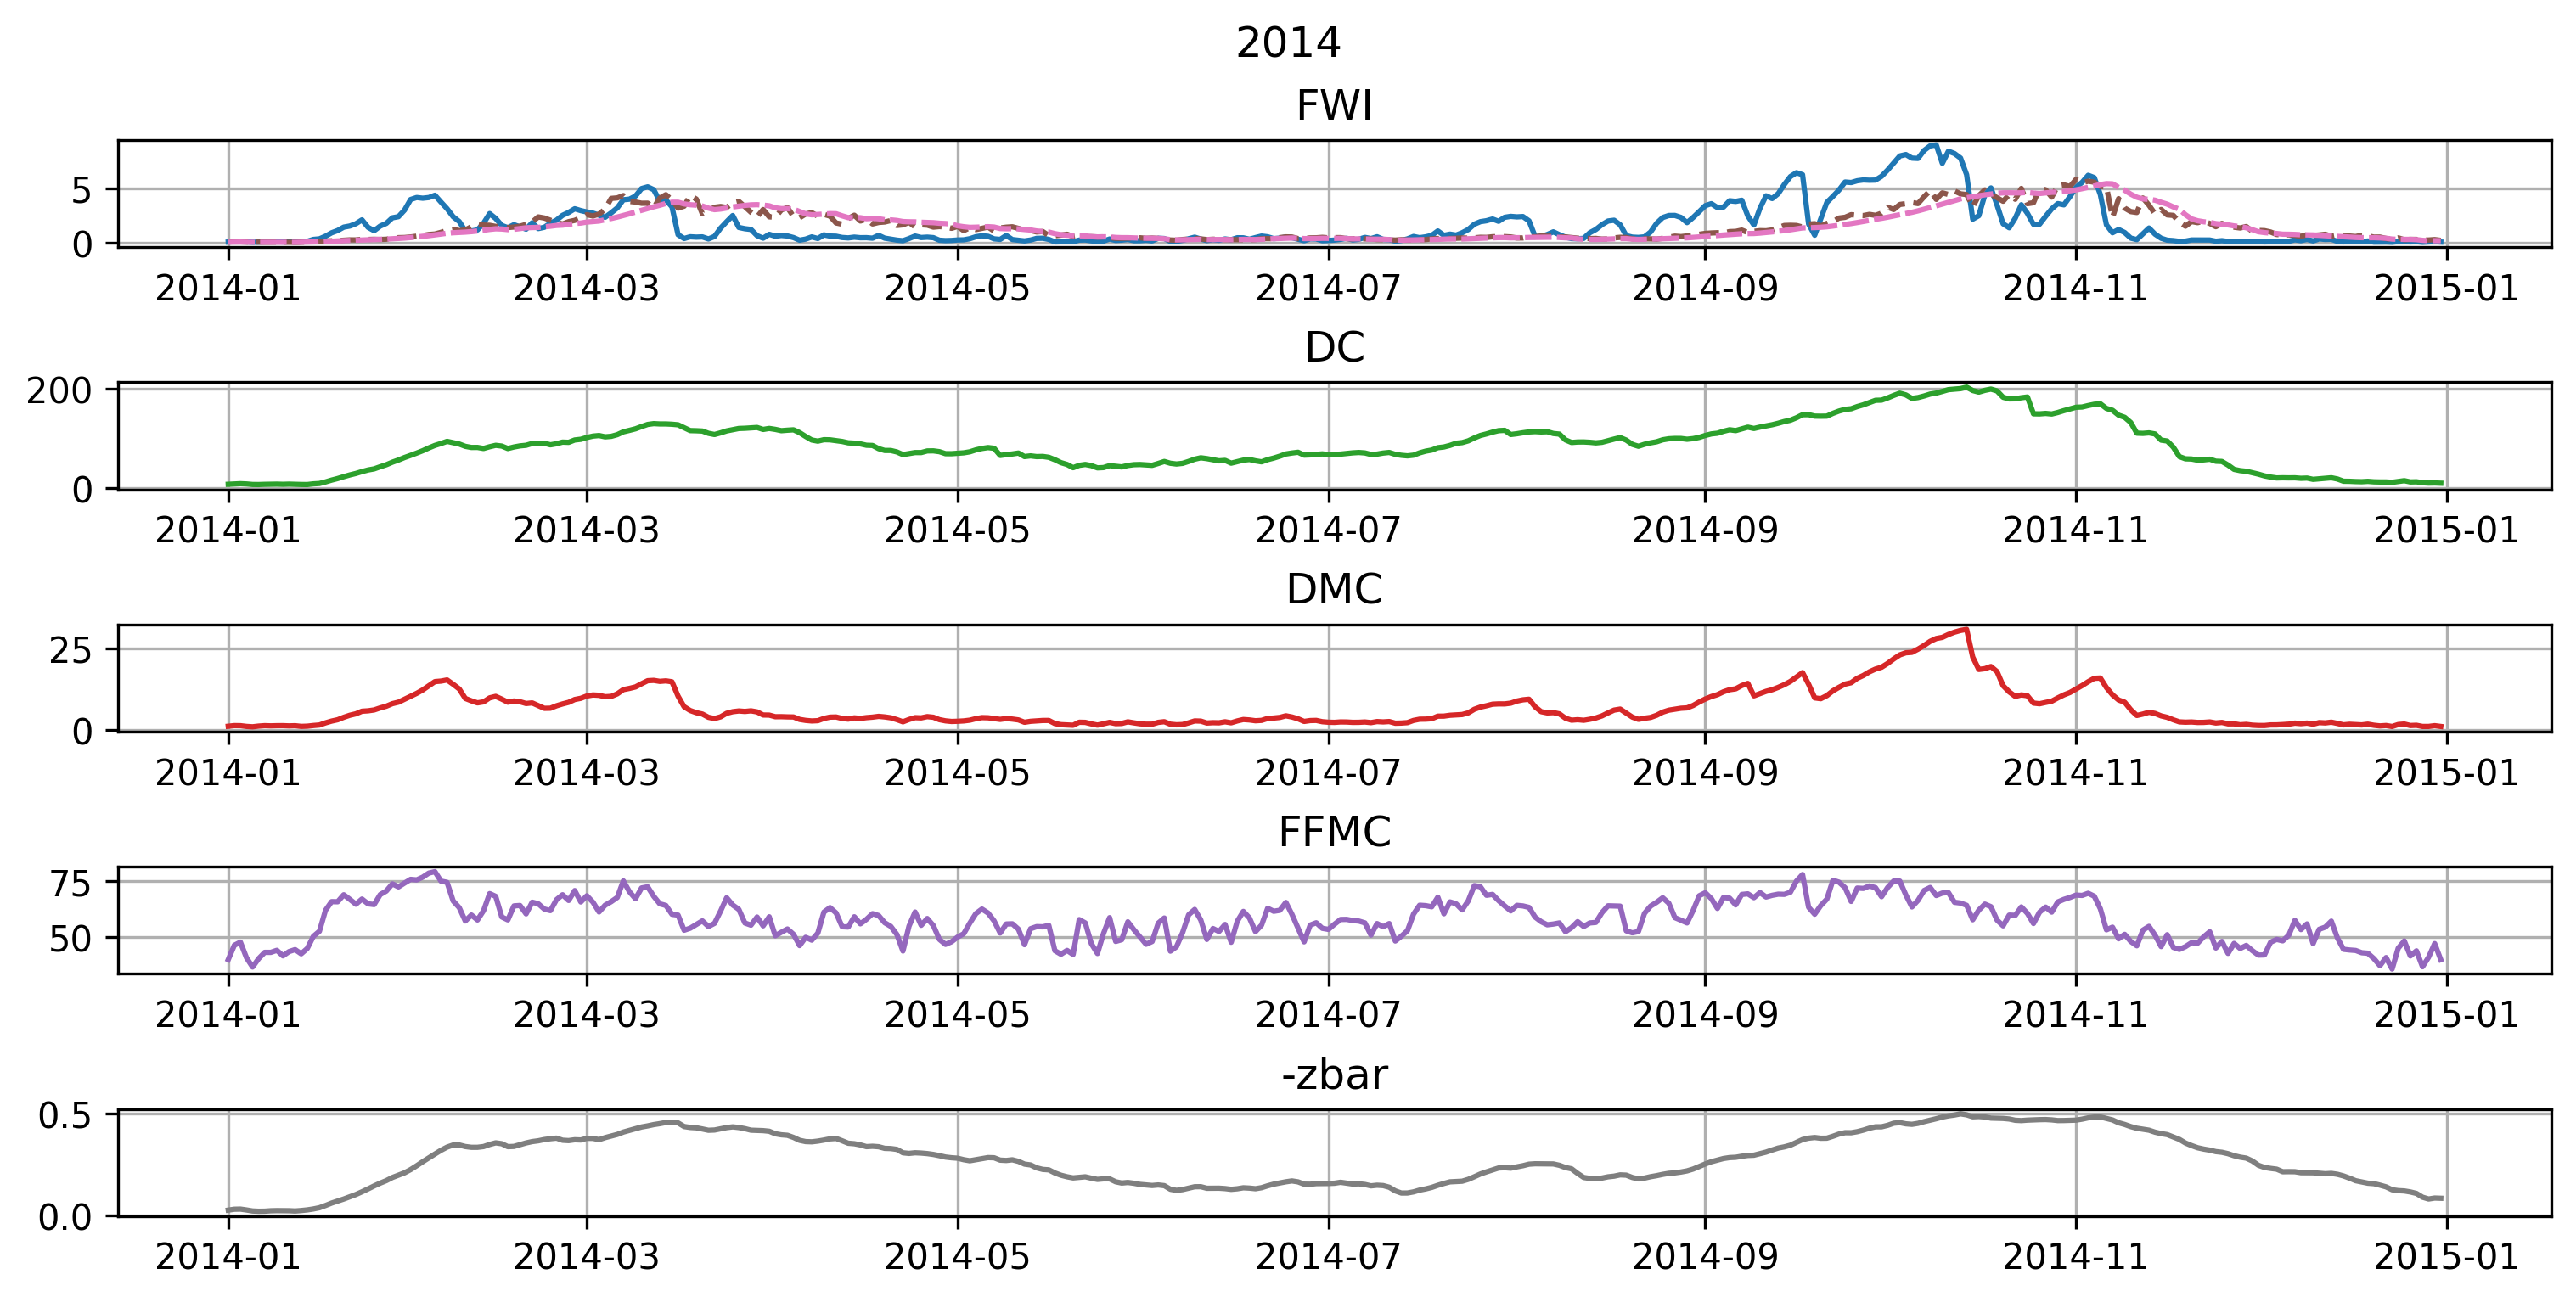

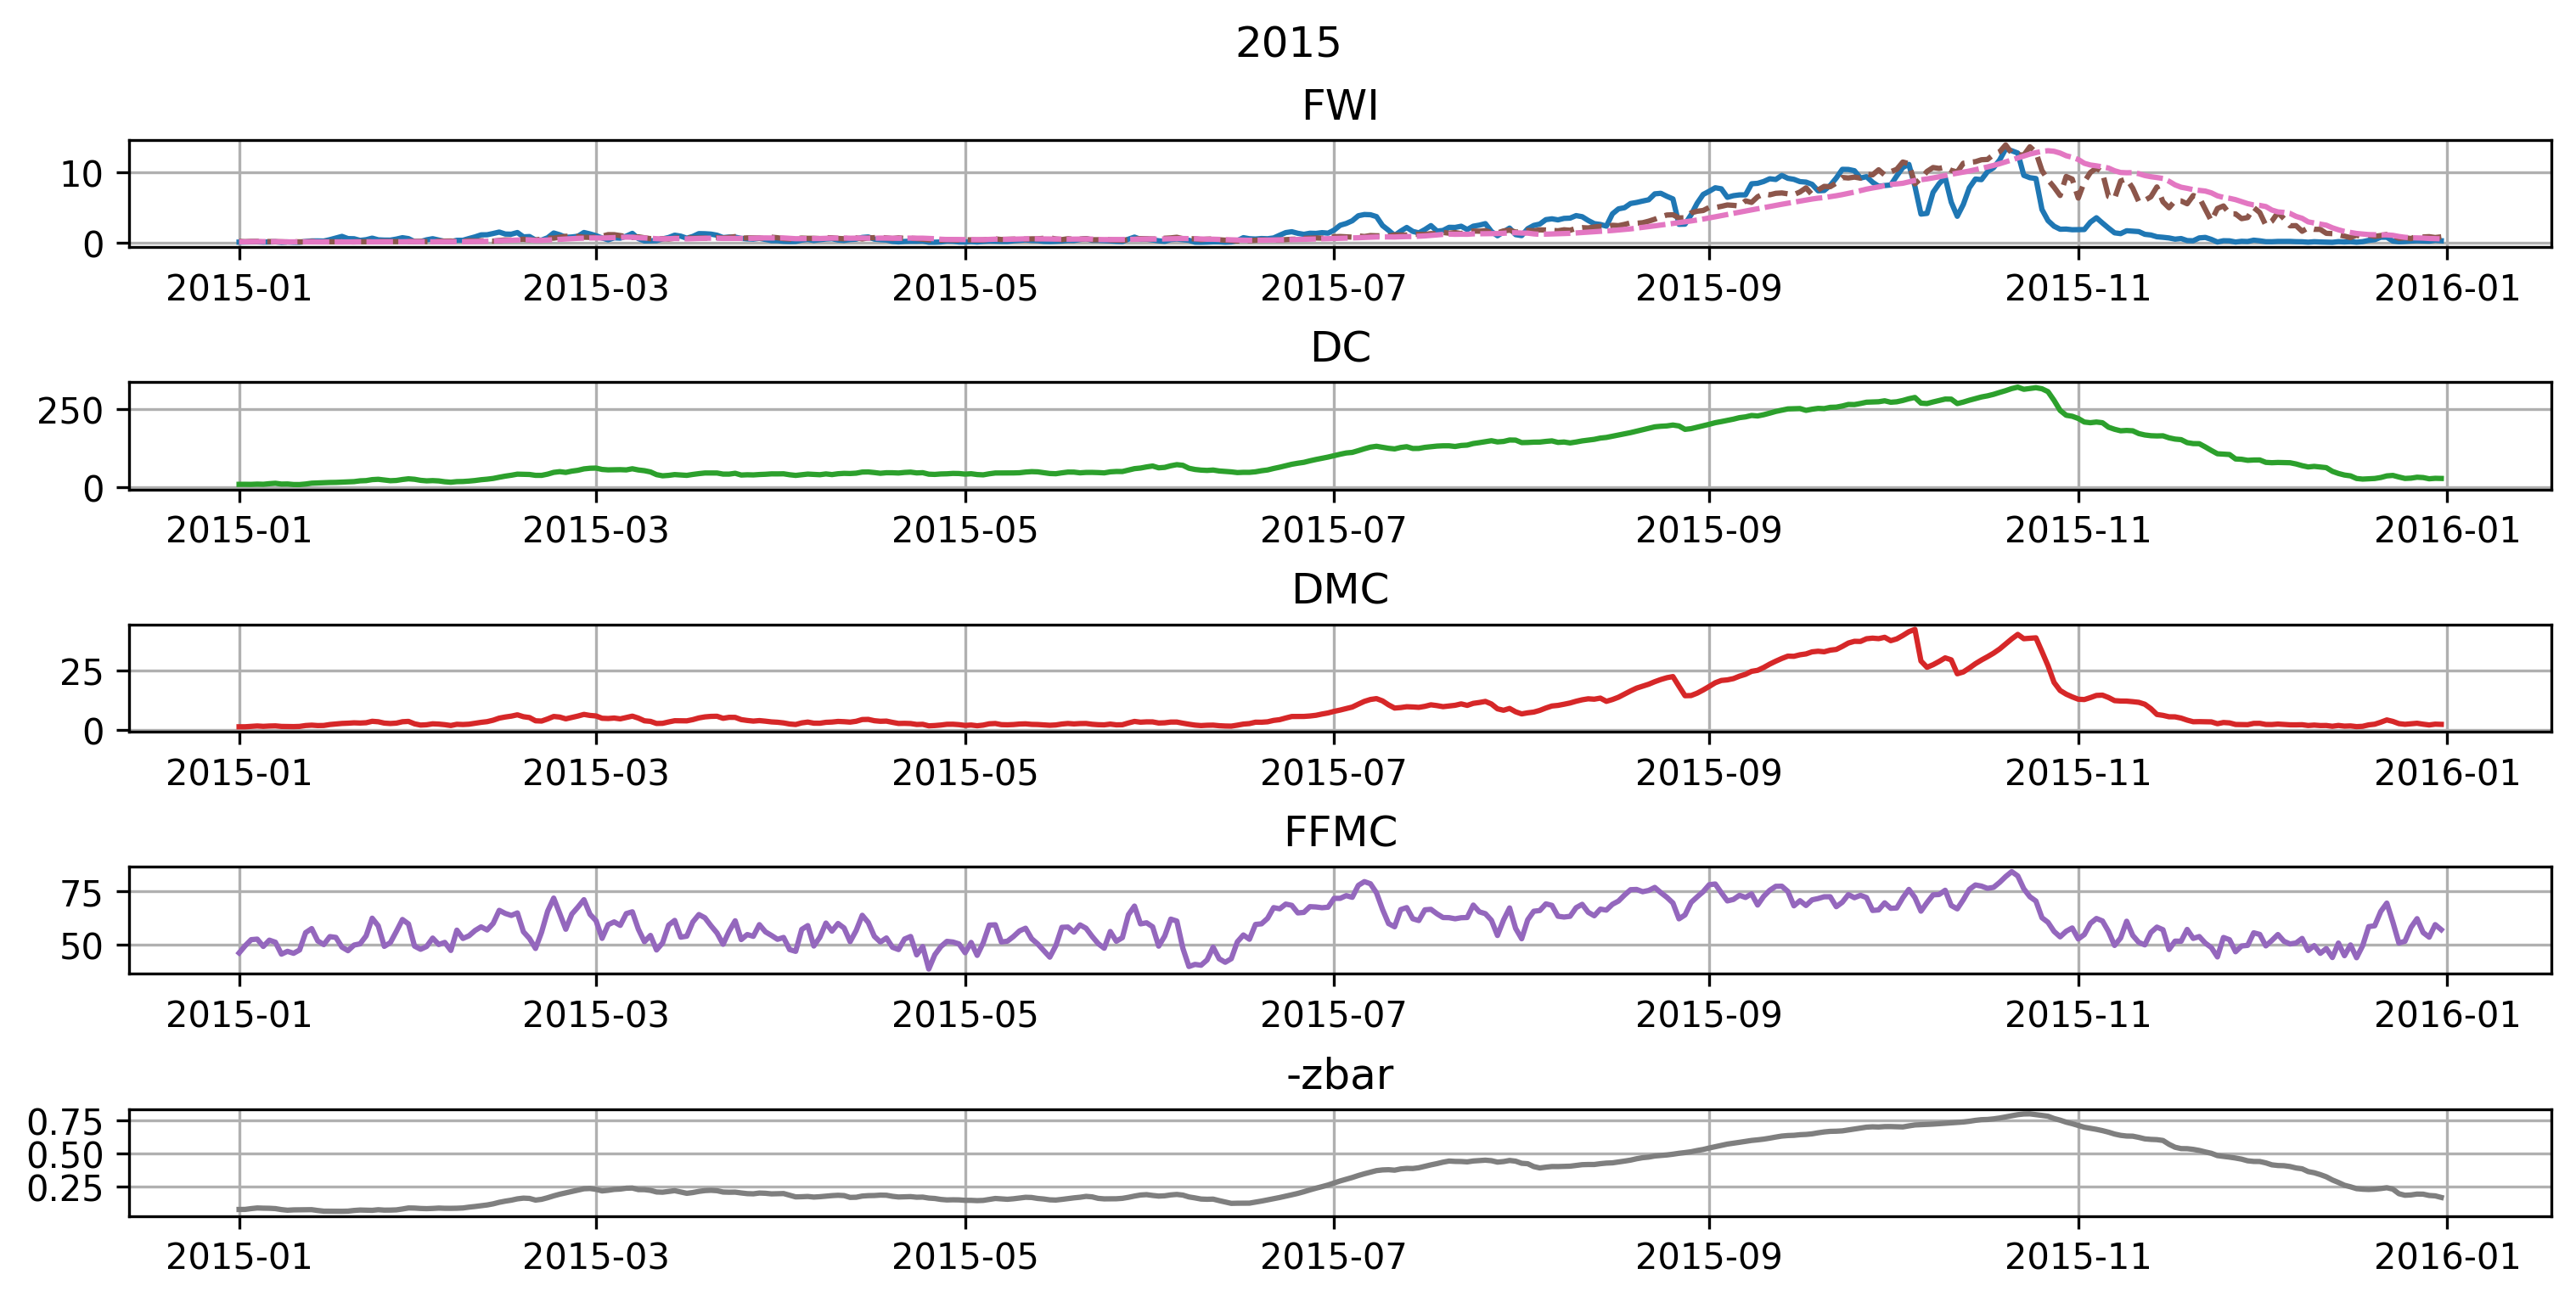

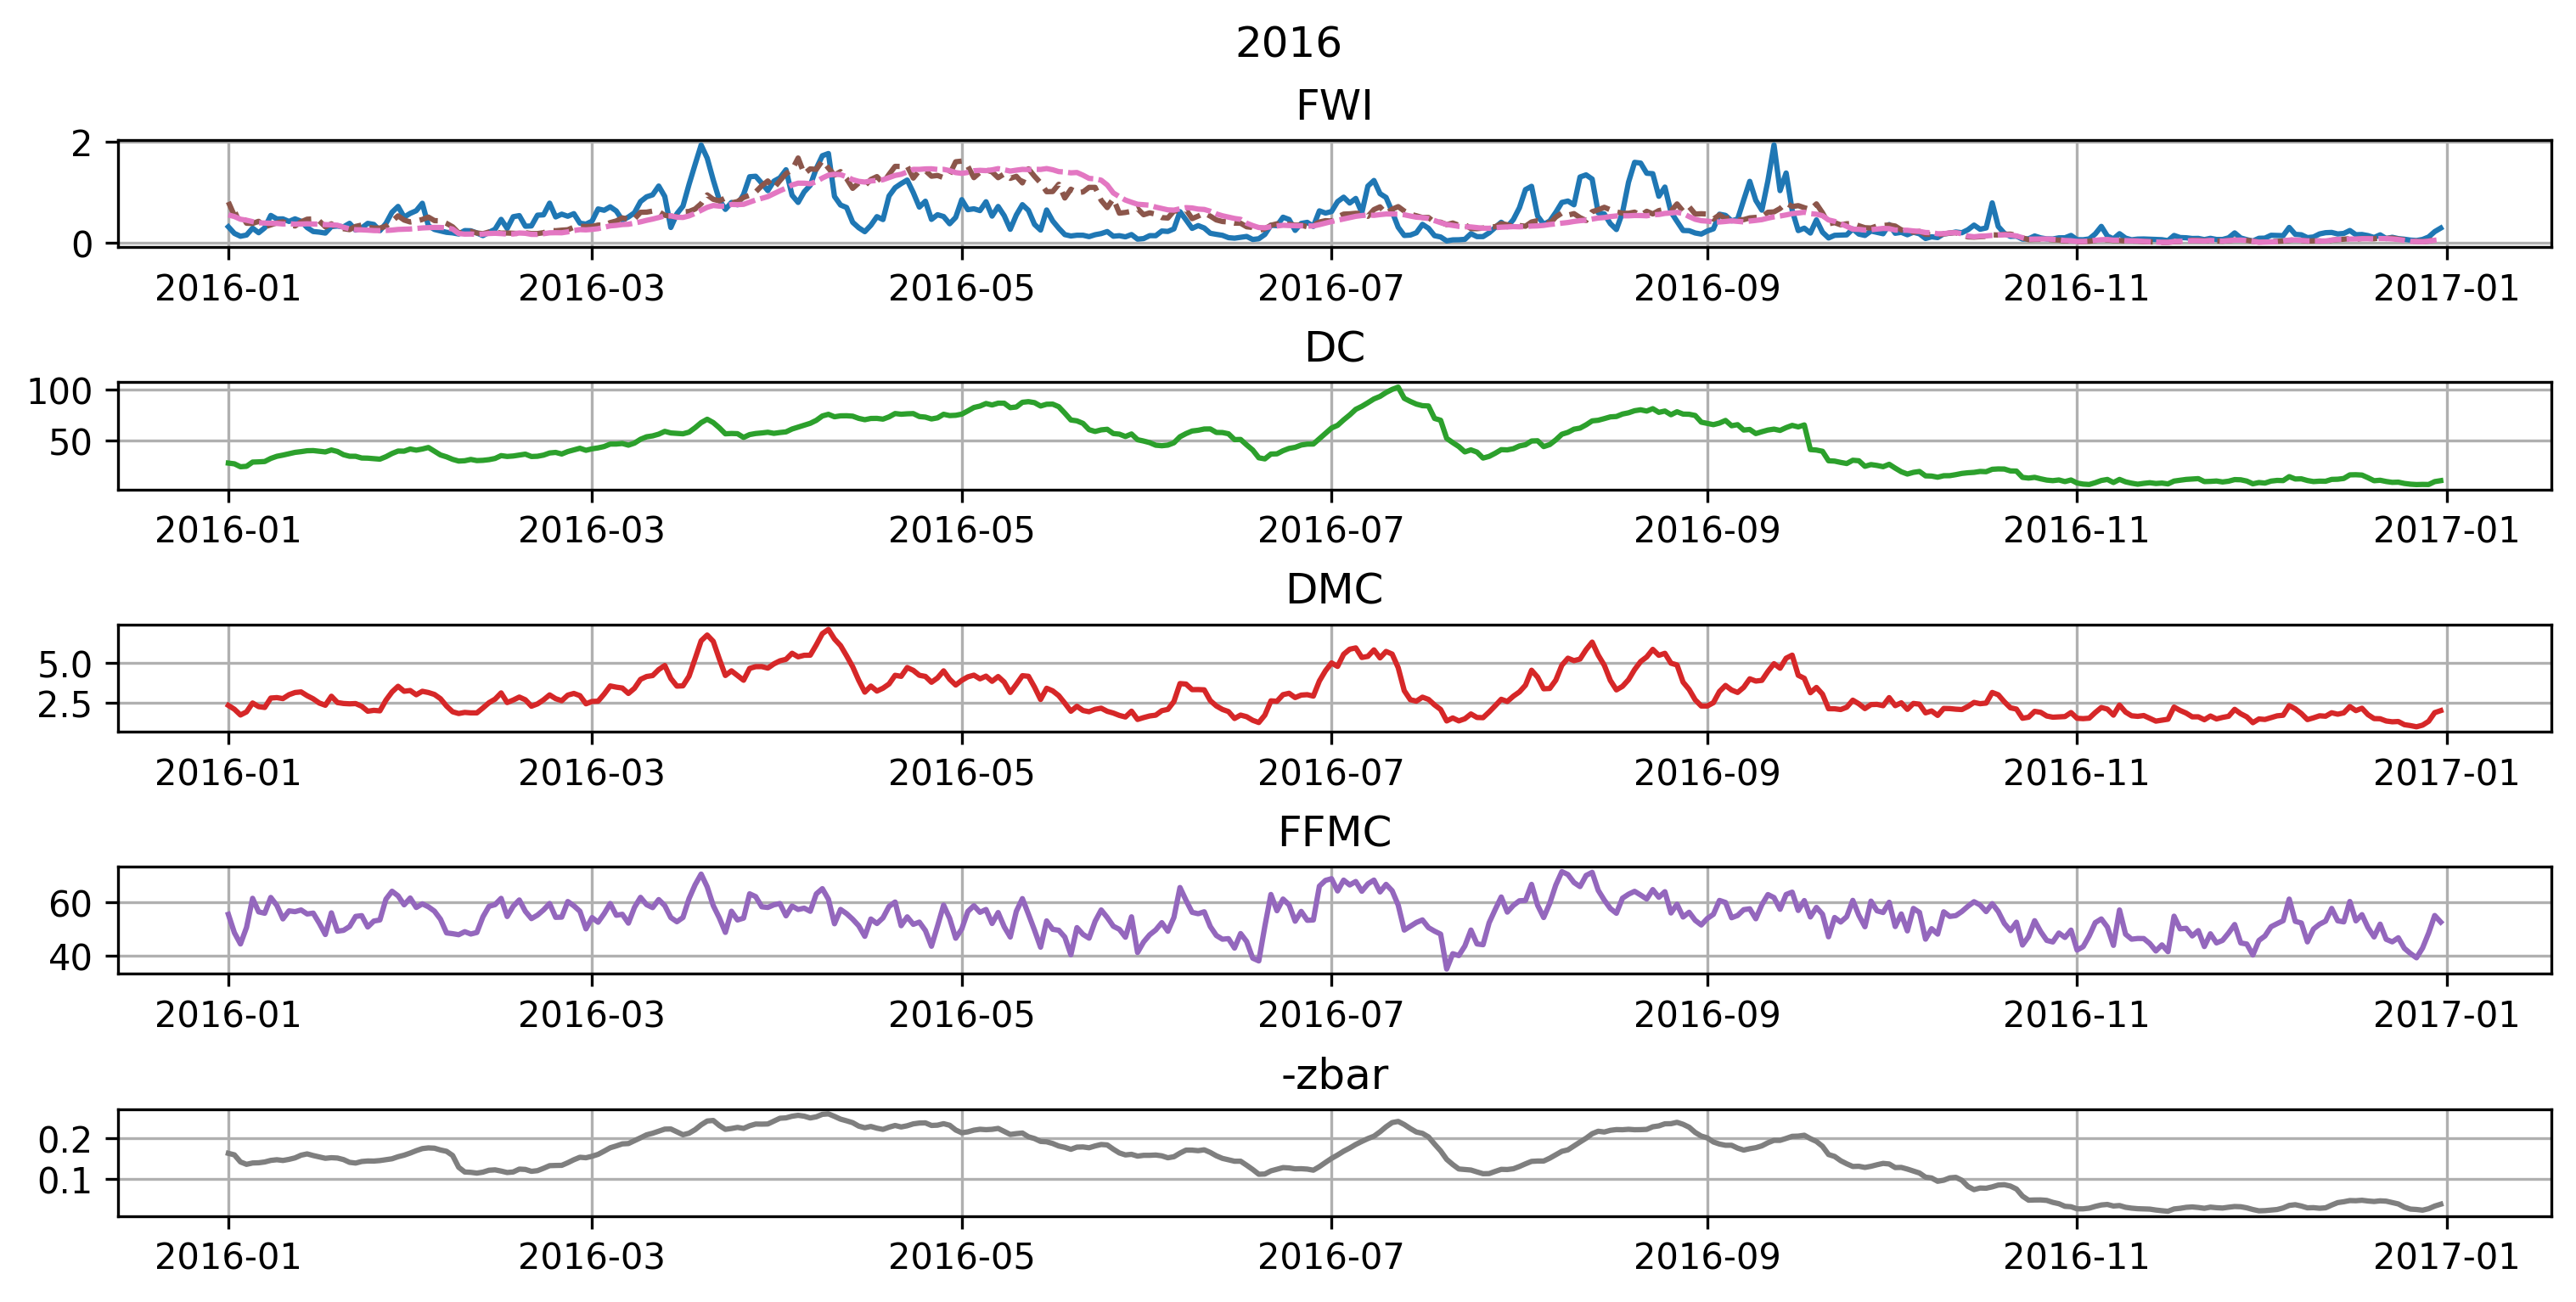

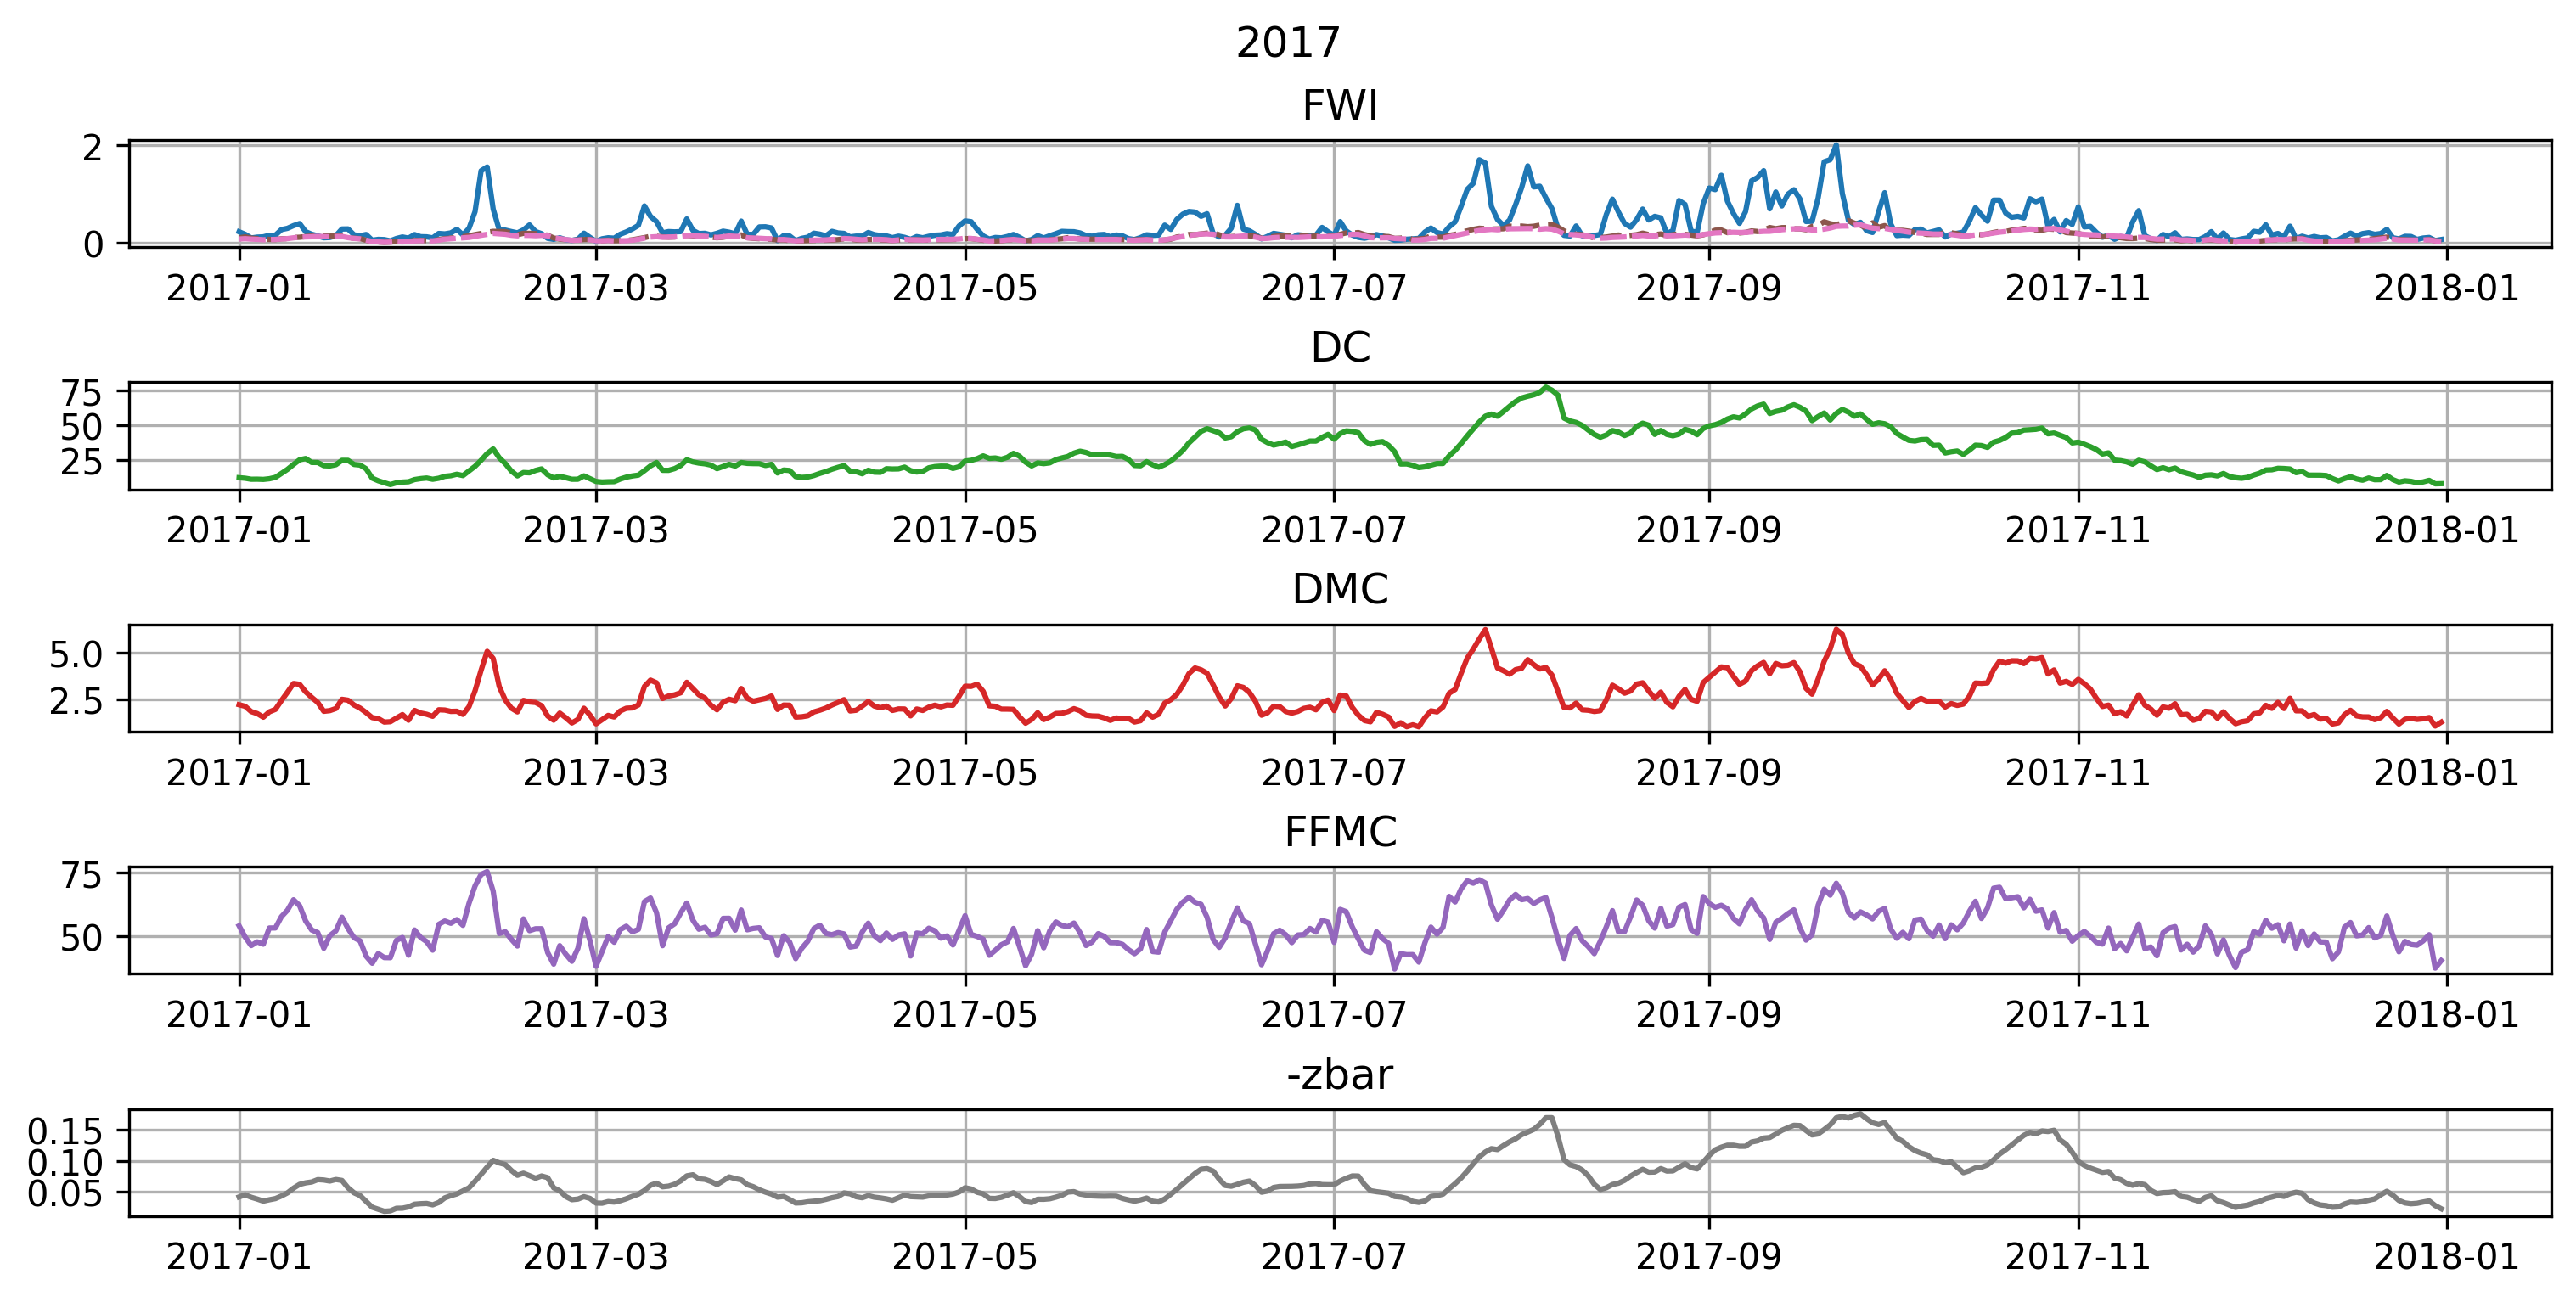

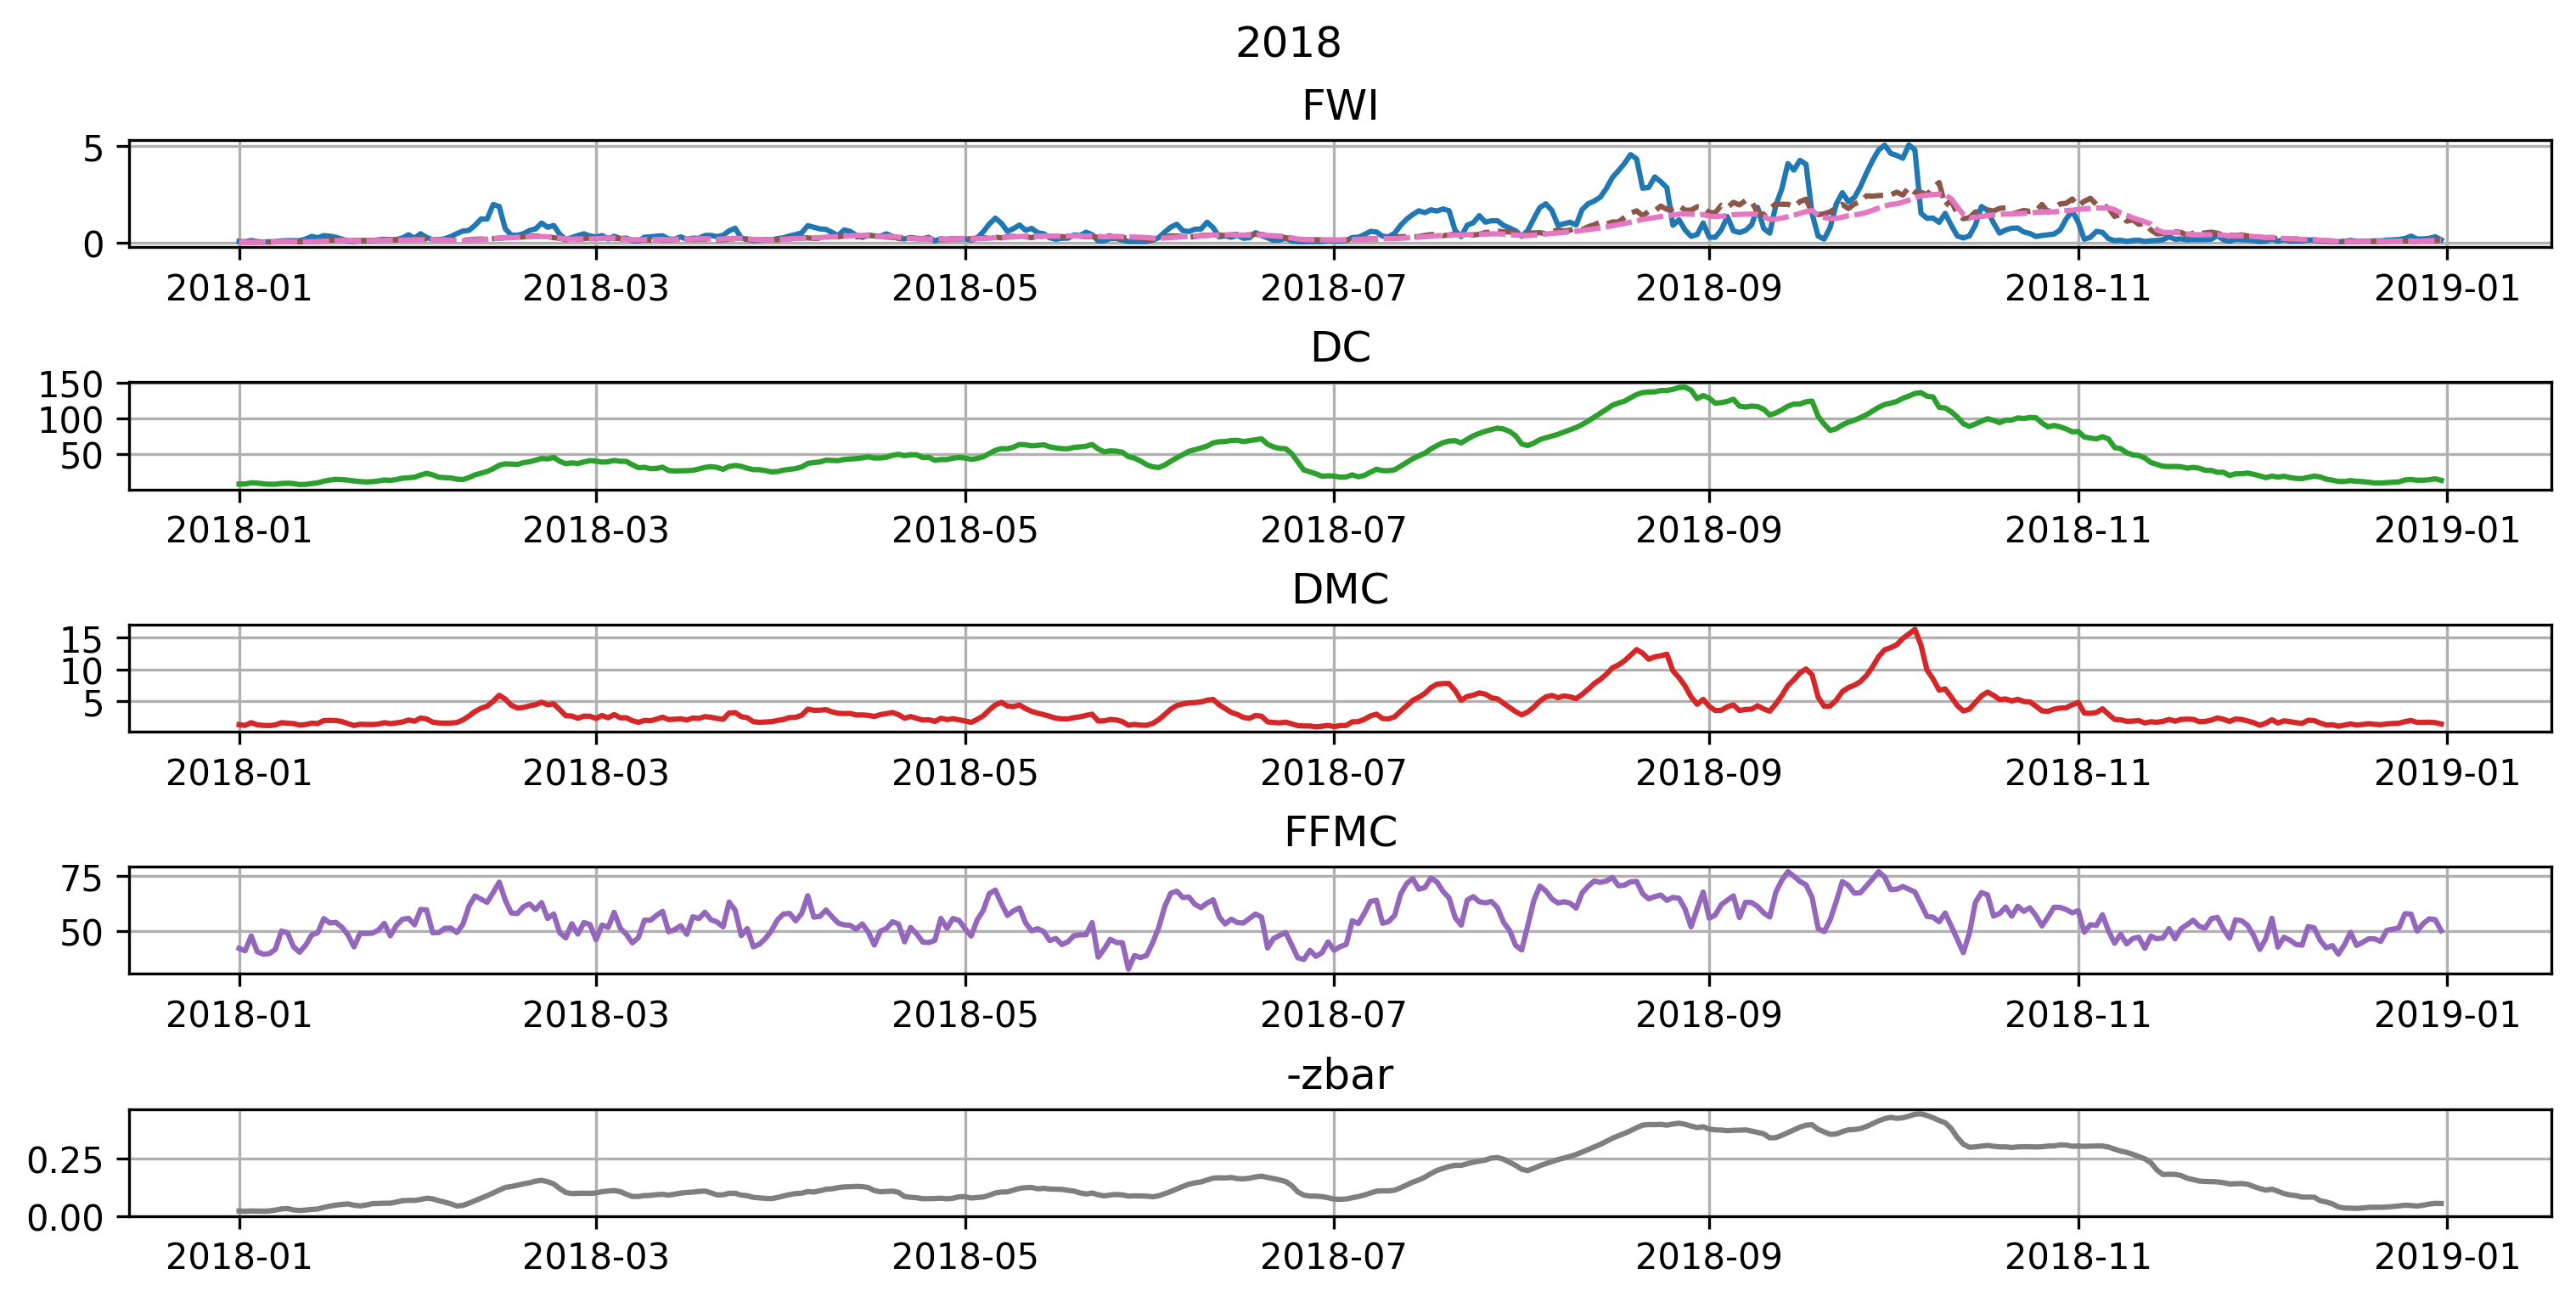

In [5]:
for year in np.unique(times.year):
    time_inds = np.where(times.year == year)[0]

    fig = plt.figure(layout='constrained', figsize=(10,5), dpi=300)
    ax = fig.subplot_mosaic(
        """
        A
        B
        C
        D
        E
        """
    )
    
    ax['A'].plot(times[time_inds],np.nanmean(FWI_M2_nat[time_inds,:, :], axis=(1,2)), c='tab:blue')
    ax['A'].plot(times[time_inds],np.nanmean(FWI_EXP3b_nat[time_inds,:, :], axis=(1,2)), c='tab:brown', ls='--')
    ax['A'].plot(times[time_inds],np.nanmean(FWI_EXP4_nat[time_inds,:, :], axis=(1,2)), c='tab:pink', ls=(0, (5, 1)))
    ax['B'].plot(times[time_inds],np.nanmean(DC_M2_nat[time_inds,:, :], axis=(1,2)), c='tab:green')
    ax['C'].plot(times[time_inds],np.nanmean(DMC_M2_nat[time_inds,:, :], axis=(1,2)), c='tab:red')
    ax['D'].plot(times[time_inds],np.nanmean(FFMC_M2_nat[time_inds,:, :], axis=(1,2)), c='tab:purple')
    ax['E'].plot(times[time_inds],np.nanmean(-zbar_nat[time_inds,:, :], axis=(1,2)), c='tab:gray')
    
    titles = {
        'A': 'FWI',
        'B': 'DC',
        'C': 'DMC',
        'D': 'FFMC',
        'E': '-zbar'
    }
    
    for label, axis in ax.items():
        axis.grid()
        axis.set_title(titles[label])
    fig.suptitle(year)

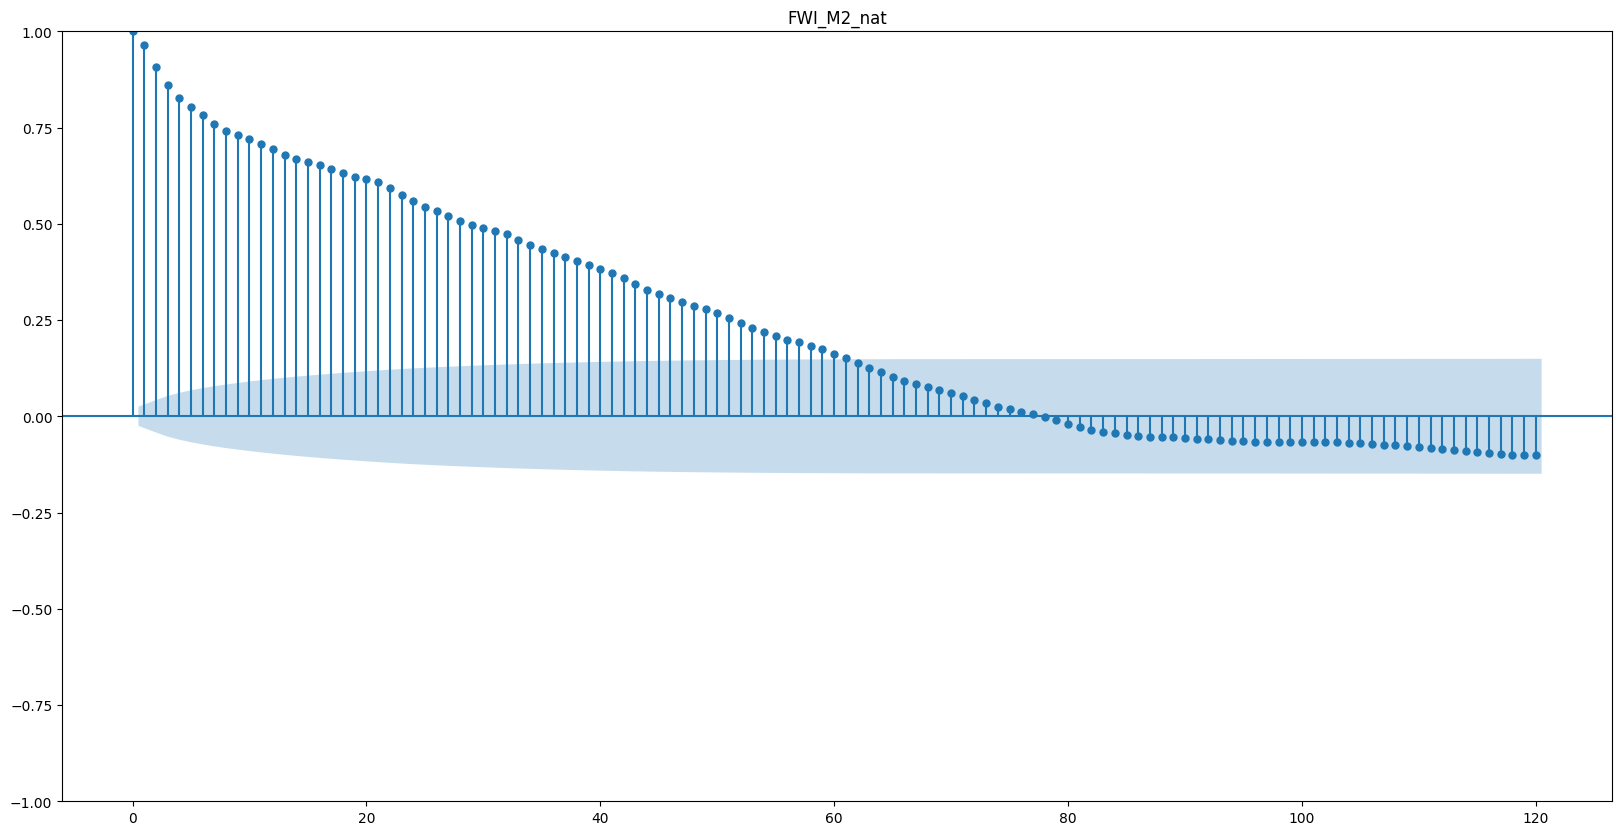

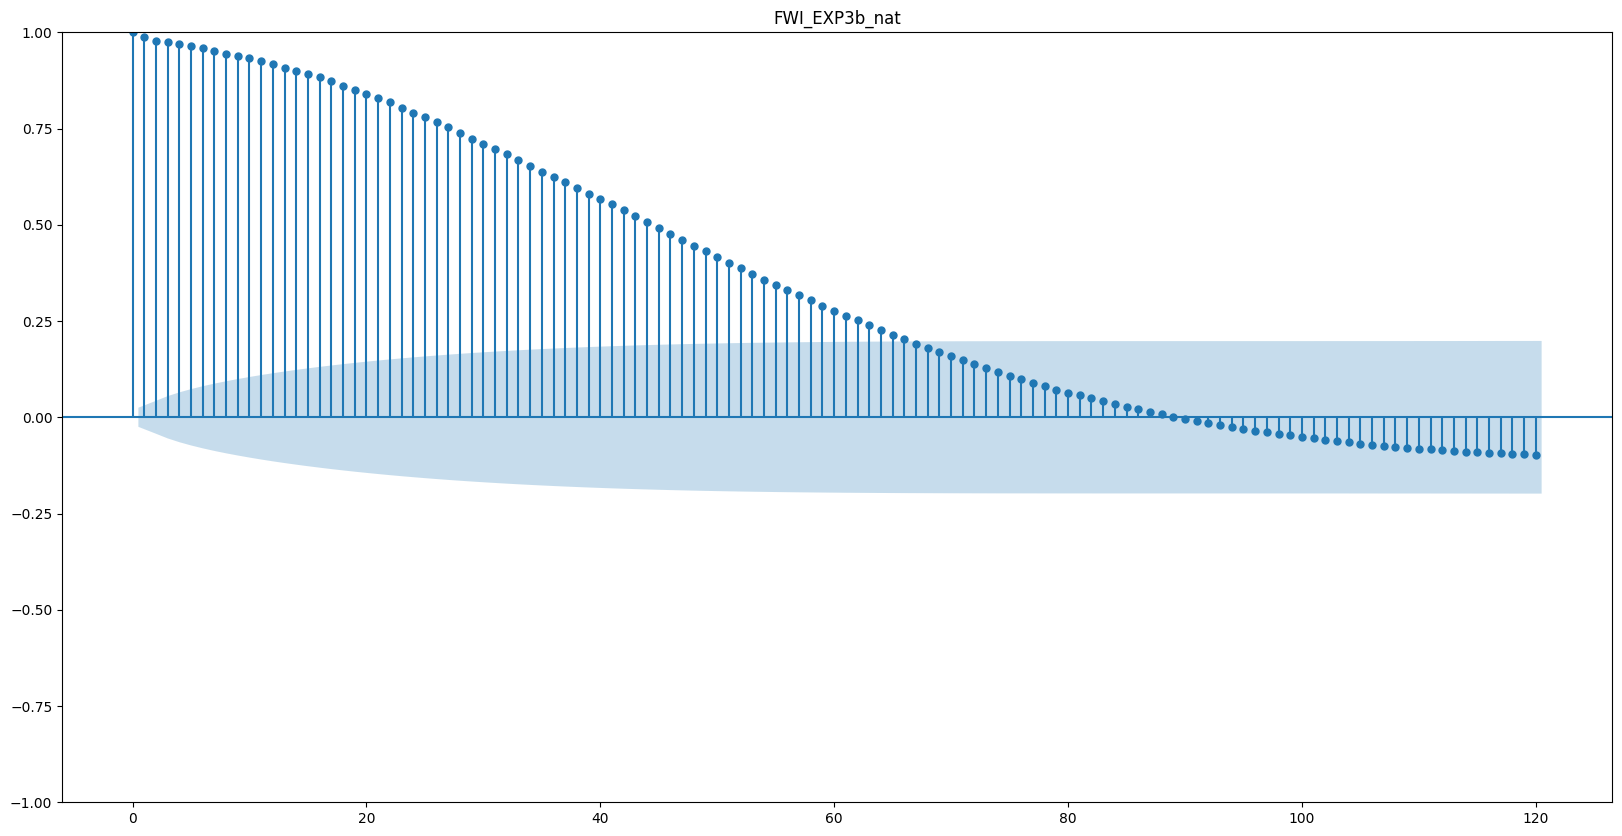

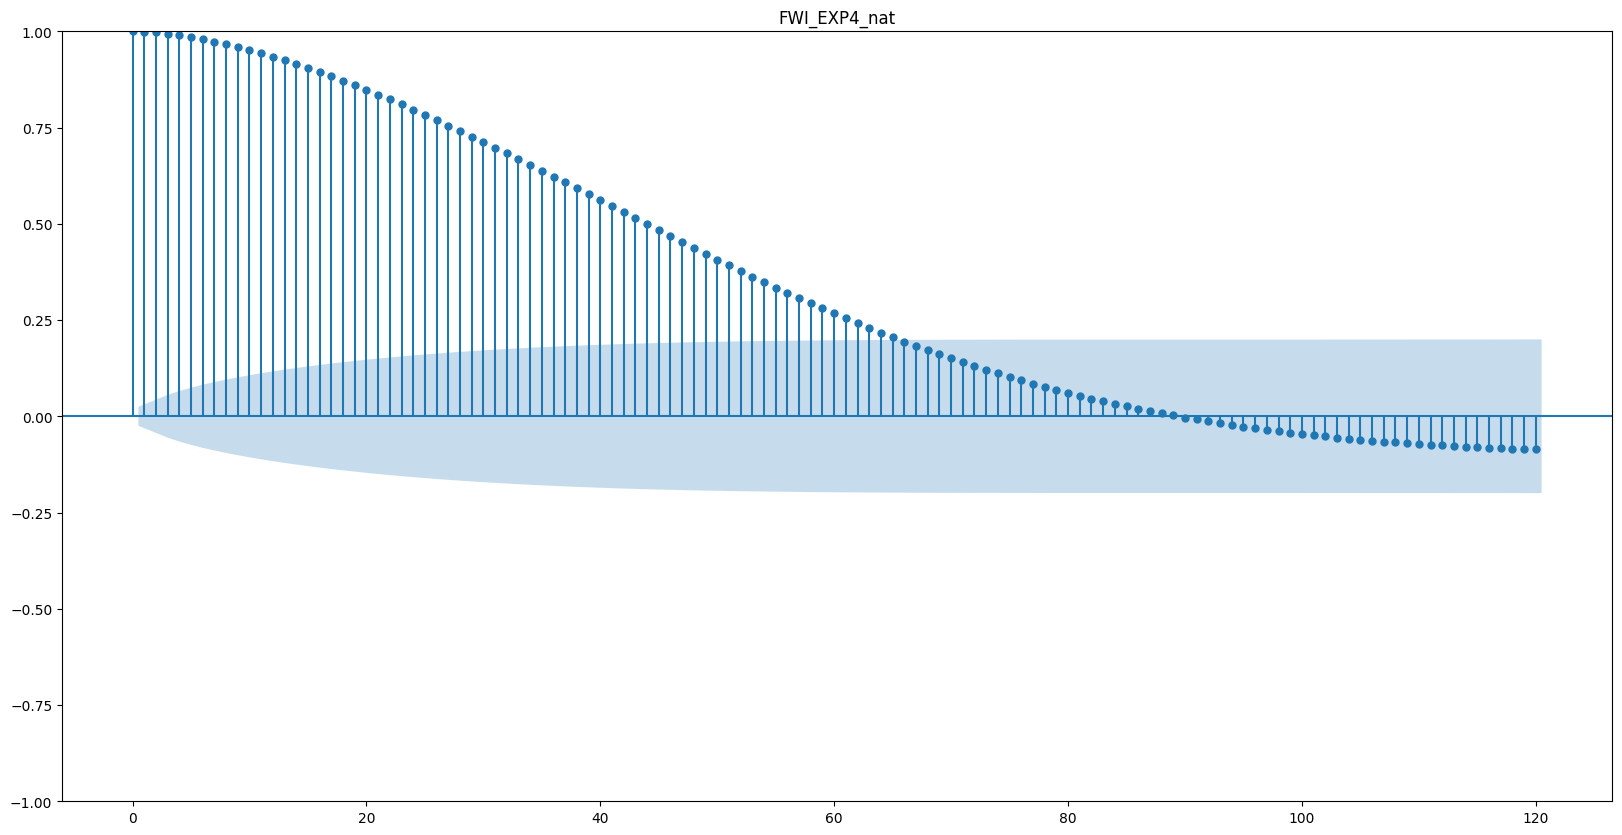

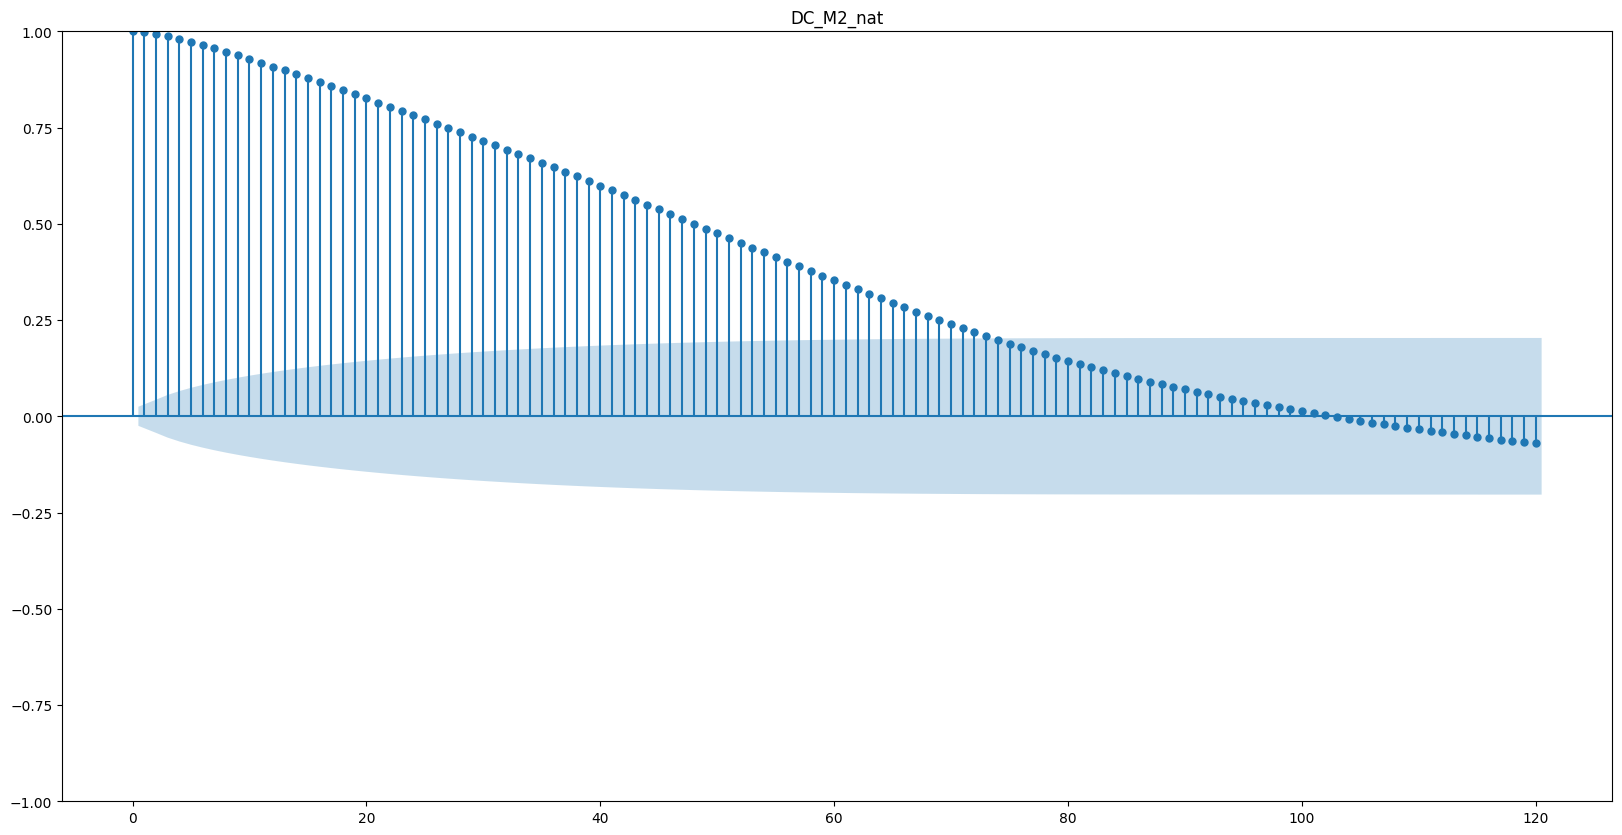

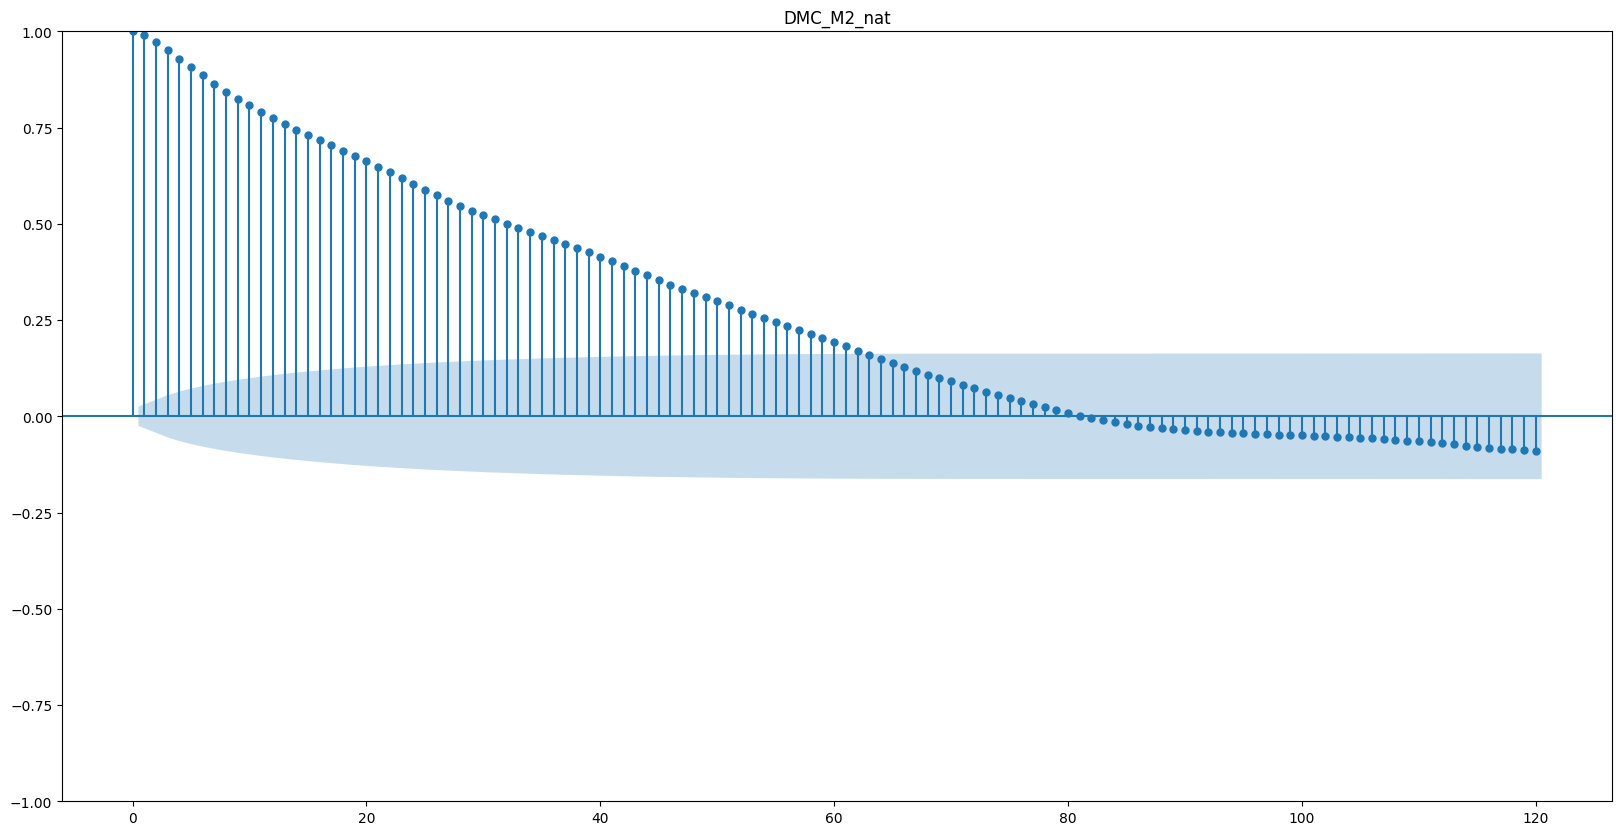

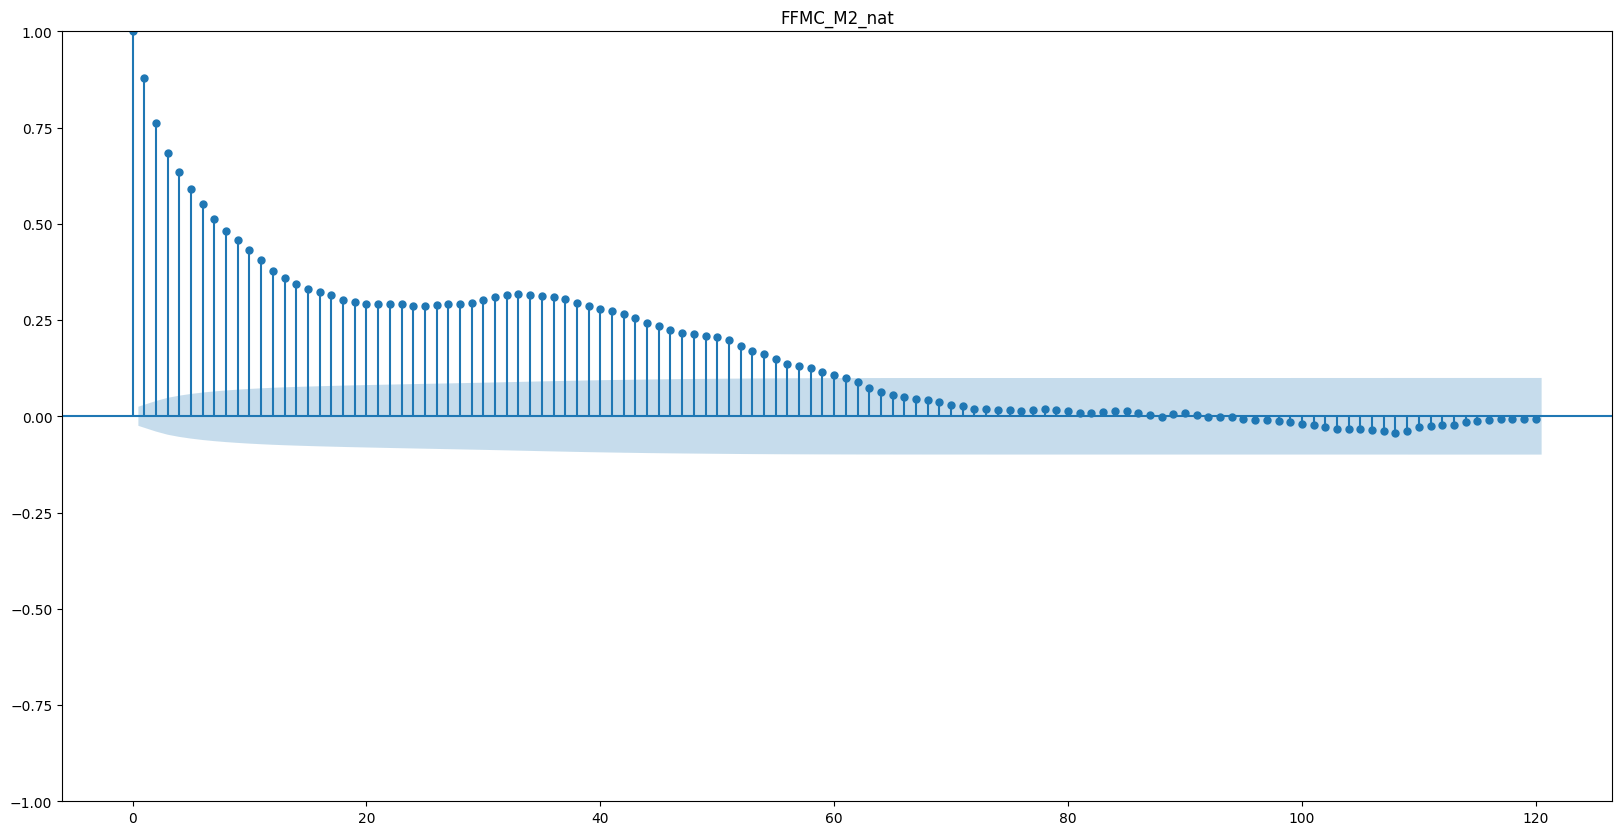

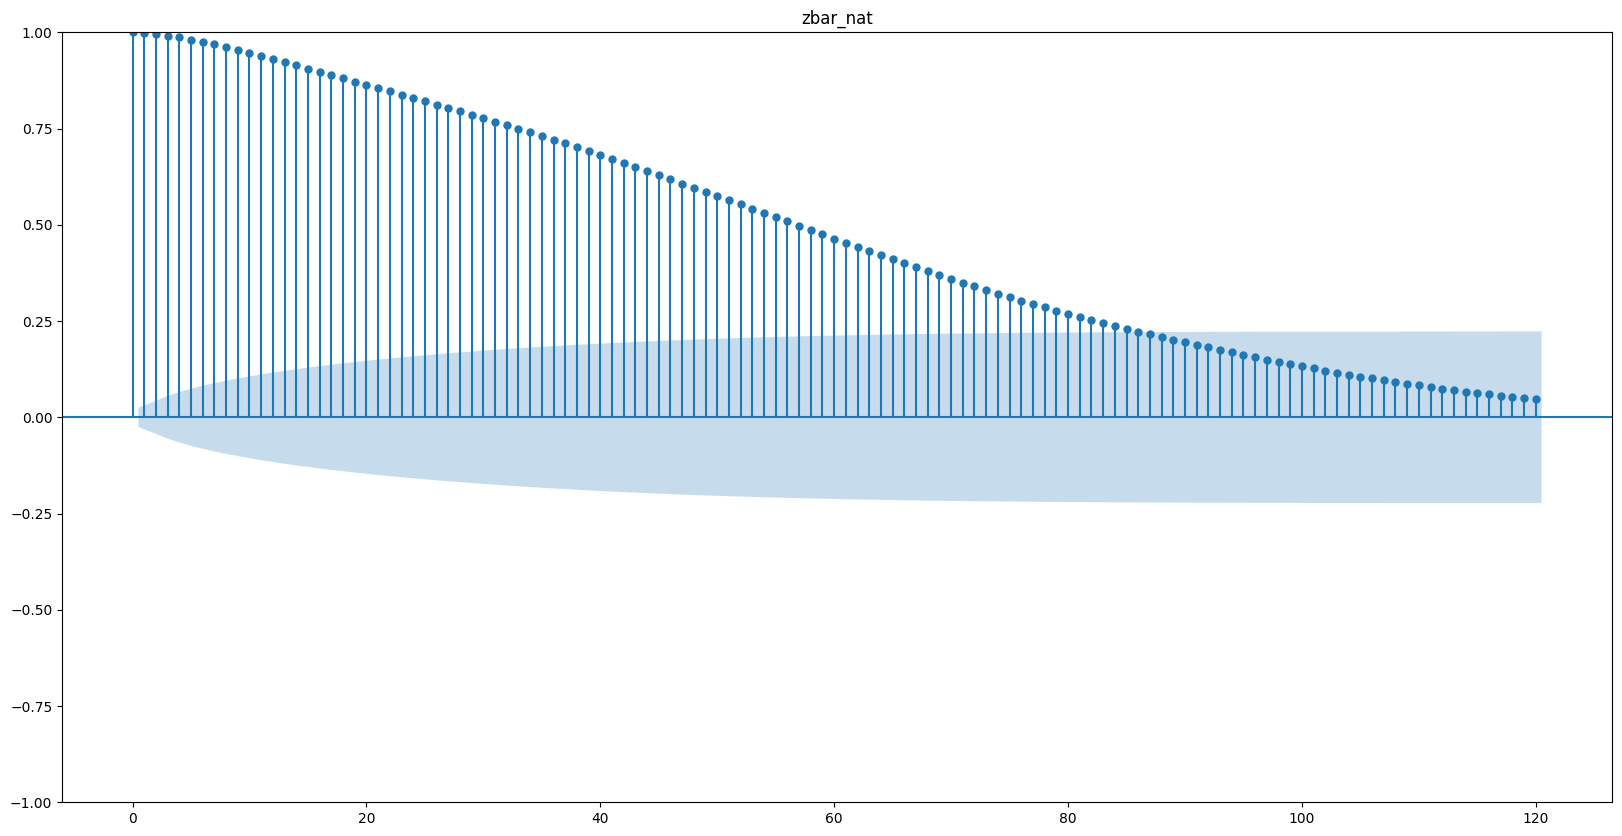

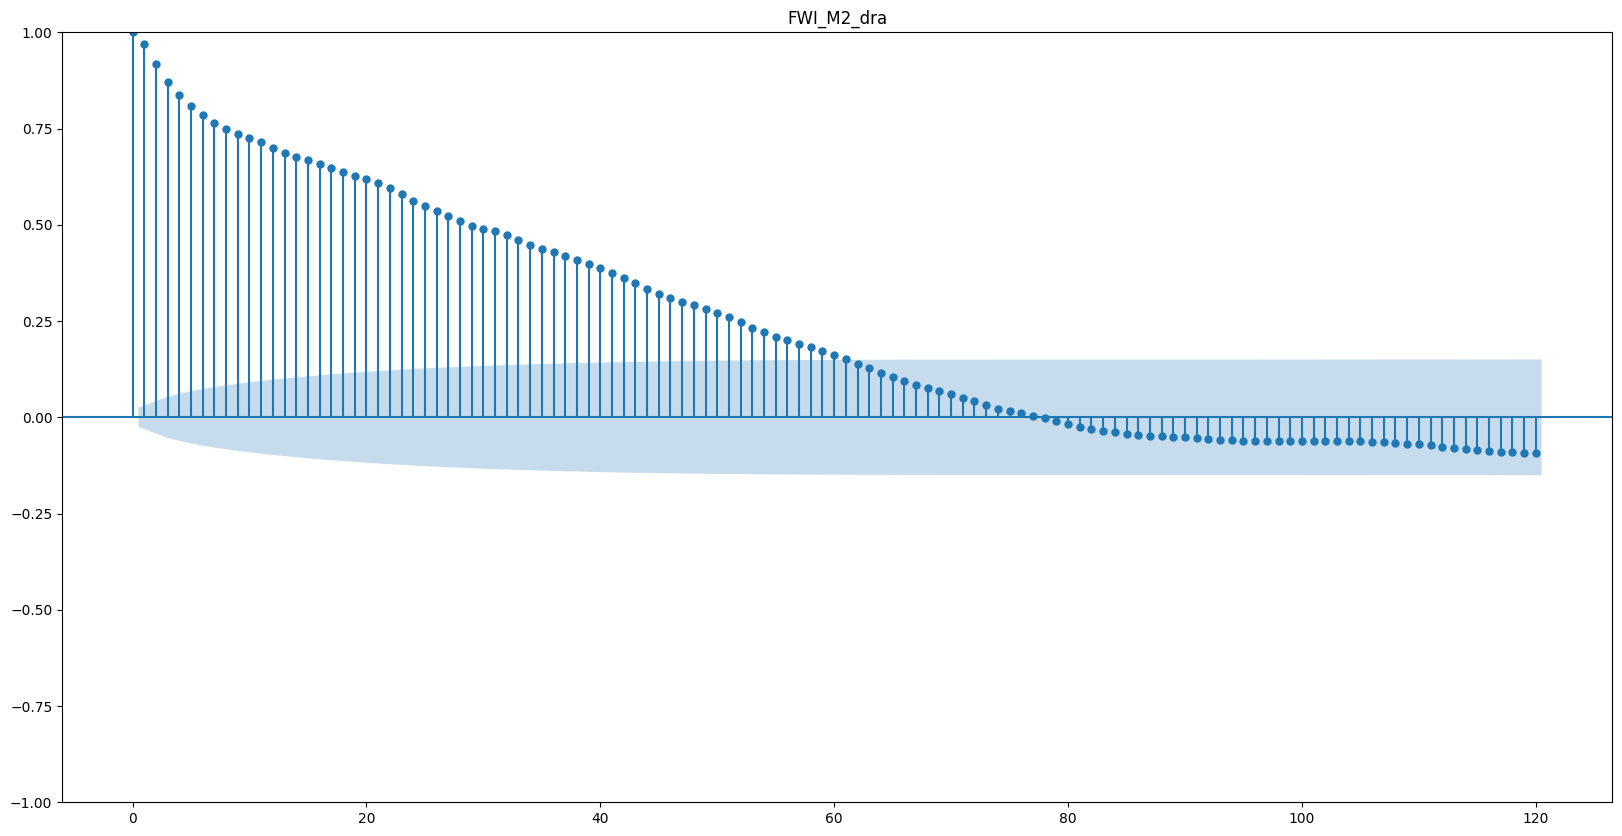

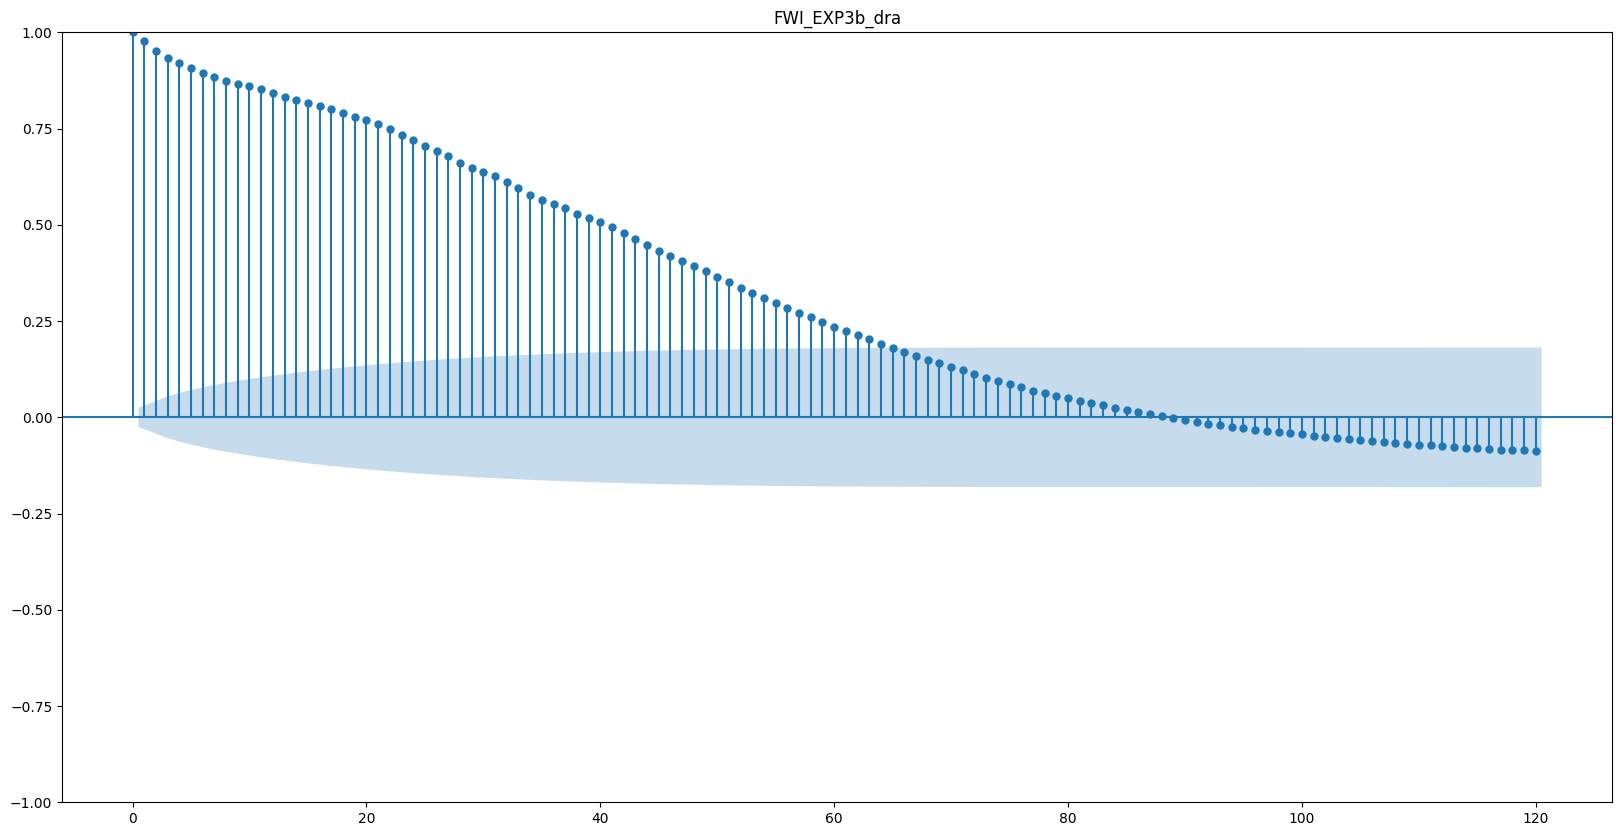

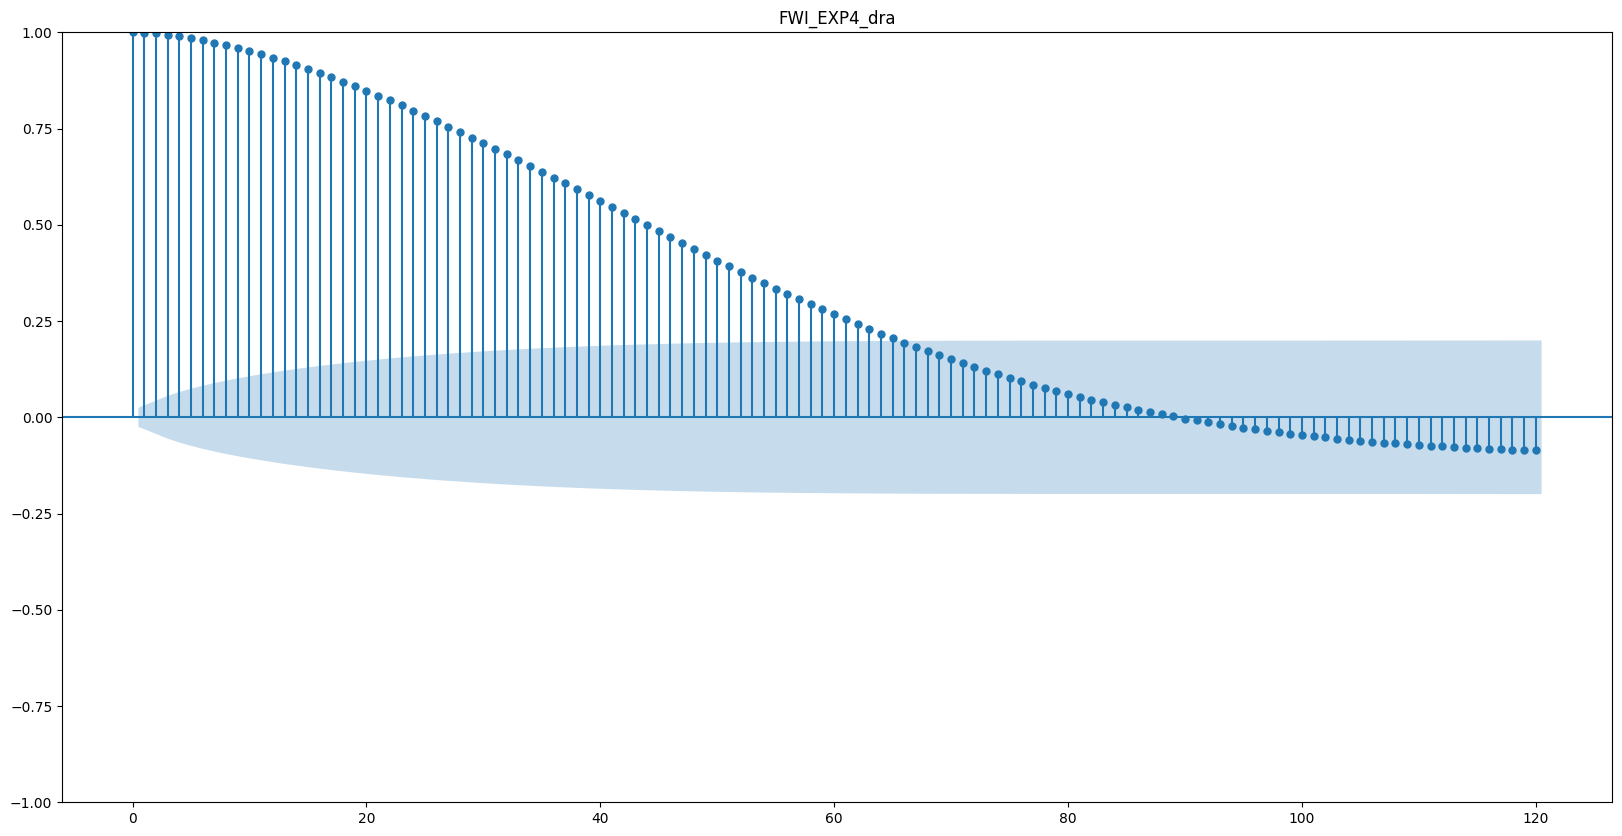

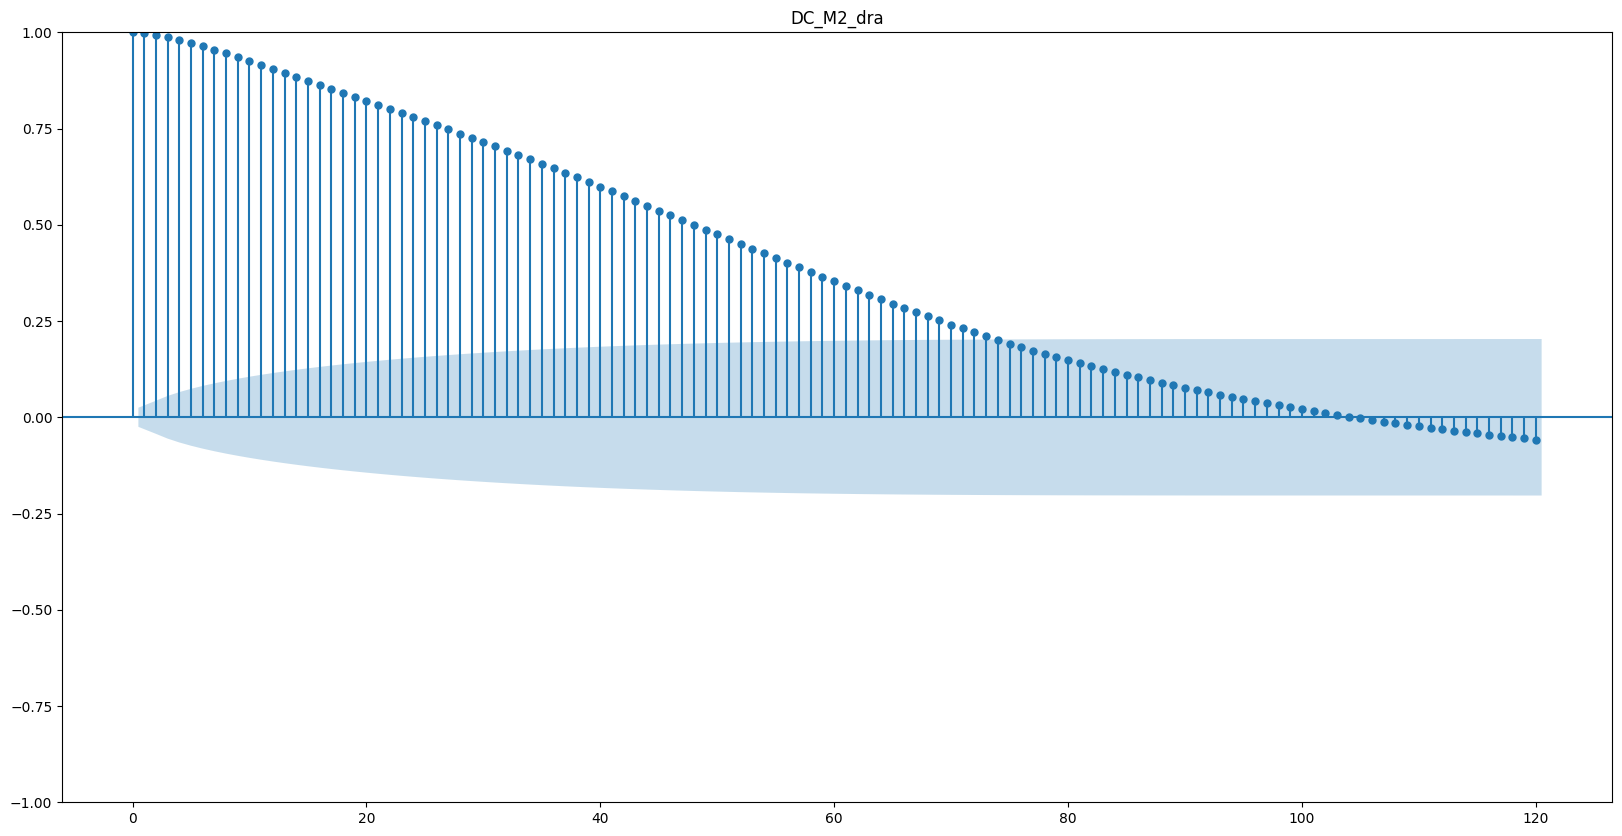

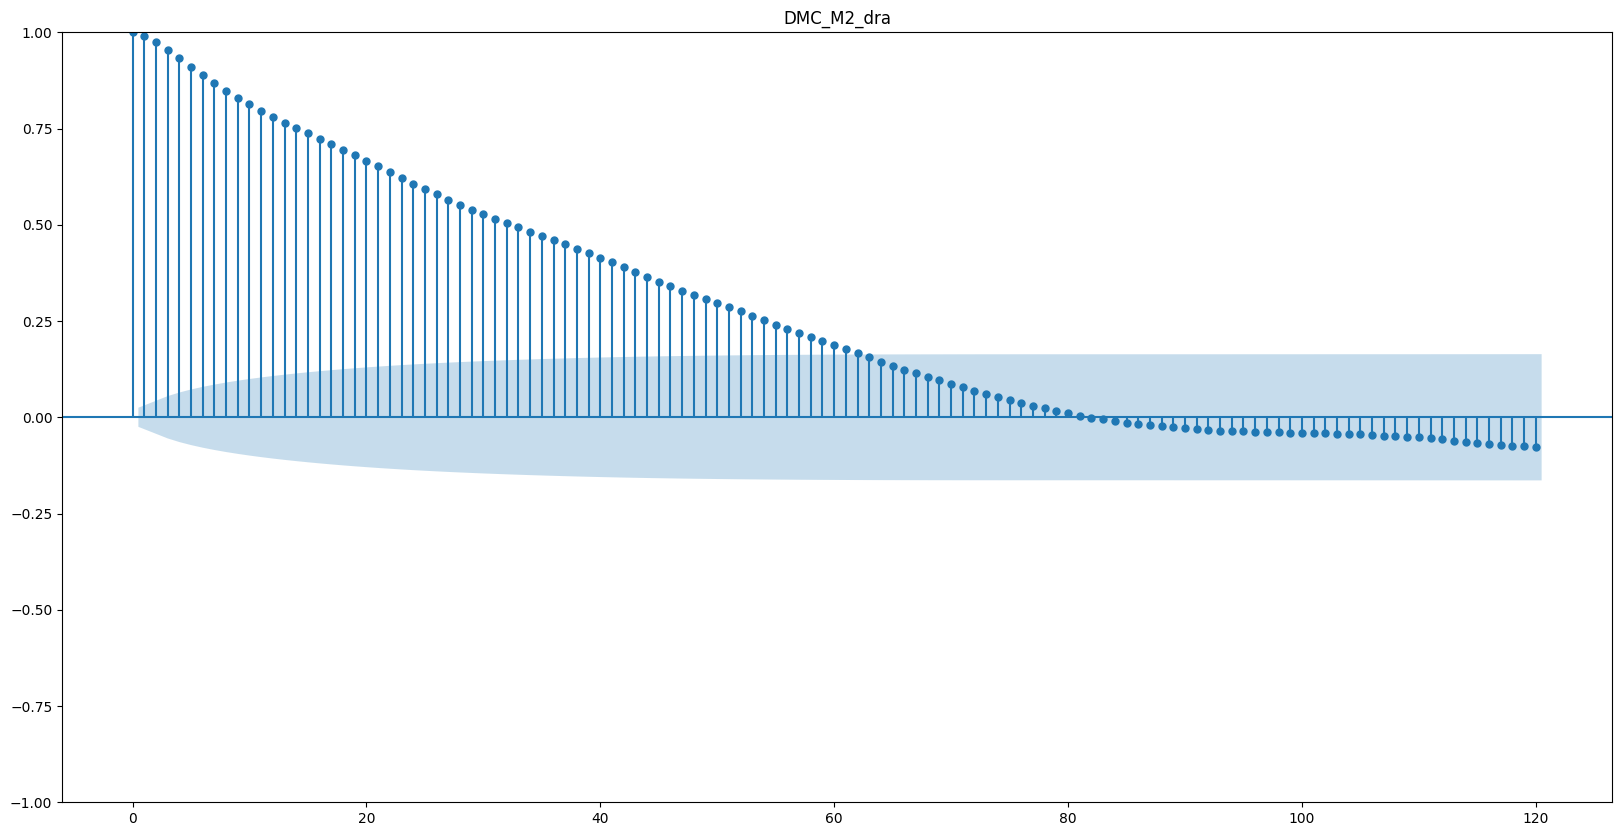

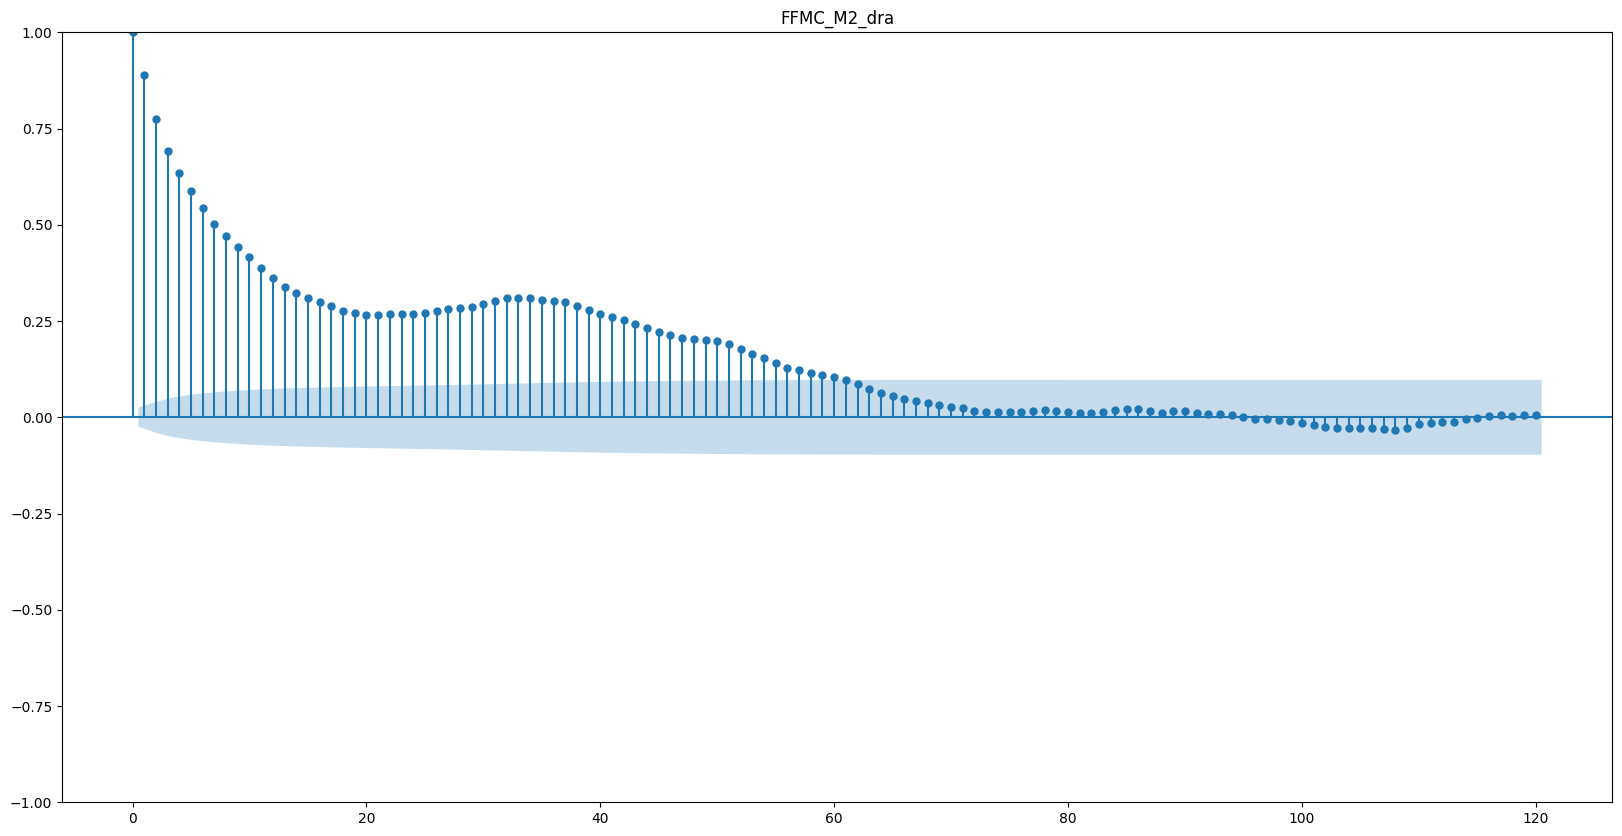

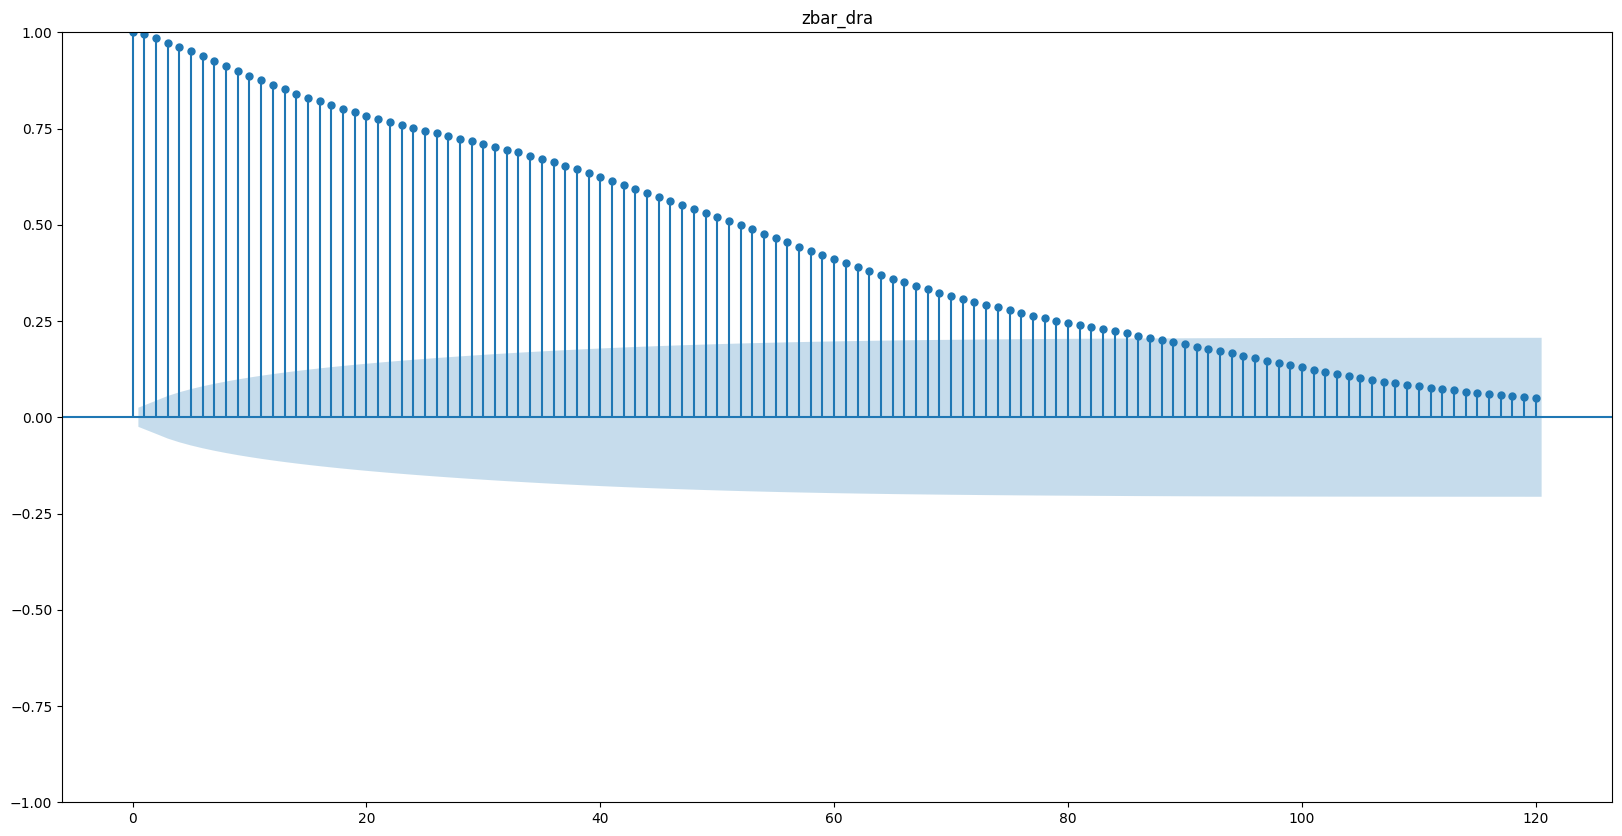

In [6]:
# The threshold should be 1/e
threshold = np.exp(-1)

# Group all datasets so you can just loop over them:
data = {
    'FWI_M2_nat': FWI_M2_nat[:],
    'FWI_EXP3b_nat': FWI_EXP3b_nat[:],
    'FWI_EXP4_nat': FWI_EXP4_nat[:],
    'DC_M2_nat': DC_M2_nat[:],
    'DMC_M2_nat': DMC_M2_nat[:],
    'FFMC_M2_nat': FFMC_M2_nat[:],
    'zbar_nat': zbar_nat[:],
    'FWI_M2_dra': FWI_M2_dra[:],
    'FWI_EXP3b_dra': FWI_EXP3b_dra[:],
    'FWI_EXP4_dra': FWI_EXP4_dra[:],
    'DC_M2_dra': DC_M2_dra[:],
    'DMC_M2_dra': DMC_M2_dra[:],
    'FFMC_M2_dra': FFMC_M2_dra[:],
    'zbar_dra': zbar_dra[:],
}

autocorrelations = {
    'FWI_M2_nat': [],
    'FWI_EXP3b_nat': [],
    'FWI_EXP4_nat': [],
    'DC_M2_nat': [],
    'DMC_M2_nat': [],
    'FFMC_M2_nat': [],
    'zbar_nat': [],
    'FWI_M2_dra': [],
    'FWI_EXP3b_dra': [],
    'FWI_EXP4_dra': [],
    'DC_M2_dra': [],
    'DMC_M2_dra': [],
    'FFMC_M2_dra': [],
    'zbar_dra': []
}

# Calculate the autocorrelation (acf) for each dataset and plot the acf:
for dataset in data:
    # Get the acf
    acf_values, _ = acf(np.nanmean(data[dataset], axis=(1,2)), alpha=0.05, nlags=1000, fft=True)

    # Get the autocorrelation length
    for lag, acf_val in enumerate(acf_values):
        if abs(acf_val) < threshold:
            break
    autocorrelations[dataset] = lag
    
    # Plot the figure:
    plt.rc("figure", figsize=(20,10))
    plot_acf(np.nanmean(data[dataset], axis=(1,2)), lags=120, title=dataset)

In [7]:
autocorrelations

{'FWI_M2_nat': 42,
 'FWI_EXP3b_nat': 54,
 'FWI_EXP4_nat': 53,
 'DC_M2_nat': 59,
 'DMC_M2_nat': 44,
 'FFMC_M2_nat': 13,
 'zbar_nat': 70,
 'FWI_M2_dra': 42,
 'FWI_EXP3b_dra': 50,
 'FWI_EXP4_dra': 53,
 'DC_M2_dra': 59,
 'DMC_M2_dra': 44,
 'FFMC_M2_dra': 12,
 'zbar_dra': 65}